# This notebook plots figures for the paper 

In [1]:
#%pip install matplotlib-label-lines

import CoolProp.CoolProp as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
import os
import seaborn
from labellines import labelLine, labelLines
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib

pf.__version__

'0.0.62'

In [2]:
import os
os.path.dirname(os.getcwd())

'p:\\WORK-GENERAL\\POSTDOC-UCB\\BERKELEY-VIBE\\Documents\\Projects\\Data\\Hawaii_FI'

In [3]:
# Setting plotting parameters
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["xtick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.minor.size"] = 3 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["pdf.fonttype"]=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["legend.fancybox"]=False

pd.set_option("display.max_colwidth", None)  # after this you can print any column length


def calculate_R2(x, y, xy=True, df=False, round=5,pval_format='decimal'):
    """ Calculates statistics
    if xy= False doesn't return y and x pred
    """
    masknan = (~np.isnan(x) & ~np.isnan(y))
    regx = x[masknan].values.reshape(-1, 1)
    regy = y[masknan].values.reshape(-1, 1)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(regx[:, 0], regy[:, 0])

    lr = LinearRegression()
    lr.fit(regx, regy)
    Y_pred = lr.predict(regx)
    Int = lr.intercept_[0]
    Grad = lr.coef_[0][0]

    R = r2_score(regy, Y_pred)
    RMSE = np.sqrt(np.mean((regy - Y_pred) ** 2))
    Median = np.nanmedian(regy - regx)
    Mean = np.nanmean(regy - regx)

    if pval_format=='decimal':
        p_value=format(p_value, '.'+str(round)+'f')
    
    Rp = np.round(R, round)
    RMSEp = np.round(RMSE, round)
    Medianp = np.round(Median, round)
    Meanp = np.round(Mean, round)
    Intp=np.round(Int,round)
    Gradp=np.round(Grad,round)

    output = {
        "R\u00B2": str(Rp),
        'RMSE': str(RMSEp),
        'P_val': str(p_value),
        'Int': str(Intp),
        'Grad': str(Gradp),
        'Median': str(Medianp),
        'Mean': str(Meanp)
    }
    
    if xy:
        output['x_pred'] = Y_pred.tolist()
        output['y_pred'] = regy.tolist()
    
    return output

In [4]:
# HI data folders
HawaiiFolder=r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI"

paper_folder=HawaiiFolder+'/'+"MIFI_paper"
helper_file_folder = paper_folder+'/'+"Helper_files" # Path to the helper files (images stored here)

figpath=paper_folder +'/'+'Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

compilation_folder_HI=HawaiiFolder +'\Data'+'\Compiled_data'
if not os.path.exists(compilation_folder_HI):
    os.mkdir(compilation_folder_HI)


#Fogo data folders
FogoFolder=r"P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Fogo_FI"

compilation_folder_FG=FogoFolder + '\Compiled_data'

# FIGURE 1 

## Import the Data

In [5]:
totaldf=pd.read_excel(compilation_folder_FG+'/'+'Fogo_Raman+microtherm.xlsx')
averaged_df=pd.read_excel(compilation_folder_FG+'/'+'Fogo_Raman+microtherm_averaged.xlsx')
std_df=pd.read_excel(compilation_folder_FG+'/'+'Fogo_Raman+microtherm_averaged_std.xlsx')
averaged_df['CO2_dens_gcm3_averaged_std']=std_df['CO2_dens_gcm3']
display(averaged_df.head())
display(std_df.head())

Unnamed: 0 Sample Xtal FI#     Xtal-FI  Corrected_Splitting  Corr_Split+1σ  \
0           0   FG04   A1   1   FG04-A1-1           104.131310     104.140473   
1           1   FG04   A1  10  FG04-A1-10           104.169500     104.184077   
2           2   FG04   A1  11  FG04-A1-11           104.258043     104.266767   
3           3   FG04   A1   2   FG04-A1-2           104.120403     104.130138   
4           4   FG04   A1   3   FG04-A1-3           104.130179     104.144180   

   Corr_Split-1σ  Corr_Split_1σ_val   Splitting  ...  \
0     104.122147           0.009163  104.377050  ...   
1     104.154923           0.014577  104.421575  ...   
2     104.249319           0.008724  104.513244  ...   
3     104.110669           0.009734  104.367924  ...   
4     104.116177           0.014002  104.382522  ...   

                   Filename     model  crust_dens_kgm3   EOS   Tag  Side  \
0   FG04-A1-1-3_CRR_DiadFit  two-step              NaN  SW96  A101    ts   
1  FG04-A1-10-3_CRR_DiadFit  two-step              NaN  SW96  A110    ts   
2  FG04-A1-11-3_CRR_DiadFit  two-step              NaN  SW96  A111    ts   
3               FG04-A1-2-3  two-step              NaN  SW96  A102    ts   
4         16 FG04-A1-reg1-3  two-step              NaN  SW96  A103    ts   

   distance from top  comment  rho_err_averaged_std  \
0               21.0      NaN              0.000492   
1               29.0      NaN              0.001138   
2               27.0      NaN              0.001875   
3               25.0      NaN              0.000508   
4               26.0      NaN                   NaN   

   CO2_dens_gcm3_averaged_std  
0                    0.018125  
1                    0.017700  
2                    0.021784  
3                    0.016461  
4                         NaN  

[5 rows x 106 columns]

Unnamed: 0 Sample Xtal FI#     Xtal-FI  Corrected_Splitting  Corr_Split+1σ  \
0           0   FG04   A1   1   FG04-A1-1             0.037237       0.036420   
1           1   FG04   A1  10  FG04-A1-10             0.036213       0.037784   
2           2   FG04   A1  11  FG04-A1-11             0.043754       0.041994   
3           3   FG04   A1   2   FG04-A1-2             0.034062       0.033905   
4           4   FG04   A1   3   FG04-A1-3                  NaN            NaN   

   Corr_Split-1σ  Corr_Split_1σ_val  Splitting  ...  \
0       0.038067           0.001069   0.040446  ...   
1       0.034718           0.002253   0.034322  ...   
2       0.045760           0.003786   0.046096  ...   
3       0.034251           0.001058   0.033968  ...   
4            NaN                NaN        NaN  ...   

                    filename        Model_name                  Filename  \
0                        NaN               NaN   FG04-A1-1-3_CRR_DiadFit   
1                        NaN               NaN  FG04-A1-10-3_CRR_DiadFit   
2  50 FG04-A1-reg1-11-p6.txt  PseudoVoigtModel  FG04-A1-11-3_CRR_DiadFit   
3                        NaN               NaN               FG04-A1-2-3   
4      16 FG04-A1-reg1-3.txt  PseudoVoigtModel         16 FG04-A1-reg1-3   

      model  crust_dens_kgm3   EOS   Tag  Side  distance from top  comment  
0  two-step              NaN  SW96  A101    ts               21.0      NaN  
1  two-step              NaN  SW96  A110    ts               29.0      NaN  
2  two-step              NaN  SW96  A111    ts               27.0      NaN  
3  two-step              NaN  SW96  A102    ts               25.0      NaN  
4  two-step              NaN  SW96  A103    ts               26.0      NaN  

[5 rows x 104 columns]

## Plot Fig1 (4 main paper)

c:\Users\charl\anaconda3\envs\DiadFit_env\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_nolegend_), but could not find a label for it.
  warnings.warn(
C:\Users\charl\AppData\Local\Temp\ipykernel_2636\2664488471.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


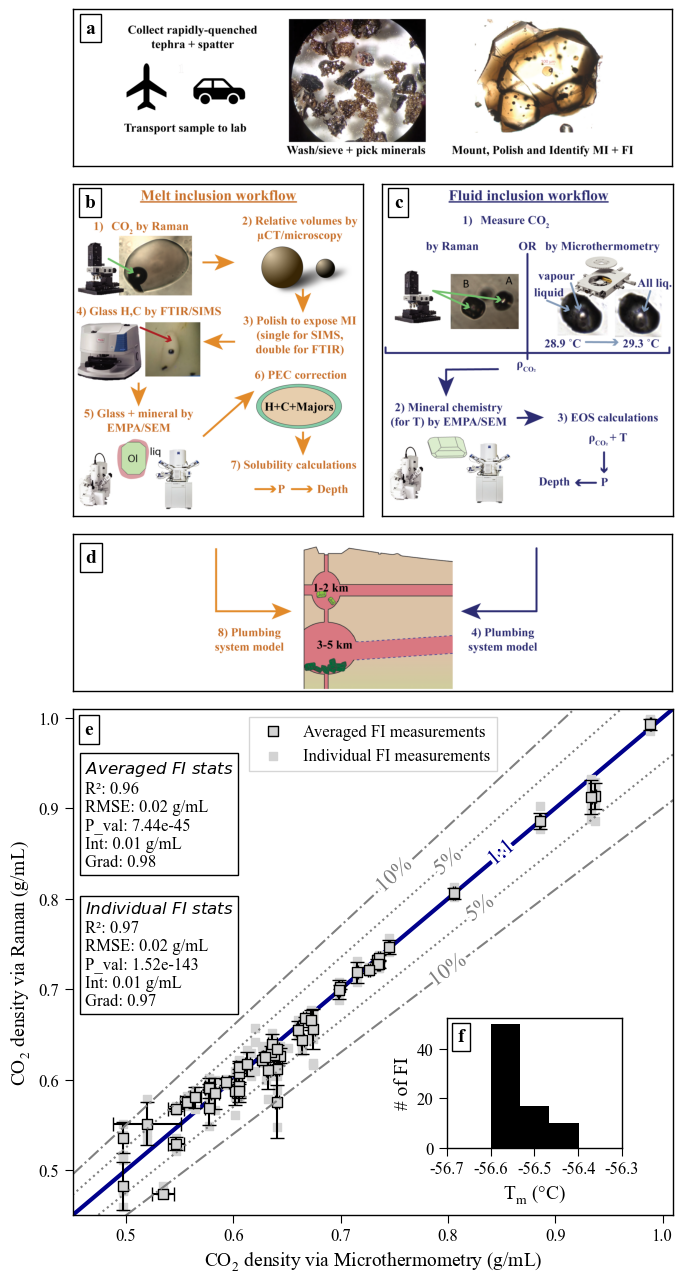

In [6]:
figure_mosaic="""
AA
BC
BC
DD
EE
EE
EE

"""
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(7, 13))
# xlim=[0,1.5]

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')


## Comparison
# Panel 'd'

df_4plot=averaged_df.copy()
splitnames = df_4plot['filename_stripped'].str.split('-')

xtal=pd.Series(index=splitnames.index,dtype='float64')

for row in splitnames.index:
    for spot in splitnames[row]:
        if 'E' in spot:
            xtal[row]=spot

df_4plot['xtal'] = xtal

y = 'CO2_dens_gcm3'#'Diad1_Combofit_Height'#'Splitting'#'Raman-microT'#'CO2_dens_gcm3_input'
x = 'Mean_Bulk_gcm3'#'Mean_Bulk_gcm3'

xerr='Std_Bulk_gcm3'
yerr='CO2_dens_gcm3_averaged_std'#'rho_err'
color_column = 'Diad1_Combofit_Height'#yerr#'Split_err_quadrature'

#df = averaged_df.dropna(subset=[x, y, color_column])
df=df_4plot.dropna(subset=[x,y,yerr])

grouped = df.groupby('Xtal')
symbols = ['s']

for i, (name, group) in enumerate(grouped):
    symbol = symbols[i % len(symbols)]
    if type(yerr) == str:
        yerr_in = group[yerr]
    else:
        yerr_in = 0
    if type(xerr) == str:
        xerr_in = group[xerr]
    else:
        xerr_in = 0
    label = f"Xtal {name}"  # Add a label for each group
    color='lightgrey'#group[color_column][filter]

    if name == "A1":
        axes['E'].errorbar(x=group[x], y=group[y],xerr=xerr_in, yerr=yerr_in, marker='', linestyle='', zorder=-1,ecolor='k',barsabove=False,capsize=5)
        sc = axes['E'].scatter(group[x], group[y], label="Averaged FI measurements", marker=symbol,s=60, c=color, edgecolor='k',cmap=None,zorder=0,alpha=1)
    else:
        axes['E'].errorbar(x=group[x], y=group[y],xerr=xerr_in, yerr=yerr_in, marker='', linestyle='', zorder=-1,ecolor='k',barsabove=False,capsize=5)
        sc = axes['E'].scatter(group[x], group[y], marker=symbol,s=60, c=color, edgecolor='k',cmap=None,zorder=0,alpha=1)


axes['E'].scatter(x=totaldf[x], y=totaldf[y],marker='s', zorder=-2,color='lightgrey',label='Individual FI measurements')

xlim=(0.45,1.01)

axes['E'].text(0.02, 0.95, 'e', transform=axes['E'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)
axes['E'].legend(loc='upper center')

axes['E'].set_xlabel('$CO _{2}$ density via Microthermometry (g/mL)')
axes['E'].set_ylabel('$CO _{2}$ density via Raman (g/mL)')
axes['E'].set_xlim([xlim[0],xlim[1]])
axes['E'].set_ylim(xlim[0],xlim[1])

axes['E'].plot([xlim[0], xlim[1]], [xlim[0], xlim[1]],'darkblue',zorder=-3,linewidth=3,label="1:1")
axes['E'].plot([xlim[0],xlim[1]],[xlim[0]+0.1*xlim[0],xlim[1]+0.1*xlim[1]],'grey',linestyle='-.',label="10%")
axes['E'].plot([xlim[0],xlim[1]],[xlim[0]-0.1*xlim[0],xlim[1]-0.1*xlim[1]],'grey',linestyle='-.',label="10%")
axes['E'].plot([xlim[0],xlim[1]],[xlim[0]+0.05*xlim[0],xlim[1]+0.05*xlim[1]],'grey',linestyle=':',label="5%")
axes['E'].plot([xlim[0],xlim[1]],[xlim[0]-0.05*xlim[0],xlim[1]-0.05*xlim[1]],'grey',linestyle=':',label="5%")
labelLines(axes['E'].get_lines(), zorder=2.5,xvals=[0.85,0.75,0.8,0.8,0.83],fontsize=16)

## Create inset subplot
inset_width = 0.25
inset_height = 0.1
inset_left = 0.65
inset_bottom = 0.11

inset_ax = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])

inset_ax.hist(averaged_df['Tmelt_corr'], bins=3, color='black')
inset_ax.set_xlabel('$T_{m}$ (°C)')
inset_ax.set_ylabel('# of FI')
inset_ax.set_xticks([x / 10 for x in range(-567, -562)])
inset_ax.set_xticklabels([f'{x / 10:.1f}' for x in range(-567, -562)])
inset_ax.text(0.06, 0.82, 'f', transform=inset_ax.transAxes, fontsize=14, fontweight='bold',bbox=bbox)


### Averaged FI regression
pval_format=None
round_num=2

linereg_averagedFI = calculate_R2(averaged_df[x], averaged_df[y],xy=False,round=round_num, pval_format=pval_format)

keys_to_extract = ['R²', 'RMSE', 'P_val', 'Int', 'Grad']
linereg_averagedFI = {key: linereg_averagedFI[key] for key in keys_to_extract}
if pval_format != 'decimal':
    linereg_averagedFI['P_val'] = '{:.{}e}'.format(float(linereg_averagedFI['P_val']), round_num)

linereg_info_averagedFI = "\n".join(
    f"{key}: {value}" + (" g/mL" if key in {'RMSE', 'MAE', 'Median', 'Mean', 'Int'} else "")
    for key, value in list(linereg_averagedFI.items())
)

### Individual FI regression

linereg_indFI = calculate_R2(totaldf[x], totaldf[y],xy=False,round=round_num, pval_format=pval_format)
linereg_indFI = {key: linereg_indFI[key] for key in keys_to_extract}

if pval_format != 'decimal':
    linereg_indFI['P_val'] = '{:.{}e}'.format(float(linereg_indFI['P_val']), round_num)

linereg_info_indFI = "\n".join(
    f"{key}: {value}" + (" g/mL" if key in {'RMSE', 'MAE', 'Median', 'Mean', 'Int'} else "")
    for key, value in list(linereg_indFI.items())
    )

# This adds text boxes with the regression information
averagedFI_text = r'$\mathit{Averaged\ FI\ stats}$' + '\n' + linereg_info_averagedFI
indFI_text = r'$\mathit{Individual\ FI\ stats}$' + '\n' + linereg_info_indFI

linereg_box_averagedFI = axes['E'].text(0.02, 0.90, averagedFI_text, transform=axes['E'].transAxes,
                                        fontsize=12, bbox=bbox, verticalalignment='top')

linereg_box_indFI = axes['E'].text(0.02, 0.62, indFI_text, transform=axes['E'].transAxes,
                             fontsize=12, bbox=bbox, verticalalignment='top')


## Load the images for axes a-d
extension=".tif"
image1 = plt.imread(helper_file_folder+'/'+"FI-MI_Workflow-01"+extension)
image2 = plt.imread(helper_file_folder+'/'+"FI-MI_Workflow-02"+extension)
image3 = plt.imread(helper_file_folder+'/'+"FI-MI_Workflow-03"+extension)
image4 = plt.imread(helper_file_folder+'/'+"FI-MI_Workflow-04"+extension)

axes['A'].imshow(image1)
axes['B'].imshow(image2)
axes['C'].imshow(image3)
axes['D'].imshow(image4)

axes['A'].text(0.02, 0.85, 'a', transform=axes['A'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)
axes['B'].text(0.04, 0.93, 'b', transform=axes['B'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)
axes['C'].text(0.04, 0.93, 'c', transform=axes['C'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)
axes['D'].text(0.02, 0.82, 'd', transform=axes['D'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)

axes['A'].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labeltop=False, labelleft=False, labelright=False)
axes['B'].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labeltop=False, labelleft=False, labelright=False)
axes['C'].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labeltop=False, labelleft=False, labelright=False)
axes['D'].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labeltop=False, labelleft=False, labelright=False)

## Saves figure
fig.tight_layout()

fig.savefig(figpath+'/'+'Fig1_microthermvsRaman.pdf')
fig.savefig(figpath+'/'+'Fig1_microthermvsRaman.png')

### FigS1 - For supplement

c:\Users\charl\anaconda3\envs\DiadFit_env\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_nolegend_), but could not find a label for it.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


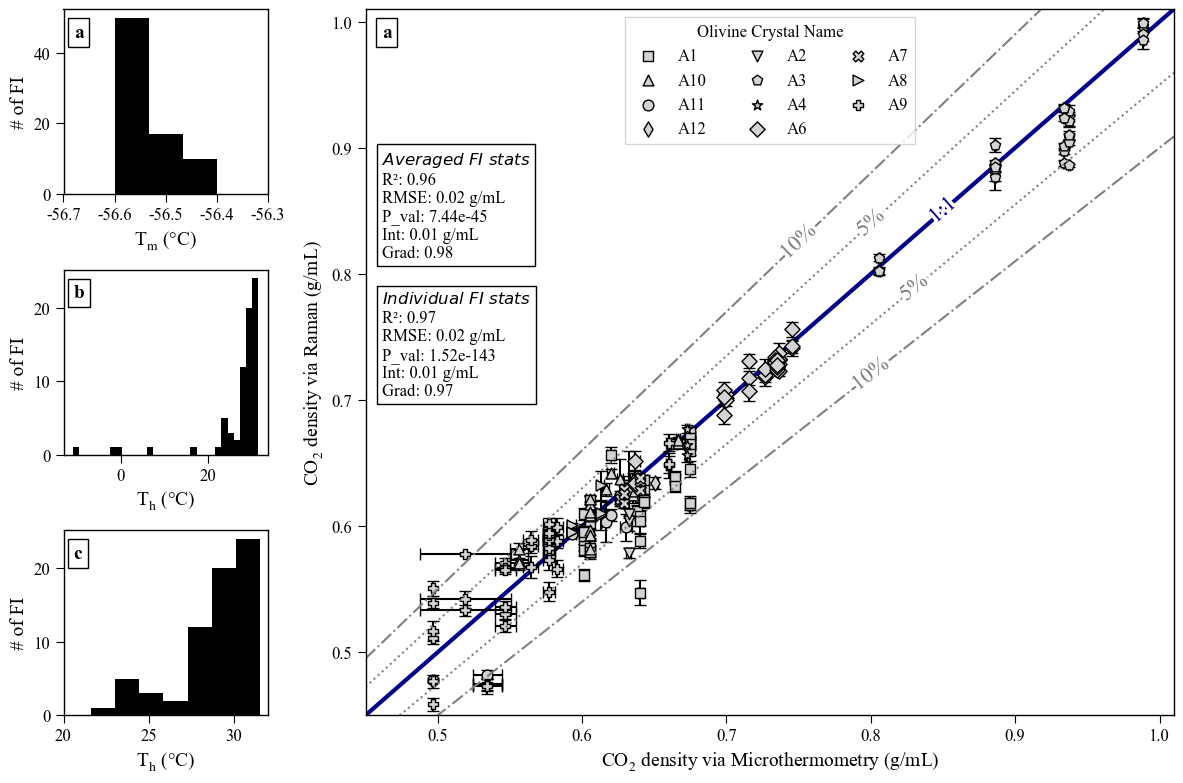

In [7]:
figure_mosaic="""
ADDD
BDDD
CDDD
"""
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 8))
# xlim=[0,1.5]

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

axes['A'].axes.get_xaxis().set_visible(True)
axes['B'].axes.get_xaxis().set_visible(True)
axes['C'].axes.get_xaxis().set_visible(True)
axes['D'].axes.get_xaxis().set_visible(True)


## Microtherm ##
# Panel 'a'
axes['A'].hist(averaged_df['Tmelt_corr'], bins=3, color='black')
axes['A'].set_xticks([x / 10 for x in range(-567, -562)])
axes['A'].set_xticklabels([f'{x / 10:.1f}' for x in range(-567, -562)])
axes['A'].set_xlabel('$T_{m}$ (°C)')
axes['A'].set_ylabel('# of FI')
axes['A'].text(0.05, 0.85, 'a', transform=axes['A'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)


# Panel 'b'
axes['B'].hist(averaged_df[['Thomog_high', 'Thomog_low']].mean(axis=1), bins=30, color='black')
axes['B'].set_xlabel('$T_{h}$ (°C)')
axes['B'].set_ylabel('# of FI')
axes['B'].text(0.05, 0.85, 'b', transform=axes['B'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)


# Panel 'c'
axes['C'].hist(averaged_df[['Thomog_high', 'Thomog_low']].mean(axis=1), bins=30, color='black')
axes['C'].set_xlabel('$T_{h}$ (°C)')
axes['C'].set_ylabel('# of FI')
axes['C'].text(0.05, 0.85, 'c', transform=axes['C'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)
axes['C'].set_xlim([20,32])

# # Panel 'c' as density
# axes['C'].hist(averaged_df['Mean_Bulk_gcm3'], bins=15, color='black')
# axes['C'].set_xlabel('$CO _{2}$ density (g/mL)')
# axes['C'].set_ylabel('# of FI')
# axes['C'].text(0.05, 0.85, 'c', transform=axes['C'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)

## Comparison
# Panel 'd'

df_4plot=totaldf.copy()
splitnames = df_4plot['filename_stripped'].str.split('-')

xtal=pd.Series(index=splitnames.index,dtype='float64')

for row in splitnames.index:
    for spot in splitnames[row]:
        if 'A' in spot:
            xtal[row]=spot

df_4plot['xtal'] = xtal

y = 'CO2_dens_gcm3'#'Diad1_Combofit_Height'#'Splitting'#'Raman-microT'#'CO2_dens_gcm3_input'
x = 'Mean_Bulk_gcm3'#'Mean_Bulk_gcm3'

xerr='Std_Bulk_gcm3'
yerr='rho_err'#'CO2_dens_gcm3_averaged_std'#
color_column = 'Diad1_Combofit_Height'#yerr#'Split_err_quadrature'

#df = averaged_df.dropna(subset=[x, y, color_column])
df=df_4plot.dropna(subset=[x,y,yerr])

grouped = df.groupby('Xtal')
symbols = ['s', '^', 'o', 'd', 'v', 'p', '*', 'D', 'X', '>', 'P','<']

for i, (name, group) in enumerate(grouped):
    symbol = symbols[i % len(symbols)]
    if type(yerr) == str:
        yerr_in = group[yerr]
    else:
        yerr_in = 0
    if type(xerr) == str:
        xerr_in = group[xerr]
    else:
        xerr_in = 0
    label = f"Xtal {name}"  # Add a label for each group
    color='lightgrey'#group[color_column][filter]

    if name == "A1":
        axes['D'].errorbar(x=group[x], y=group[y],xerr=xerr_in, yerr=yerr_in, marker='', linestyle='', zorder=-1,ecolor='k',barsabove=False,capsize=4)
        sc = axes['D'].scatter(group[x], group[y], label=name, marker=symbol,s=60, c=color, edgecolor='k',cmap=None,zorder=0,alpha=1)
    else:
        axes['D'].errorbar(x=group[x], y=group[y],xerr=xerr_in, yerr=yerr_in, marker='', linestyle='', zorder=-1,ecolor='k',barsabove=False,capsize=4)
        sc = axes['D'].scatter(group[x], group[y], marker=symbol,s=60, c=color, label=name,edgecolor='k',cmap=None,zorder=0,alpha=1)


# axes['D'].errorbar(x=averaged_df[x], y=averaged_df[y],xerr=averaged_df[xerr],yerr=averaged_df['rho_err'],marker='s', linestyle='',capsize=4,zorder=-2,color='grey',label='Individual FI measurements')

xlim=(0.45,1.01)

axes['D'].text(0.02, 0.96, 'a', transform=axes['D'].transAxes, fontsize=14, fontweight='bold',bbox=bbox)
axes['D'].legend(loc='upper center',ncols=3,title='Olivine Crystal Name')

axes['D'].set_xlabel('$CO _{2}$ density via Microthermometry (g/mL)')
axes['D'].set_ylabel('$CO _{2}$ density via Raman (g/mL)')
axes['D'].set_xlim([xlim[0],xlim[1]])
axes['D'].set_ylim(xlim[0],xlim[1])

axes['D'].plot([xlim[0], xlim[1]], [xlim[0], xlim[1]],'darkblue',zorder=-3,linewidth=3,label="1:1")
axes['D'].plot([xlim[0],xlim[1]],[xlim[0]+0.1*xlim[0],xlim[1]+0.1*xlim[1]],'grey',linestyle='-.',label="10%")
axes['D'].plot([xlim[0],xlim[1]],[xlim[0]-0.1*xlim[0],xlim[1]-0.1*xlim[1]],'grey',linestyle='-.',label="10%")
axes['D'].plot([xlim[0],xlim[1]],[xlim[0]+0.05*xlim[0],xlim[1]+0.05*xlim[1]],'grey',linestyle=':',label="5%")
axes['D'].plot([xlim[0],xlim[1]],[xlim[0]-0.05*xlim[0],xlim[1]-0.05*xlim[1]],'grey',linestyle=':',label="5%")
labelLines(axes['D'].get_lines(), zorder=2.5,xvals=[0.85,0.75,0.8,0.8,0.83],fontsize=16)

### Averaged FI regression
pval_format=None
round_num=2

linereg_averagedFI = calculate_R2(averaged_df[x], averaged_df[y],xy=False,round=round_num, pval_format=pval_format)

keys_to_extract = ['R²', 'RMSE', 'P_val', 'Int', 'Grad']
linereg_averagedFI = {key: linereg_averagedFI[key] for key in keys_to_extract}
if pval_format != 'decimal':
    linereg_averagedFI['P_val'] = '{:.{}e}'.format(float(linereg_averagedFI['P_val']), round_num)

linereg_info_averagedFI = "\n".join(
    f"{key}: {value}" + (" g/mL" if key in {'RMSE', 'MAE', 'Median', 'Mean', 'Int'} else "")
    for key, value in list(linereg_averagedFI.items())
)

### Individual FI regression

linereg_indFI = calculate_R2(totaldf[x], totaldf[y],xy=False,round=round_num, pval_format=pval_format)
linereg_indFI = {key: linereg_indFI[key] for key in keys_to_extract}

if pval_format != 'decimal':
    linereg_indFI['P_val'] = '{:.{}e}'.format(float(linereg_indFI['P_val']), round_num)

linereg_info_indFI = "\n".join(
    f"{key}: {value}" + (" g/mL" if key in {'RMSE', 'MAE', 'Median', 'Mean', 'Int'} else "")
    for key, value in list(linereg_indFI.items())
    )

# This adds text boxes with the regression information
averagedFI_text = r'$\mathit{Averaged\ FI\ stats}$' + '\n' + linereg_info_averagedFI
indFI_text = r'$\mathit{Individual\ FI\ stats}$' + '\n' + linereg_info_indFI

linereg_box_averagedFI = axes['D'].text(0.02, 0.8, averagedFI_text, transform=axes['D'].transAxes,
                                        fontsize=12, bbox=bbox, verticalalignment='top')

linereg_box_indFI = axes['D'].text(0.02, 0.6, indFI_text, transform=axes['D'].transAxes,
                             fontsize=12, bbox=bbox, verticalalignment='top')
## Save figure
fig.tight_layout()
fig.savefig(figpath+'/'+'FigS1_microthermvsRaman.pdf')
fig.savefig(figpath+'/'+'FigS1_microthermvsRaman.png')

## FIGURE 2 

### Import the data

In [8]:
## Get the FI data
lei_df=pd.read_excel(compilation_folder_HI+'/'+'Leilani_fullymerged_averaged+textures.xlsx') ## This one was filtered for fluid>80% and bad spec out

lei_std_df=pd.read_excel(compilation_folder_HI+'/'+'Leilani_fullymerged_averaged_stdeviations.xlsx') ## this contains standard deviations when available for averaged ones

lei_df['Sample_ID'] = lei_df['filename_4match'].apply(lambda x: next((s for s in ['LL8', 'LL7', 'LL4'] if s in x), None))
lei_df['CO2_dens_gcm3_std']=lei_std_df['CO2_dens_gcm3']

## Get the melt inclusion data
mipath=helper_file_folder+'/'+"Supplement_Wieser_et_al_G3.xlsx"
mis=pd.read_excel(mipath, 'Melt_Inclusions')

mis.insert(0,'Sample_ID', np.nan)
mis['Sample_ID'] = mis['Sample Name'].apply(lambda x: next((s for s in ['LL8', 'LL7', 'LL4'] if s in x), None))

# mifi_xtal_names=pd.read_excel(compilation_folder_HI+'/'+"MIFI_Xtal_names.xlsx")
# display(mifi_xtal_names.head())
display(lei_df.head())
display(mis.head())

Unnamed: 0   FI_name_reps  Fo content (molar)      Xtal Sample_ID_y  \
0           0  LL4-14dp-FI#1           86.489906  LL4-14dp         LL4   
1           1  LL4-14dp-FI#2           86.408810  LL4-14dp         LL4   
2           2  LL4-14dp-MI#1           86.562293  LL4-14dp         LL4   
3           3      LL4-21-#2           83.886871    LL4-21         LL4   
4           7    LL4-21-MI#5           86.554679    LL4-21         LL4   

   Corrected_Splitting  Corr_Split+1σ  Corr_Split-1σ  Corr_Split_1σ_val  \
0           103.186144     103.192605     103.179683           0.006461   
1           103.195894     103.203031     103.188757           0.007137   
2           103.196578     103.206982     103.186174           0.010404   
3           103.122405     103.124171     103.120640           0.001766   
4           102.953345     102.960776     102.945914           0.007431   

    Splitting  ...  Texturally Related/Unrelated                Comment  \
0  103.186144  ...                           NaN  has tiny bit of melt    
1  103.195894  ...                           NaN                no melt   
2  103.196578  ...                           NaN              some melt   
3  103.122405  ...                           NaN                    NaN   
4  102.953345  ...                           NaN               has melt   

   percent_error_rho  percent_error_correctedsplit  percent_error_diad1  \
0           1.485494                      0.006261             0.000411   
1           1.606864                      0.006916             0.000461   
2           2.339129                      0.010082             0.000693   
3           0.474502                      0.001712             0.000116   
4           3.659088                      0.007218             0.000480   

   percent_error_diad2  diad1_yuan_maya_criterion  diad2_yuan_maya_criterion  \
0             0.000263                1738.625839                4007.591860   
1             0.000283                1018.195757                2270.613474   
2             0.000372                 352.235297                 808.953512   
3             0.000060                1308.442181                2668.256881   
4             0.000294                 197.643544                 369.112486   

   Sample_ID  CO2_dens_gcm3_std  
0        LL4           0.001311  
1        LL4                NaN  
2        LL4           0.004020  
3        LL4           0.001697  
4        LL4                NaN  

[5 rows x 278 columns]

Sample_ID  Description Sample Name  \
0       LL8            1    LL8_613b   
1       LL8            2     LL8_615   
2       LL8            3   LL8_617_a   
3       LL8            4   LL8_623_b   
4       LL8            5     LL8_626   

  Specific ID (LL8 - lab code for F8 Mid July, LL7- lab code for Aug 1st, LL4- lab code for May 30th)  \
0                                                                                Fissure 8 (Mid July)   
1                                                                                Fissure 8 (Mid July)   
2                                                                                Fissure 8 (Mid July)   
3                                                                                Fissure 8 (Mid July)   
4                                                                                Fissure 8 (Mid July)   

   Classification (1=bubble with fermi diad, 2=No bubble, 3=bubble but no fermi diad)  \
0                                                                                   1   
1                                                                                   1   
2                                                                                   1   
3                                                                                   1   
4                                                                                   1   

  Cracked (for ones without diads)  Na2O (wt%, measured)  \
0                              NaN                2.8528   
1                              NaN                2.8114   
2                              NaN                2.7212   
3                              NaN                2.6459   
4                              NaN                2.7685   

   Al2O3 (wt%, measured)  P2O5 (wt%, measured)  CaO (wt%, measured)  ...  \
0                14.9080                0.2649              12.2542  ...   
1                14.4189                0.3026              12.2457  ...   
2                14.7306                0.3789              12.4949  ...   
3                14.9646                0.3763              12.4287  ...   
4                14.7415                0.2647              12.2405  ...   

   Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)  \
0                                                                                                  440   
1                                                                                                  610   
2                                                                                                  600   
3                                                                                                 1550   
4                                                                                                 1080   

   Magmasat Saturation Pressure Min CO2  (glass+bubble, PEC corr,-1 sigma splitting -1 sigma bubble vol))  \
0                                                                                                     200   
1                                                                                                     190   
2                                                                                                     270   
3                                                                                                     450   
4                                                                                                     260   

   Magmasat Saturation Pressure (Glass only, PEC corrected)   \
0                                                         70   
1                                                         70   
2                                                         80   
3                                                         70   
4                                                         50   

   Magmasat Saturation Pressure (mean bubble CO2 from EOS+Glass CO2; PEC corrected)  \
0            

In [9]:
## Create a sub frame with pairs of melt-no melt 
melt_nomelt_pairs=lei_df[(lei_df['Melt-Nomelt pair']=='Yes')].copy()#&(lei_df['Diad1_Combofit_Height']>50)]&~(lei_df['1σ']>0.03)
melt_nomelt_pairs['CO2_err(stdev or 1sig)']=melt_nomelt_pairs['CO2_dens_gcm3_std'].fillna(melt_nomelt_pairs['1σ'])


# this filters out bad ones, based on Yuan Mayanovic criteria and the microtherm/raman comparison RMSE rounded up. Also based on intensity of the spectra 
melt_nomelt_pairs = melt_nomelt_pairs[
    ~(
        ((melt_nomelt_pairs['Diad1_Combofit_Height'] / melt_nomelt_pairs['Diad1_fwhm']) < 200) &
        (melt_nomelt_pairs['1σ'] > 0.03)
    ) &
    ~(
        (melt_nomelt_pairs['Diad1_Combofit_Height'] < 50) &
        (melt_nomelt_pairs['1σ'] > 0.03)
    )
]

## Fig S2 CO2 density vs uncertainty

## Figure 2 - Images with MI-FI comparisons for good and bad ones (textural stuff)

In [10]:
MI_P_var = 'Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'
MI_P_err_var = 'Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)'

mifi_only = lei_df[~lei_df[MI_P_var].isna()].copy()
mifi_only['CO2_err(stdev or 1sig)']=mifi_only['CO2_dens_gcm3_std'].fillna(mifi_only['1σ'])
mifi_only.loc[:, 'Sat_P_MI_kbar'] = mifi_only[MI_P_var] / 1000
mifi_only.loc[:, 'Sat_P_MI_kbar_err'] = (mifi_only[MI_P_err_var] / 1000) - mifi_only[MI_P_var] / 1000

mifi_only.head()


Unnamed: 0 FI_name_reps  Fo content (molar)    Xtal Sample_ID_y  \
42          57  LL4_12-FI#1           88.702677  LL4_12         LL4   
43          58  LL4_12-FI#2           88.702677  LL4_12         LL4   
44          59  LL4_12-MI#2           88.702677  LL4_12         LL4   
45          60   LL4_2-FI#1           81.948523   LL4_2         LL4   
46          61   LL4_2-FI#2           81.948523   LL4_2         LL4   

    Corrected_Splitting  Corr_Split+1σ  Corr_Split-1σ  Corr_Split_1σ_val  \
42           102.986690     102.991207     102.982173           0.004517   
43           102.987661     102.991893     102.983429           0.004232   
44           102.938845     102.945084     102.932606           0.006239   
45           103.071739     103.078153     103.065326           0.006413   
46           103.134190     103.140938     103.127442           0.006748   

     Splitting  ...  percent_error_correctedsplit  percent_error_diad1  \
42  102.986690  ...                      0.004386             0.000153   
43  102.987661  ...                      0.004109             0.000000   
44  102.938845  ...                      0.006060             0.000386   
45  103.071739  ...                      0.006222             0.000368   
46  103.134190  ...                      0.006543             0.000426   

    percent_error_diad2  diad1_yuan_maya_criterion  diad2_yuan_maya_criterion  \
42             0.000288                 154.298125                 356.750892   
43             0.000300                 213.021334                 413.823674   
44             0.000268                 378.109249                 723.615127   
45             0.000308                 283.331797                 513.971747   
46             0.000271                 229.989007                 459.590324   

    Sample_ID  CO2_dens_gcm3_std  CO2_err(stdev or 1sig)  Sat_P_MI_kbar  \
42        LL4           0.005246                0.005246           0.91   
43        LL4                NaN                0.001677           0.91   
44        LL4                NaN                0.002472           0.91   
45        LL4           0.000381                0.000381           0.72   
46        LL4                NaN                0.002674           0.72   

    Sat_P_MI_kbar_err  
42               0.57  
43               0.57  
44               0.57  
45               0.42  
46               0.42  

[5 rows x 281 columns]

In [11]:
mifi_only[mifi_only['Texturally Related/Unrelated']=='R']

Unnamed: 0   FI_name_reps  Fo content (molar)     Xtal Sample_ID_y  \
45           60     LL4_2-FI#1           81.948523    LL4_2         LL4   
46           61     LL4_2-FI#2           81.948523    LL4_2         LL4   
47           63     LL4_3-FI#1           88.039141    LL4_3         LL4   
48           64     LL4_3-FI#2           88.039141    LL4_3         LL4   
67          101   LL7_108-FI#1           85.160449  LL7_108         LL7   
68          102   LL7_108-FI#2           85.160449  LL7_108         LL7   
69          103   LL7_114-FI#1           88.097107  LL7_114         LL7   
70          104   LL7_114-FI#2           88.097107  LL7_114         LL7   
90          130   LL8_156-FI#2           88.616832  LL8_156         LL8   
92          132   LL8_156-FI#4           88.616832  LL8_156         LL8   
94          134   LL8_156-FI#6           88.616832  LL8_156         LL8   
95          135   LL8_243-FI#2           88.514851  LL8_243         LL8   
96          136   LL8_243_FI#1           88.514851  LL8_243         LL8   
97          139   LL8_406-FI#4           86.443569  LL8_406         LL8   
98          140  LL8_406_FI#1            86.443569  LL8_406         LL8   
99          141   LL8_406_FI#2           86.443569  LL8_406         LL8   
100         142   LL8_406_FI#3           86.443569  LL8_406         LL8   
101         143   LL8_616_FI#1           88.068647  LL8_616         LL8   

     Corrected_Splitting  Corr_Split+1σ  Corr_Split-1σ  Corr_Split_1σ_val  \
45            103.071739     103.078153     103.065326           0.006413   
46            103.134190     103.140938     103.127442           0.006748   
47            103.077205     103.116553     103.037857           0.039348   
48            103.215455     103.257435     103.173475           0.041980   
67            102.916432     102.922167     102.910698           0.005734   
68            102.891570     102.899699     102.883441           0.008129   
69            102.909069     102.914475     102.903663           0.005406   
70            103.290522     103.297083     103.283962           0.006561   
90            103.059415     103.067363     103.051467           0.007948   
92            103.054733     103.058642     103.050823           0.003909   
94            103.092473     103.098068     103.086878           0.005595   
95            103.066954     103.085319     103.048590           0.018365   
96            103.039063     103.040765     103.037362           0.001701   
97            103.047874     103.093529     103.002220           0.045655   
98            103.026754     103.033680     103.019828           0.006926   
99            103.089512     103.092515     103.086510           0.003002   
100           103.057215     103.062770     103.051660           0.005555   
101           102.910085     102.911900     102.908269           0.001815   

      Splitting  ...  percent_error_correctedsplit  percent_error_diad1  \
45   103.071739  ...                      0.006222             0.000368   
46   103.134190  ...                      0.006543             0.000426   
47   103.077205  ...                      0.038173             0.002738   
48   103.215455  ...                      0.040672             0.002853   
67   102.916432  ...                      0.005572             0.000293   
68   102.891570  ...                      0.007901             0.000498   
69   102.909069  ...                      0.005253             0.000334   
70   103.290522  ...                      0.006352             0.000427   
90   103.059415  ...                      0.007712             0.000498   
92   103.054733  ...                      0.003793             0.000235   
94   103.092473  ...                      0.005427             0.000334   
95   103.066954  ...                      0.017818             0.001267   
96   103.039063  ...                      0.001651             0.000112   
97   103.047874  ...                      0.044304             0.

c:\Users\charl\anaconda3\envs\DiadFit_env\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_nolegend_), but could not find a label for it.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


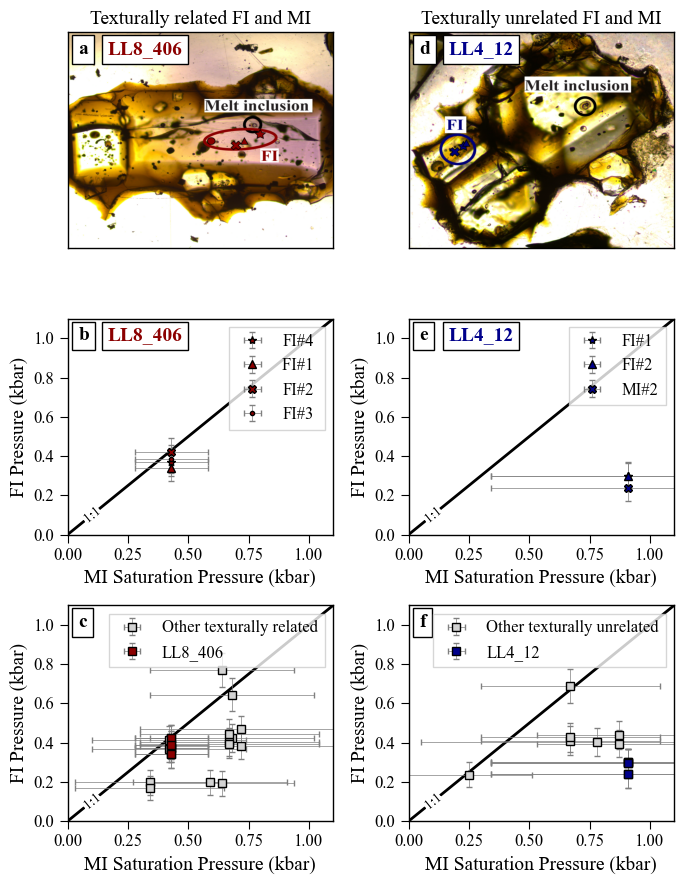

In [12]:
import re
figure_mosaic="""
AD
BE
CF


"""

plot_var = 'Xtal'
name_var = 'FI_name_reps'
color_column='SO2_Diad_Ratio'


fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(7, 9))
xlim=[0,1.1]
ylim=[0,1.1]

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

x='Sat_P_MI_kbar'
y='Med_MC_P_kbar'

xerr = 'Sat_P_MI_kbar_err'
yerr = 'std_dev_MC_P_kbar'

text_related=mifi_only['Texturally Related/Unrelated']=='R'
text_unrelated=mifi_only['Texturally Related/Unrelated']!='R'
textrelated_example='LL8_406'
textunrelated_example='LL4_12'

axes['C'].errorbar(mifi_only[x][text_related], mifi_only[y][text_related], xerr=mifi_only[xerr][text_related], yerr=mifi_only[yerr][text_related],
            fmt='s', linestyle='none', label='Other texturally related',ecolor='grey', elinewidth=0.5, capsize=2,
            zorder=-2, color='lightgrey',mec='k')

specific_FI=(text_related)&(mifi_only[name_var].str.contains(textrelated_example))

axes['C'].errorbar(mifi_only[x][specific_FI], mifi_only[y][specific_FI], xerr=mifi_only[xerr][specific_FI], yerr=mifi_only[yerr][specific_FI],
            fmt='s', linestyle='none', label=textrelated_example, ecolor='grey', elinewidth=0.5, capsize=2,
            zorder=-2, color='darkred',mec='k')

axes['C'].legend(loc='upper right',fontsize=12)#,title='Texturally related'

axes['F'].errorbar(mifi_only[x][text_unrelated], mifi_only[y][text_unrelated], xerr=mifi_only[xerr][text_unrelated], yerr=mifi_only[yerr][text_unrelated],
            fmt='s', linestyle='none', label='Other texturally unrelated',ecolor='grey', elinewidth=0.5, capsize=2,
            zorder=-2, color='lightgrey',mec='k')

specific_FI=(text_unrelated)&(mifi_only[name_var].str.contains(textunrelated_example))

axes['F'].errorbar(mifi_only[x][specific_FI], mifi_only[y][specific_FI], xerr=mifi_only[xerr][specific_FI], yerr=mifi_only[yerr][specific_FI],
            fmt='s', linestyle='none', label=textunrelated_example, ecolor='grey', elinewidth=0.5, capsize=2,
            zorder=-2, color='darkblue',mec='k')
axes['F'].legend(loc='upper right',fontsize=12)#,title='Texturally unrelated'



filter_labels = [textrelated_example, textunrelated_example]

filters = [
    (mifi_only[plot_var].str.contains(label), label) for label in filter_labels
]

symbols = ['*', '^', 'X', '.', 's', 'p', 'D', 'd']

for ax_key, (filt, label) in zip(['B', 'E'], filters):
    ax = axes[ax_key]
    
    mask = filt  # Use the current filter to create a mask
    
    unique_names = mifi_only[mask][name_var].unique()
    num_names = len(unique_names)
    
    # Determine the color based on ax_key
    point_color = 'darkred' if ax_key == 'B' else 'darkblue'
    
    for idx, name in enumerate(unique_names):
        select_name = name
        xtal_title = re.split(r'[-_]', name)[0] + '_' + re.split(r'[-_]', name)[1]
        name_mask = mifi_only[mask][name_var] == select_name
        
        # Get the symbol for the current name
        symbol = symbols[idx % len(symbols)]
        
        for sample in mifi_only[mask][name_mask][plot_var].unique():
            sample_mask = mifi_only[mask][name_mask][plot_var] == sample
            x_coord = mifi_only[mask][name_mask][sample_mask].loc[:, 'Sat_P_MI_kbar']
            y_coord = mifi_only[mask][name_mask][sample_mask].loc[:, 'Med_MC_P_kbar']
            
            # Plot points using the chosen symbol and color
            ax.errorbar(x_coord, y_coord, xerr=mifi_only[mask][name_mask][sample_mask][xerr],
                        yerr=mifi_only[mask][name_mask][sample_mask][yerr],
                        fmt=symbol, linestyle='none', label=re.split(r'[-_]', name)[-1],
                        ecolor='grey', elinewidth=0.5, capsize=2, zorder=-2,
                        color=point_color, mec='k')
            
        ax.legend(loc='upper right', fontsize=12, ncols=1) #title=xtal_title,



for ax_key in ['C', 'F', 'B', 'E']:
    ax = axes[ax_key]

    ax.set_xlabel('MI Saturation Pressure (kbar)')
    ax.set_ylabel('FI Pressure (kbar)')

    if ax_key in ['C','F']:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

    ax.plot([xlim[0], xlim[1]], [xlim[0], xlim[1]], 'k', zorder=-3, linewidth=2, label="1:1")

    xvals = [0.1]  # Define x-values for labelLines if needed
    labelLines(ax.get_lines(), zorder=2.5, xvals=xvals, fontsize=10)




subplot_labels = ['A', 'D', 'B', 'E', 'C', 'F']
pos_a2h=(0.04, 0.9)#(0.92,0.1)#
label_positions = [pos_a2h, pos_a2h, pos_a2h, pos_a2h, 
                   pos_a2h, pos_a2h]

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)


# Load the images for axes a-d
extension=".tif"
image_f = plt.imread(helper_file_folder+'/'+"LL8_406_5X_mod"+extension)
image_g = plt.imread(helper_file_folder+'/'+"LL4_12_5X_mod"+extension)

axis_labels = ['A', 'D']
axes['A'].imshow(image_f,aspect='auto')
axes['D'].imshow(image_g,aspect='auto')
axes['A'].set_title("Texturally related FI and MI")
axes['D'].set_title("Texturally unrelated FI and MI")

axes['A'].text(0.15,0.9,textrelated_example,transform=axes['A'].transAxes,fontsize=14,fontweight='bold',color='darkred',bbox=bbox)
axes['D'].text(0.15,0.9,textunrelated_example,transform=axes['D'].transAxes,fontsize=14,fontweight='bold',color='darkblue',bbox=bbox)
axes['B'].text(0.15,0.9,textrelated_example,transform=axes['B'].transAxes,fontsize=14,fontweight='bold',color='darkred',bbox=bbox)
axes['E'].text(0.15,0.9,textunrelated_example,transform=axes['E'].transAxes,fontsize=14,fontweight='bold',color='darkblue',bbox=bbox)

for label in axis_labels:
    axes[label].axis('on')
    axes[label].set(xticks=[], yticks=[], xticklabels=[], yticklabels=[])

## Saves figure
fig.tight_layout()
fig.savefig(figpath + '/' + 'Fig2_MIFIpairs.pdf', dpi=300)
fig.savefig(figpath + '/' + 'Fig2_MIFIpairs.png', dpi=300)

### FIG texture for supplement (Just I, loop plot crystal by crystal and regress)

meta NOT subset; don't know how to subset; dropped


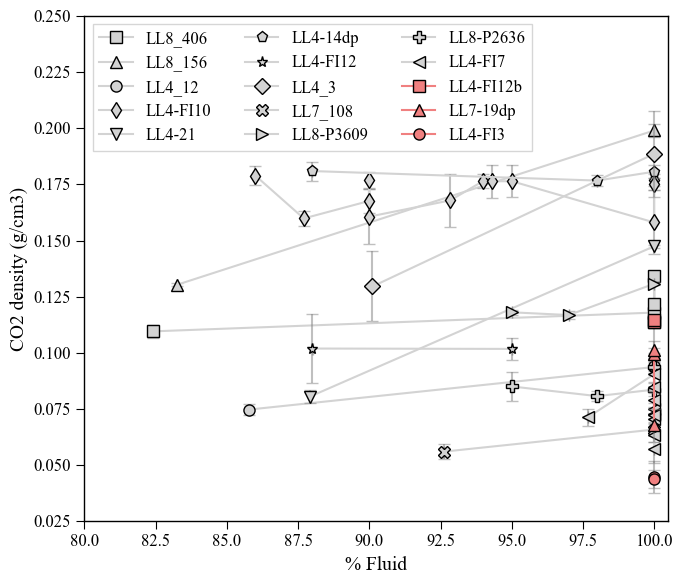

In [13]:
figure_mosaic="""
I
"""

plot_var = 'Xtal'
name_var = 'FI_name_reps'
color_column='SO2_Diad_Ratio'


fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(7, 6))
xlim=[80,100.5]
ylim=[0.025,0.25]

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

## Plot 'I'


x = '% Fluid_y'
y = 'CO2_dens_gcm3'

xerr = '1σ'  # 'CO2_err(stdev or 1sig)'
yerr = '1σ'  # 'CO2_err(stdev or 1sig)'
color = 'lightgrey'
colors = ['lightgrey', 'lightcoral']  # List of colors to cycle through

df_4plot=melt_nomelt_pairs.copy()
df_4plot=df_4plot.sort_values(by=x)
symbols = ['s', '^', 'o', 'd', 'v', 'p', '*', 'D', 'X', '>', 'P', '<']

# Create a list of unique values in the 'Xtal' column
xtal_values = df_4plot['Xtal'].unique()

# Initialize counters to keep track of the symbol and color indices
symbol_index = 0
color_index = 0

for i, xtal_value in enumerate(xtal_values):
    xtal_df = df_4plot[df_4plot['Xtal'] == xtal_value]
    
    # Skip groups with only one entry
    if len(xtal_df) <= 1:
        continue
    
    symbol = symbols[symbol_index % len(symbols)]  # Cycle through symbols
    color = colors[color_index % len(colors)]  # Cycle through colors
    # axes['A'].plot(x_group, y_group, marker='', linestyle='-', zorder=-1,color='black')
        
    axes['I'].errorbar(x=xtal_df[x], y=xtal_df[y], xerr=xtal_df[xerr], yerr=xtal_df[yerr],
                       marker='', linestyle="",ecolor='grey', barsabove=False, capsize=4, alpha=0.5)

    sc=axes['I'].plot(xtal_df[x], xtal_df[y], mec='k', mfc=color,marker=symbol, markersize=8, linestyle='-', color=color, label=xtal_value)


    # Update the symbol index and color index
    symbol_index += 1
    if symbol_index % len(symbols) == 0 and symbol_index != 0:
        color_index += 1

axes['I'].legend(ncol=3, loc='best',fontsize=12)
axes['I'].set_xlabel('% Fluid')
axes['I'].set_ylabel('CO2 density (g/cm3)')
axes['I'].set_xlim(xlim)
axes['I'].set_ylim(ylim)

## Saves figure
fig.tight_layout()
fig.savefig(figpath + '/' + 'FigS2_Fluid_percent_pairs.pdf')
fig.savefig(figpath + '/' + 'FigS2_Fluid_percent_pairs.png')

### FIG textures for supplement (This is each individual plot)

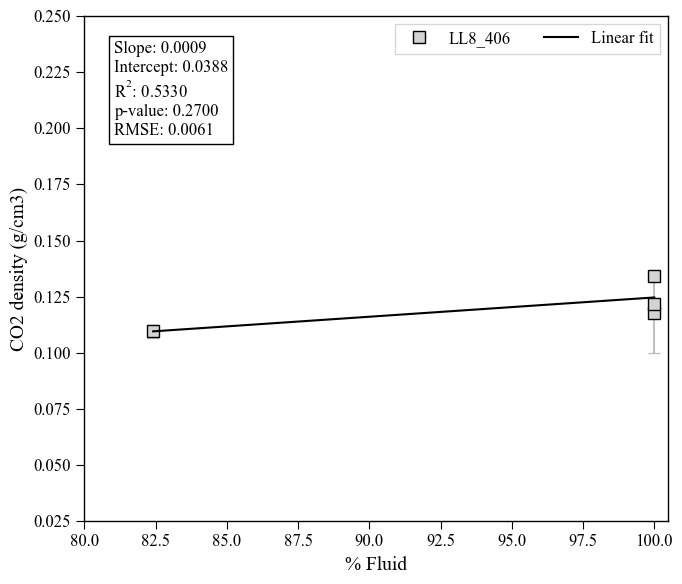

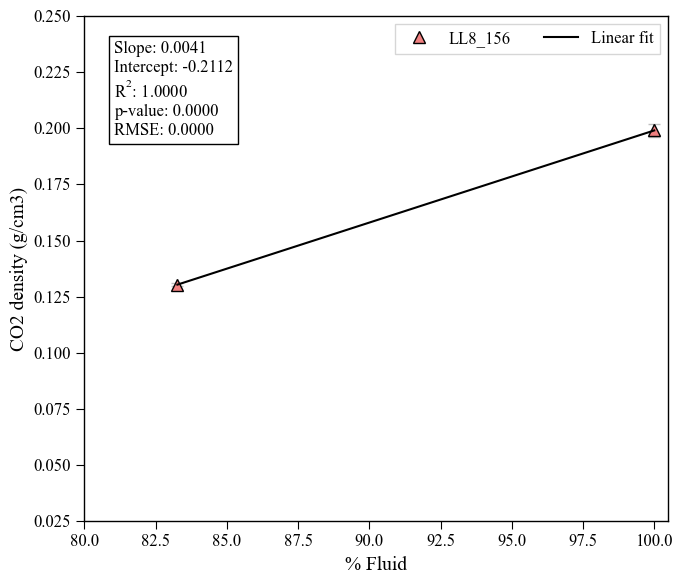

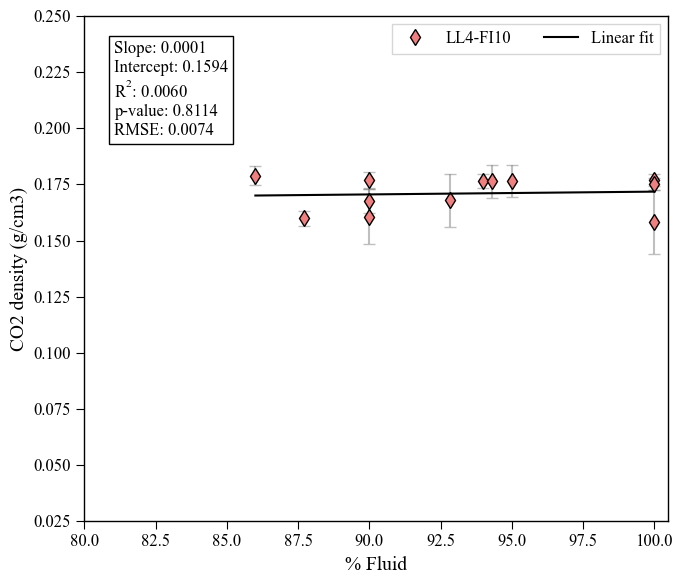

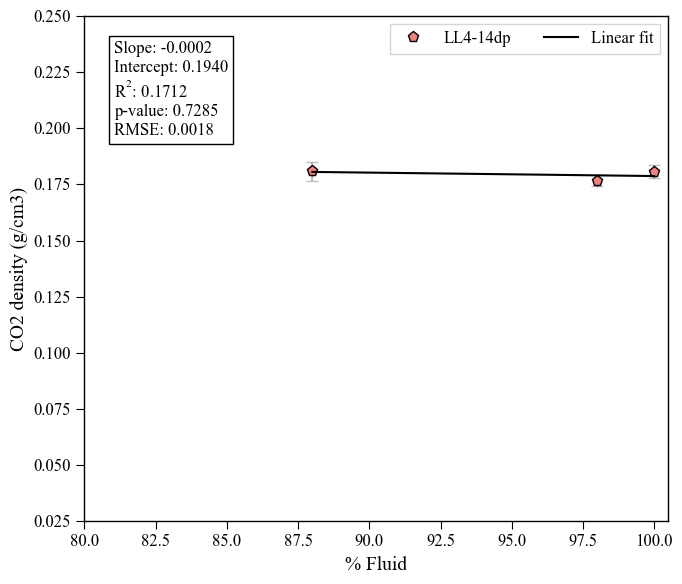

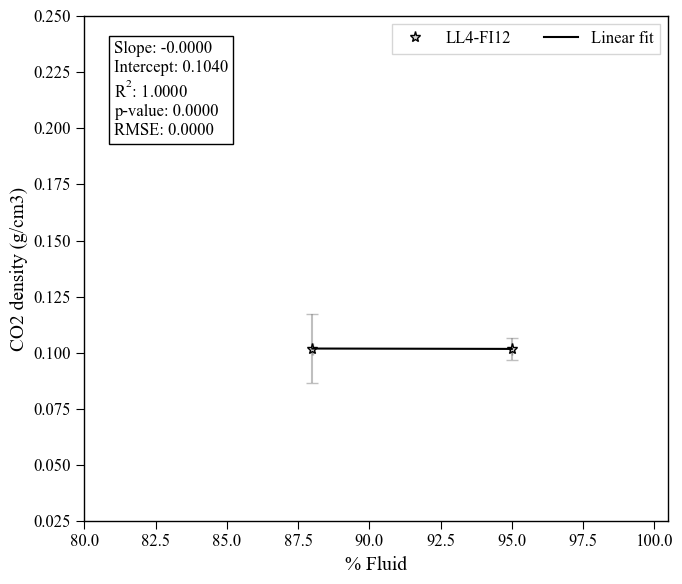

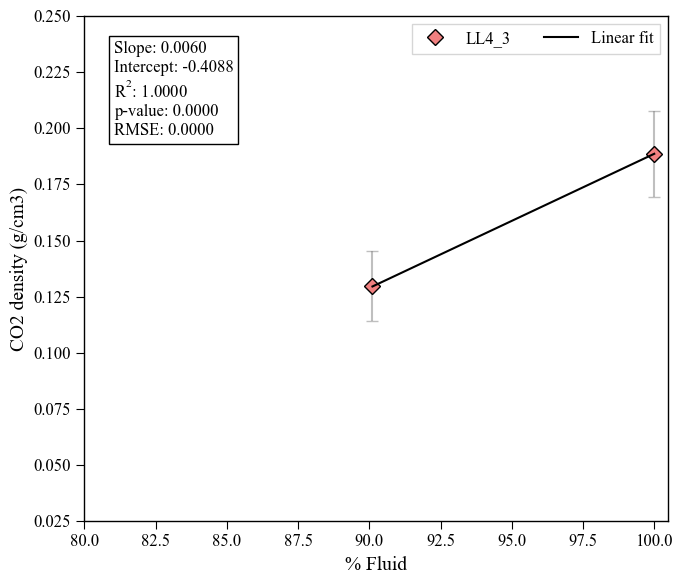

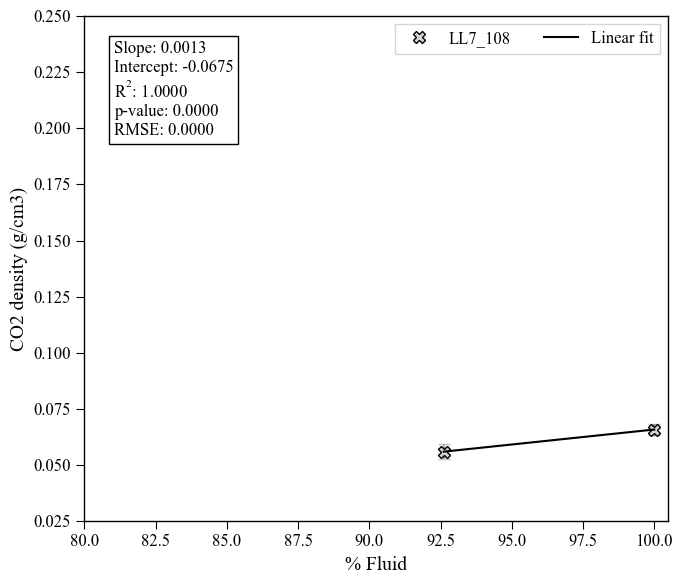

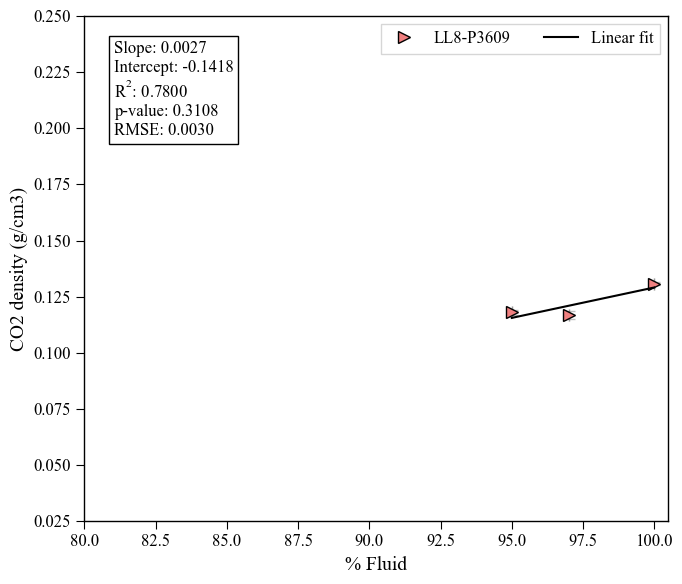

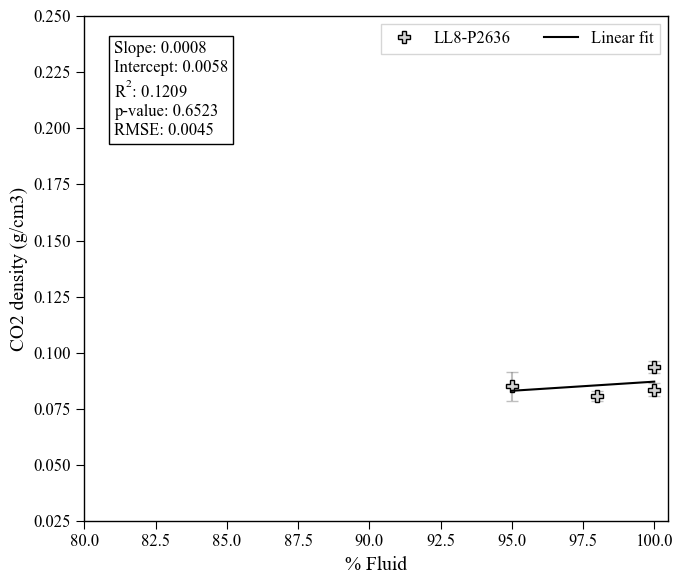

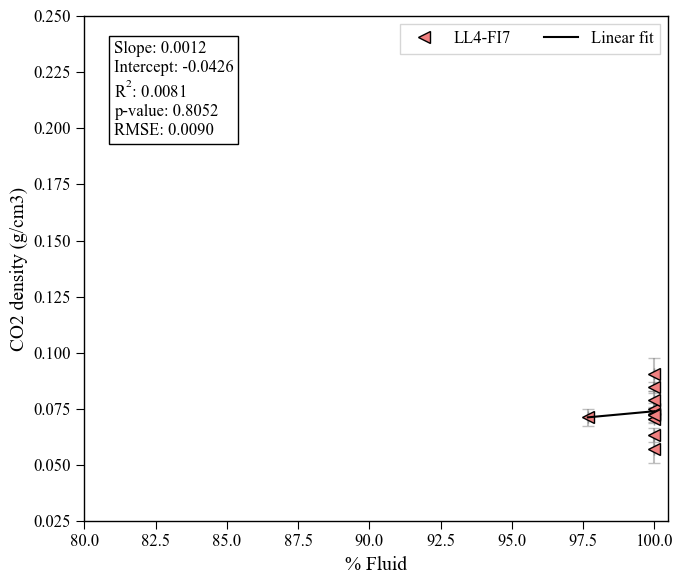

In [14]:
output_directory = figpath + '/single_xtal_FIpairs'
os.makedirs(output_directory, exist_ok=True)

xlim=[80,100.5]
ylim=[0.025,0.25]

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

## Plot 'I'


x = '% Fluid_y'
y = 'CO2_dens_gcm3'

xerr = '1σ'  # 'CO2_err(stdev or 1sig)'
yerr = '1σ'  # 'CO2_err(stdev or 1sig)'
color = 'lightgrey'
colors = ['lightgrey', 'lightcoral']  # List of colors to cycle through

df_4plot=melt_nomelt_pairs.copy()
df_4plot=df_4plot.sort_values(by=x)
symbols = ['s', '^', 'o', 'd', 'v', 'p', '*', 'D', 'X', '>', 'P', '<']

# Create a list of unique values in the 'Xtal' column
xtal_values = df_4plot['Xtal'].unique()

# Initialize counters to keep track of the symbol and color indices
symbol_index = 0
color_index = 0


for i, xtal_value in enumerate(xtal_values):
    xtal_df = df_4plot[df_4plot['Xtal'] == xtal_value]
    # Skip if there's only one value or if all 'x' values are 100
    if len(xtal_df) <= 1 or all(x == 100 for x in xtal_df[x]):
        continue
    # Create a new figure for each 'Xtal' value
    fig, axes = plt.subplots(figsize=(7, 6))

    axes.errorbar(x=xtal_df[x], y=xtal_df[y], xerr=xtal_df[xerr], yerr=xtal_df[yerr],
                  marker='', linestyle="", ecolor='grey', barsabove=False, capsize=4, alpha=0.5)

    # Cycle through symbols and colors
    symbol = symbols[i % len(symbols)]
    color = colors[i % len(colors)]

    sc = axes.plot(xtal_df[x], xtal_df[y], mec='k', mfc=color, marker=symbol, markersize=8,
                   linestyle='', color=color, label=xtal_value)

    # Calculate linear regression using scipy.stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(xtal_df[x], xtal_df[y])

    # Create the regression line
    regression_line = slope * xtal_df[x] + intercept

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(np.mean((regression_line - xtal_df[y]) ** 2))

    # Add a textbox with regression parameters
    textstr = (
        f'Slope: {slope:.4f}\nIntercept: {intercept:.4f}\n$R^2$: {r_value**2:.4f}\n'
        f'p-value: {p_value:.4f}\nRMSE: {rmse:.4f}'
    )
    axes.text(0.05, 0.95, textstr, transform=axes.transAxes, fontsize=12, verticalalignment='top', bbox=bbox)

    # Plot the regression line
    axes.plot(xtal_df[x], regression_line, color='k', linestyle='-', label='Linear fit')

    axes.legend(ncol=3, loc='best', fontsize=12)
    axes.set_xlabel('% Fluid')
    axes.set_ylabel('CO2 density (g/cm3)')
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)

    # Save the individual figure
    individual_figure_name = f'FigS2_Fluid_percent_pairs_{xtal_value}.png'
    individual_figure_path = os.path.join(output_directory, individual_figure_name)
    fig.tight_layout()
    fig.savefig(individual_figure_path)


    # plt.close(fig)  # Close the figure to release resources



# FIGURE 3 - Histograms + CDF

In [15]:
## Set the dataframe to plot for the histograms

lei_fi_plotting_df=lei_df.copy() ## This one was filtered for fluid>80% and bad spec out

###

P_kbar=mis['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']/1000

Depth_ryan_lerner=pf.convert_pressure_to_depth(P_kbar=P_kbar,
                model='ryan_lerner')

mis['Depth_RL(km)']=Depth_ryan_lerner

In [17]:
## This preps the data for the CDF plots and calculates MafiCH sat Ps for Penny's MI

import MafiCH_satPs as mch

## This sets the working folder, if you place all your files in the same folder as the script and notebook, no need to change this line.
working_folder=os.getcwd()

## This sets the path to the input file created by create_mafich_inputfile
satpressinput = working_folder+'/'+ 'MafiCH_satpress_input.csv'

## This sets the path to the output file
satpressoutput = working_folder+'/'+'MafiCH_satpress_output.csv'

## Load in your data

Sample_Data=pd.read_excel("P:\WORK-GENERAL\POSTDOC-UCB\BERKELEY-VIBE\Documents\Projects\Data\Hawaii_FI\MIFI_paper\Helper_files\Supplement_Wieser_et_al_G3.xlsx", sheet_name='Melt_Inclusions')

## Set your column names (RESPECT THE ORDER!!!!)
# LLs samples

sample_cols = ['Sample Name',	
                'H2O (wt%) (wt%, PEC-corr)',	
                'Total CO2 (glass + bubble, ppm)',	
                'SiO2 (wt%, PEC-corr)',	
                'TiO2 (wt%, PEC-corr)',	
                'Al2O3 (wt%, PEC-corr)',	
                'FeO (wt%, PEC-corr)',	
                'MnO (wt%, PEC-corr)',	
                'MgO (wt%, PEC-corr)',	
                'CaO (wt%, PEC-corr)',	
                'Na2O (wt%, PEC-corr)',	
                'K2O (wt%, PEC-corr)',	
                'P2O5 (wt%, PEC-corr)']


## CREATE THE INPUT FILE
mch.create_mafich_inputfile(Sample_Data,sample_cols)

SatP_MafiCH_LLs=mch.run_mafich(satpressinput,satpressoutput)
SatP_MafiCH_LLs


mis_wMafiCH=pd.merge(mis,SatP_MafiCH_LLs[['sample','Pressure (bar)',	'XfH2O']],left_on='Sample Name',right_on='sample')
mis_wMafiCH = mis_wMafiCH.rename(columns={'sample': 'sample_MafiCH', 'Pressure (bar)': 'MafiCH Saturation Pressure (Total CO2 - PEC corrected)', 'XfH2O': 'MafiCH XfH2O'})
mis_wMafiCH

mis_wMafiCH['Magmasat_err4cdf']=mis_wMafiCH['Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)']-mis_wMafiCH['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']

sample  dissolved H2O wt%  dissolved CO2 ppm  wt% SiO2  wt% TiO2  \
0     LL8_613b           0.206067         248.344846    49.770     2.394   
1      LL8_615           0.182499         397.739083    49.676     1.815   
2    LL8_617_a           0.181196         468.581356    49.028     2.009   
3    LL8_623_b           0.170695        1001.964557    48.418     2.448   
4      LL8_626           0.178975         629.467127    49.215     2.027   
..         ...                ...                ...       ...       ...   
98   LL8_400_b           0.173048          34.826259    49.508     2.100   
99   LL8_155_c           0.184080          64.044277    49.468     1.999   
100    LL4_39b           0.287698         260.403876    51.579     2.151   
101   LL7_205b           0.179658          34.010063    50.008     2.059   
102    LL7_118           0.178672          50.725951    49.996     2.046   

     wt% Al2O3  wt% FeO  wt% MnO  wt% MgO  wt% CaO  wt% Na2O  wt% K2O  \
0       12.900   11.336    0.142    9.328   10.702     2.469    0.349   
1       10.928   11.336    0.151   13.612    9.435     2.131    0.334   
2       11.323   11.338    0.135   13.349    9.757     2.092    0.324   
3       11.895   11.331    0.177   12.514   10.022     2.103    0.449   
4       11.612   11.331    0.172   12.783    9.789     2.181    0.330   
..         ...      ...      ...      ...      ...       ...      ...   
98      10.774   11.335    0.187   13.183    9.887     2.080    0.337   
99      11.505   11.338    0.168   12.453    9.948     2.286    0.266   
100     13.568   11.409    0.164    6.799   10.503     2.723    0.381   
101     11.842   11.338    0.173   11.378    9.999     2.276    0.385   
102     12.364   11.338    0.185   10.871    9.964     2.294    0.388   

     wt% P2O5  
0       0.229  
1       0.229  
2       0.291  
3       0.299  
4       0.209  
..        ...  
98      0.258  
99      0.207  
100     0.257  
101     0.186  
102     0.206  

[103 rows x 13 columns]

In [18]:
### this is what is needed for the CDF plots

## This is to make equidistant colors from a colorblind safe palette for the CDF plots

import matplotlib.cm as cm

# Get the coolwarm colormap
coolwarm_cmap = cm.get_cmap('cividis')

# Specify the number of equidistant colors
num_colors = 5

# Generate equidistant color values from the colormap
equidistant_colors = coolwarm_cmap(np.linspace(0, 1, num_colors))
equidistant_colors=['darkorange','teal','maroon','grey','gold','midnightblue']

sorted_lei_data = {
    'MSAT_LL4': mis_wMafiCH[['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL4')].sort_values(by='Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'SHISHKINA_LL4': mis_wMafiCH[['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL4')].sort_values(by='Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'IM_LL4': mis_wMafiCH[['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL4')].sort_values(by='Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'MAFICH_LL4': mis_wMafiCH[['MafiCH Saturation Pressure (Total CO2 - PEC corrected)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL4')].sort_values(by='MafiCH Saturation Pressure (Total CO2 - PEC corrected)')/ 1000,
    'VOLATILECALC_LL4': mis_wMafiCH[['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL4')].sort_values(by='VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)')/ 1000,

    'FI_LL4':lei_df[['Mean_MC_P_kbar','std_dev_MC_P_kbar']][lei_df['filename_4match'].str.contains('LL4')].sort_values(by='Mean_MC_P_kbar'),

    'MSAT_LL8': mis_wMafiCH[['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL8')].sort_values(by='Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'SHISHKINA_LL8': mis_wMafiCH[['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL8')].sort_values(by='Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'IM_LL8': mis_wMafiCH[['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL8')].sort_values(by='Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'MAFICH_LL8': mis_wMafiCH[['MafiCH Saturation Pressure (Total CO2 - PEC corrected)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL8')].sort_values(by='MafiCH Saturation Pressure (Total CO2 - PEC corrected)')/ 1000,
    'VOLATILECALC_LL8': mis_wMafiCH[['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL8')].sort_values(by='VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)')/ 1000,

    'FI_LL8':lei_df[['Mean_MC_P_kbar','std_dev_MC_P_kbar']][lei_df['filename_4match'].str.contains('LL8')].sort_values(by='Mean_MC_P_kbar'),

    'MSAT_LL7': mis_wMafiCH[['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL7')].sort_values(by='Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'SHISHKINA_LL7': mis_wMafiCH[['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL7')].sort_values(by='Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'IM_LL7': mis_wMafiCH[['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL7')].sort_values(by='Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)')/ 1000,
    'MAFICH_LL7': mis_wMafiCH[['MafiCH Saturation Pressure (Total CO2 - PEC corrected)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL7')].sort_values(by='MafiCH Saturation Pressure (Total CO2 - PEC corrected)')/ 1000,
    'VOLATILECALC_LL7': mis_wMafiCH[['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)','Magmasat_err4cdf']][mis_wMafiCH['Sample_ID'].str.contains('LL7')].sort_values(by='VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)')/ 1000,

    'FI_LL7':lei_df[['Mean_MC_P_kbar','std_dev_MC_P_kbar']][lei_df['filename_4match'].str.contains('LL7')].sort_values(by='Mean_MC_P_kbar')
}

MI_linewidth=2
FI_linewidth=3


# The dictionary containing the data and plot properties
data_and_properties = {
        'MSAT_LL4': {
        'data': sorted_lei_data['MSAT_LL4']['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': sorted_lei_data['MSAT_LL4']['Magmasat_err4cdf'],
        'properties': {'linewidth':MI_linewidth, 'label': 'MSAT', 'color': equidistant_colors[0],'linestyle':'-.'}
    },
        'SHISHKINA_LL4': {
        'data': sorted_lei_data['SHISHKINA_LL4']['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'SHISHKINA', 'color': equidistant_colors[1]}
    },
        'IM_LL4': {
        'data': sorted_lei_data['IM_LL4']['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'IM', 'color': equidistant_colors[2]}
    },
        'MAFICH_LL4': {
        'data': sorted_lei_data['MAFICH_LL4']['MafiCH Saturation Pressure (Total CO2 - PEC corrected)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'MAFICH', 'color': equidistant_colors[3]}
    },
        'VOLATILECALC_LL4': {
        'data': sorted_lei_data['VOLATILECALC_LL4']['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'VOLATILECALC', 'color': equidistant_colors[4]}
    },
        'MSAT_LL8': {
        'data': sorted_lei_data['MSAT_LL8']['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': sorted_lei_data['MSAT_LL8']['Magmasat_err4cdf'],
        'properties': {'linewidth': MI_linewidth, 'label': 'MSAT', 'color':  equidistant_colors[0]}
    },
        'SHISHKINA_LL8': {
        'data': sorted_lei_data['SHISHKINA_LL8']['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'SHISHKINA', 'color': equidistant_colors[1]}
    },
        'IM_LL8': {
        'data': sorted_lei_data['IM_LL8']['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'IM', 'color': equidistant_colors[2]}
    },
        'MAFICH_LL8': {
        'data': sorted_lei_data['MAFICH_LL8']['MafiCH Saturation Pressure (Total CO2 - PEC corrected)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'MAFICH', 'color': equidistant_colors[3]}
    },
        'VOLATILECALC_LL8': {
        'data': sorted_lei_data['VOLATILECALC_LL8']['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'VOLATILECALC', 'color': equidistant_colors[4]}
    },
        'MSAT_LL7': {
        'data': sorted_lei_data['MSAT_LL7']['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': sorted_lei_data['MSAT_LL7']['Magmasat_err4cdf'],
        'properties': {'linewidth': MI_linewidth, 'label': 'MSAT', 'color':  equidistant_colors[0]}
    },
        'SHISHKINA_LL7': {
        'data': sorted_lei_data['SHISHKINA_LL7']['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'SHISHKINA', 'color': equidistant_colors[1]}
    },
        'IM_LL7': {
        'data': sorted_lei_data['IM_LL7']['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'IM', 'color': equidistant_colors[2]}
    },
        'MAFICH_LL7': {
        'data': sorted_lei_data['MAFICH_LL7']['MafiCH Saturation Pressure (Total CO2 - PEC corrected)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'MAFICH', 'color': equidistant_colors[3]}
    },
        'VOLATILECALC_LL7': {
        'data': sorted_lei_data['VOLATILECALC_LL7']['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)'],
        'error_data': 0,
        'properties': {'linewidth': MI_linewidth, 'label': 'VOLATILECALC', 'color': equidistant_colors[4]}
    },
        'FI_LL4': {
        'data': sorted_lei_data['FI_LL4']['Mean_MC_P_kbar'],
        'error_data': sorted_lei_data['FI_LL4']['std_dev_MC_P_kbar'],
        'properties': {'linewidth': FI_linewidth, 'label': 'FI', 'color':  equidistant_colors[5]}  
    },
        'FI_LL8': {
        'data': sorted_lei_data['FI_LL8']['Mean_MC_P_kbar'],
        'error_data': sorted_lei_data['FI_LL8']['std_dev_MC_P_kbar'],
        'properties': {'linewidth': FI_linewidth, 'label': 'FI', 'color': equidistant_colors[5]}  
    },
        'FI_LL7': {
        'data': sorted_lei_data['FI_LL7']['Mean_MC_P_kbar'],
        'error_data': sorted_lei_data['FI_LL7']['std_dev_MC_P_kbar'],
        'properties': {'linewidth': FI_linewidth, 'label': 'FI', 'color': equidistant_colors[5]}  
    },
}

## Bootstrap KS function

In [19]:
from scipy import stats
def calc_critKS_D(x1,x2,calpha=1.36):
    criticalksD=calpha*np.sqrt((len(x1)+len(x2))/(len(x1)*len(x2)))
    return criticalksD

def calculate_bootstrap_ks(data1, data2, data1_err, data2_err, iterations=2000,plot=True,plot_method='plot',xlabel="Pressure (kbar)"):
    # plot_method can be 'plot' to get a simple CDF, smoothed. If anything else, it will use step function to plot.
    # if plot is true, a figure is produced, if anything else it will not plot. 

    def calculate_ks_stat(data1, data2):
        return stats.ks_2samp(data1, data2)

    bootstrap_ks_stats = []
    bootstrap_p_values = []
    resampled_distributions = []

    for _ in range(iterations):
        data1_resample = np.random.normal(data1, data1_err)
        data2_resample = np.random.normal(data2, data2_err)
        
        ks_result = calculate_ks_stat(data1_resample, data2_resample)
        bootstrap_ks_stats.append(ks_result.statistic)
        bootstrap_p_values.append(ks_result.pvalue)
        
        resampled_distributions.append({
            'data1_resample': np.sort(data1_resample),
            'data2_resample': np.sort(data2_resample),
        })

    bootstrap_ks_stats = np.array(bootstrap_ks_stats)
    bootstrap_p_values = np.array(bootstrap_p_values)

    data1_resample_sorted = np.sort(data1_resample)
    data2_resample_sorted = np.sort(data2_resample)

    original_ks_stat, original_p_value = calculate_ks_stat(data1, data2)
    critD=calc_critKS_D(data1_resample_sorted,data2_resample_sorted)

    results = {
        'original_ks_stat': original_ks_stat,
        'original_p_value': original_p_value,
        'critical D-val':critD,
        'bootstrap_ks_stats': bootstrap_ks_stats,
        'bootstrap_p_values': bootstrap_p_values,
        'bootstrap_ks_mean': np.mean(bootstrap_ks_stats),
        'bootstrap_ks_std': np.std(bootstrap_ks_stats),
        'bootstrap_p_mean': np.mean(bootstrap_p_values),
        'bootstrap_p_std': np.std(bootstrap_p_values),
        'data1_resample_sorted': data1,
        'data2_resample_sorted': data2,
        'resampled_distributions': resampled_distributions,
    }

    if plot!=False:
        fig,ax=plt.subplots(1,1, figsize=(7, 5))
        # This plots all the bootstraped CDF 
        for i, distribution in enumerate(results['resampled_distributions']):
            if plot_method!='plot':
                ax.step(np.concatenate([distribution['data1_resample'],distribution['data1_resample'][-1:]]),np.arange(distribution['data1_resample'].size + 1) / distribution['data1_resample'].size, color='royalblue',alpha=0.2)
                ax.step(np.concatenate([distribution['data2_resample'],distribution['data2_resample'][-1:]]),np.arange(distribution['data2_resample'].size + 1) / distribution['data2_resample'].size, color='wheat',alpha=0.2)
            else:
                ax.plot(np.sort(distribution['data1_resample']), np.arange(1, len(distribution['data1_resample']) + 1) / len(distribution['data1_resample']), color='royalblue', alpha=0.2)
                ax.plot(np.sort(distribution['data2_resample']), np.arange(1, len(distribution['data2_resample']) + 1) / len(distribution['data2_resample']), color='wheat', alpha=0.2)
        

        # This plots the original data CDF
        if plot_method!='plot':
            ax.step(np.concatenate([results['data1_resample_sorted'],results['data1_resample_sorted'][-1:]]),np.arange(results['data1_resample_sorted'].size + 1) / results['data1_resample_sorted'].size, color='midnightblue', linewidth=2,label='Data1')
            ax.step(np.concatenate([results['data2_resample_sorted'],results['data2_resample_sorted'][-1:]]),np.arange(results['data2_resample_sorted'].size + 1) / results['data2_resample_sorted'].size, color='darkorange', linewidth=2,label='Data2')
        else:
            ax.plot(results['data1_resample_sorted'], np.arange(1, len(results['data1_resample_sorted']) + 1) / len(results['data1_resample_sorted']), color='midnightblue',linewidth=2, label='Data1')
            ax.plot(results['data2_resample_sorted'], np.arange(1, len(results['data2_resample_sorted']) + 1) / len(results['data2_resample_sorted']), color='darkorange',linewidth=2, label='Data2')

        # This creates a text box with all the statistics
        mean_ks_text = f"MC KS Mean: {results['bootstrap_ks_mean']:.3f} ± {results['bootstrap_ks_std']:.3f}"
        mean_p_text = f"MC P-val Mean: {results['bootstrap_p_mean']:.3f} ± {results['bootstrap_p_std']:.3f}"
        text_box = f"Sample KS Statistic: {results['original_ks_stat']:.3f}\nSample P-val: {results['original_p_value']:.3f}\nCritical KS D: {critD:.3f}\n{mean_ks_text}\n{mean_p_text}"

        ax.text(0.55, 0.5, text_box, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
        ax.set_xlim([0,max(data1.max(), data2.max())])
        ax.legend()
        ax.set_xlabel(xlabel)
        ax.set_ylabel("Cumulative probability")
    
    if 'fig' in locals():
        final_result=fig,results
    else:
        final_result=results
    
    return final_result



# ###### SET YOUR DATA ENTRIES AND ITERATIONS##### Example here
# fill4_data = sorted_lei_data['FI_LL4']['Mean_MC_P_kbar'] #data 1 -pd.Series, sorted
# fill4_errors = sorted_lei_data['FI_LL4']['std_dev_MC_P_kbar'] #data 1 error

# msatll4_data = sorted_lei_data['MSAT_LL4']['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)']#data 2
# msatll4_errors = sorted_lei_data['MSAT_LL4']['Magmasat_err4cdf'] #data 2 error

# iterations=1000

# # Calculate the results don't call fig if you didn't say plot=True
# final_result= calculate_bootstrap_ks(fill4_data, msatll4_data, fill4_errors, msatll4_errors, iterations=iterations,plot=True,plot_method='step',xlabel="Pressure (kbar)")


In [20]:
## LL4 ##
MIcombo_df4 = pd.concat([sorted_lei_data['MSAT_LL4']['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'].rename('MSAT(kbar)').sort_index(), 
                        sorted_lei_data['SHISHKINA_LL4']['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'].rename('SHISHKINA(kbar)').sort_index(), 
                        sorted_lei_data['IM_LL4']['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'].rename('IM(kbar)').sort_index(), 
                        sorted_lei_data['MAFICH_LL4']['MafiCH Saturation Pressure (Total CO2 - PEC corrected)'].rename('MAFICH(kbar)').sort_index(), 
                        sorted_lei_data['VOLATILECALC_LL4']['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)'].rename('VOLATILECALC(kbar)').sort_index()], 
                        axis=1)

average_sol_model4=pd.DataFrame({})
average_sol_model4['mean'] = MIcombo_df4.mean(axis=1)
average_sol_model4['std'] = MIcombo_df4.std(axis=1)

MIcombo_df4['AVG_SOLMODEL(kbar)']=average_sol_model4['mean'].copy()
MIcombo_df4['AVG_SOLMODEL_STD(kbar)']=average_sol_model4['std'].copy()
MIcombo_df4['SOLMODEL_ERRORS(kbar)']=sorted_lei_data['MSAT_LL4']['Magmasat_err4cdf'].rename('MI_error(kbar)').sort_index() 


FIcombo_df4=pd.DataFrame({})
FIcombo_df4['FI(kbar)']=sorted_lei_data['FI_LL4']['Mean_MC_P_kbar'].rename('FI(kbar)').sort_index()
FIcombo_df4['FI_error(kbar)']=sorted_lei_data['FI_LL4']['std_dev_MC_P_kbar'].rename('FI_error(kbar)').sort_index() #data 1 error

## LL7 ##
MIcombo_df7 = pd.concat([sorted_lei_data['MSAT_LL7']['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'].rename('MSAT(kbar)').sort_index(), 
                        sorted_lei_data['SHISHKINA_LL7']['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'].rename('SHISHKINA(kbar)').sort_index(), 
                        sorted_lei_data['IM_LL7']['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'].rename('IM(kbar)').sort_index(), 
                        sorted_lei_data['MAFICH_LL7']['MafiCH Saturation Pressure (Total CO2 - PEC corrected)'].rename('MAFICH(kbar)').sort_index(), 
                        sorted_lei_data['VOLATILECALC_LL7']['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)'].rename('VOLATILECALC(kbar)').sort_index()], 
                        axis=1)

average_sol_model7=pd.DataFrame({})
average_sol_model7['mean'] = MIcombo_df7.mean(axis=1)
average_sol_model7['std'] = MIcombo_df7.std(axis=1)

MIcombo_df7['AVG_SOLMODEL(kbar)']=average_sol_model7['mean'].copy()
MIcombo_df7['AVG_SOLMODEL_STD(kbar)']=average_sol_model7['std'].copy()
MIcombo_df7['SOLMODEL_ERRORS(kbar)']=sorted_lei_data['MSAT_LL7']['Magmasat_err4cdf'].rename('MI_error(kbar)').sort_index() 


FIcombo_df7=pd.DataFrame({})
FIcombo_df7['FI(kbar)']=sorted_lei_data['FI_LL7']['Mean_MC_P_kbar'].rename('FI(kbar)').sort_index()
FIcombo_df7['FI_error(kbar)']=sorted_lei_data['FI_LL7']['std_dev_MC_P_kbar'].rename('FI_error(kbar)').sort_index() #data 1 error

## LL8 ##
MIcombo_df8 = pd.concat([sorted_lei_data['MSAT_LL8']['Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'].rename('MSAT(kbar)').sort_index(), 
                        sorted_lei_data['SHISHKINA_LL8']['Shishkina  Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'].rename('SHISHKINA(kbar)').sort_index(), 
                        sorted_lei_data['IM_LL8']['Iacono-Marziano Saturation Pressure (bar)  (Total, PEC-corr CO2, Measured H2O)'].rename('IM(kbar)').sort_index(), 
                        sorted_lei_data['MAFICH_LL8']['MafiCH Saturation Pressure (Total CO2 - PEC corrected)'].rename('MAFICH(kbar)').sort_index(), 
                        sorted_lei_data['VOLATILECALC_LL8']['VolatileCalc Saturation pressure macro (bar)  (Total, PEC-corr CO2,  Measured H2O)'].rename('VOLATILECALC(kbar)').sort_index()], 
                        axis=1)

average_sol_model8=pd.DataFrame({})
average_sol_model8['mean'] = MIcombo_df8.mean(axis=1)
average_sol_model8['std'] = MIcombo_df8.std(axis=1)

MIcombo_df8['AVG_SOLMODEL(kbar)']=average_sol_model8['mean'].copy()
MIcombo_df8['AVG_SOLMODEL_STD(kbar)']=average_sol_model8['std'].copy()
MIcombo_df8['SOLMODEL_ERRORS(kbar)']=sorted_lei_data['MSAT_LL8']['Magmasat_err4cdf'].rename('MI_error(kbar)').sort_index() 


FIcombo_df8=pd.DataFrame({})
FIcombo_df8['FI(kbar)']=sorted_lei_data['FI_LL8']['Mean_MC_P_kbar'].rename('FI(kbar)').sort_index()
FIcombo_df8['FI_error(kbar)']=sorted_lei_data['FI_LL8']['std_dev_MC_P_kbar'].rename('FI_error(kbar)').sort_index() #data 1 error

#### DISPLAY DATA #########
display(MIcombo_df4.head(2))
display(FIcombo_df4.head(2))
display(MIcombo_df7.head(2))
display(FIcombo_df7.head(2))
display(MIcombo_df8.head(2))
display(FIcombo_df8.head(2))

MSAT(kbar)  SHISHKINA(kbar)  IM(kbar)  MAFICH(kbar)  VOLATILECALC(kbar)  \
28        0.56         0.701795  0.828804         0.336               0.819   
29        0.83         0.975601  1.275725         0.559               1.323   

    AVG_SOLMODEL(kbar)  AVG_SOLMODEL_STD(kbar)  SOLMODEL_ERRORS(kbar)  
28            0.649120                0.206099                   0.18  
29            0.992665                0.317829                   0.50

FI(kbar)  FI_error(kbar)
0  0.583045        0.077960
1  0.596604        0.078316

MSAT(kbar)  SHISHKINA(kbar)  IM(kbar)  MAFICH(kbar)  VOLATILECALC(kbar)  \
40        0.33         0.423004  0.540101         0.208               0.572   
41        0.47         0.592691  0.760420         0.308               0.799   

    AVG_SOLMODEL(kbar)  AVG_SOLMODEL_STD(kbar)  SOLMODEL_ERRORS(kbar)  
40            0.414621                0.150363                   0.22  
41            0.586022                0.204069                   0.45

FI(kbar)  FI_error(kbar)
51  0.984916        0.098364
52  0.714373        0.081320

MSAT(kbar)  SHISHKINA(kbar)  IM(kbar)  MAFICH(kbar)  VOLATILECALC(kbar)  \
0        0.36         0.465390  0.602794         0.247              0.6530   
1        0.43         0.528862  0.695036         0.276              0.7695   

   AVG_SOLMODEL(kbar)  AVG_SOLMODEL_STD(kbar)  SOLMODEL_ERRORS(kbar)  
0            0.465637                0.167987                   0.25  
1            0.539879                0.199140                   0.17

FI(kbar)  FI_error(kbar)
73  0.269117        0.063417
74  0.408877        0.074716

In [21]:
## this function to help plot the MC results on the big fig

def plot_distribution(ax, KS_MC_results, legend_title='title', data1label='data1',data2label='data2', xlabel='value',xlim=[0, 4],ylim=[0, 1]):

    for i, distribution in enumerate(KS_MC_results['resampled_distributions']):
        ax.step(
            np.concatenate([distribution['data2_resample'], distribution['data2_resample'][-1:]]),
            np.arange(distribution['data2_resample'].size + 1) / distribution['data2_resample'].size,
            color='wheat', alpha=0.2
        )
        ax.step(
            np.concatenate([distribution['data1_resample'], distribution['data1_resample'][-1:]]),
            np.arange(distribution['data1_resample'].size + 1) / distribution['data1_resample'].size,
            color='royalblue', alpha=0.2
        )

    ax.step(
        np.concatenate([KS_MC_results['data2_resample_sorted'], KS_MC_results['data2_resample_sorted'][-1:]]),
        np.arange(KS_MC_results['data2_resample_sorted'].size + 1) / KS_MC_results['data2_resample_sorted'].size,
        color='darkorange', linewidth=2, label=data2label
    )
    ax.step(
        np.concatenate([KS_MC_results['data1_resample_sorted'], KS_MC_results['data1_resample_sorted'][-1:]]),
        np.arange(KS_MC_results['data1_resample_sorted'].size + 1) / KS_MC_results['data1_resample_sorted'].size,
        color='midnightblue', linewidth=2, label=data1label
    )

    mean_ks_text = f"MC KS Mean: {KS_MC_results['bootstrap_ks_mean']:.3f} ± {KS_MC_results['bootstrap_ks_std']:.3f}"
    mean_p_text = f"MC P-val Mean: {KS_MC_results['bootstrap_p_mean']:.3f} ± {KS_MC_results['bootstrap_p_std']:.3f}"
    text_box = f"Sample KS Statistic: {KS_MC_results['original_ks_stat']:.3f}\nSample P-val: {KS_MC_results['original_p_value']:.3f}\nCritical KS D: {KS_MC_results['critical D-val']:.3f}\n{mean_ks_text}\n{mean_p_text}"
    
    ax.text(0.4, 0.4, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend(title=legend_title, loc="lower right")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Cumulative probability")


In [22]:
def plot_distribution(ax, KS_MC_results, legend_title='title', fontsize=10,data1label='data1', data2label='data2', xlabel='value', xlim=[0, 4], ylim=[0, 1], flip_axes=False,stats_box_pos=(0.4,0.4)):
    if flip_axes:
        x_label = "Cumulative probability"
        y_label = xlabel
    else:
        x_label = xlabel
        y_label = "Cumulative probability"
        
    for i, distribution in enumerate(KS_MC_results['resampled_distributions']):
        if flip_axes:
            ax.step(
                np.arange(distribution['data2_resample'].size + 1) / distribution['data2_resample'].size,
                np.concatenate([distribution['data2_resample'], distribution['data2_resample'][-1:]]),
                color='wheat', alpha=0.2
            )
            ax.step(
                np.arange(distribution['data1_resample'].size + 1) / distribution['data1_resample'].size,
                np.concatenate([distribution['data1_resample'], distribution['data1_resample'][-1:]]),
                color='royalblue', alpha=0.2
            )
        else:
            ax.step(
                np.concatenate([distribution['data2_resample'], distribution['data2_resample'][-1:]]),
                np.arange(distribution['data2_resample'].size + 1) / distribution['data2_resample'].size,
                color='wheat', alpha=0.2
            )
            ax.step(
                np.concatenate([distribution['data1_resample'], distribution['data1_resample'][-1:]]),
                np.arange(distribution['data1_resample'].size + 1) / distribution['data1_resample'].size,
                color='royalblue', alpha=0.2
            )

    if flip_axes:
        ax.step(
            np.arange(KS_MC_results['data2_resample_sorted'].size + 1) / KS_MC_results['data2_resample_sorted'].size,
            np.concatenate([KS_MC_results['data2_resample_sorted'], KS_MC_results['data2_resample_sorted'][-1:]]),
            color='darkorange', linewidth=2, label=data2label
        )
        ax.step(
            np.arange(KS_MC_results['data1_resample_sorted'].size + 1) / KS_MC_results['data1_resample_sorted'].size,
            np.concatenate([KS_MC_results['data1_resample_sorted'], KS_MC_results['data1_resample_sorted'][-1:]]),
            color='midnightblue', linewidth=2, label=data1label
        )
    else:
        ax.step(
            np.concatenate([KS_MC_results['data2_resample_sorted'], KS_MC_results['data2_resample_sorted'][-1:]]),
            np.arange(KS_MC_results['data2_resample_sorted'].size + 1) / KS_MC_results['data2_resample_sorted'].size,
            color='darkorange', linewidth=2, label=data2label
        )
        ax.step(
            np.concatenate([KS_MC_results['data1_resample_sorted'], KS_MC_results['data1_resample_sorted'][-1:]]),
            np.arange(KS_MC_results['data1_resample_sorted'].size + 1) / KS_MC_results['data1_resample_sorted'].size,
            color='midnightblue', linewidth=2, label=data1label
        )

    mean_ks_text = f"MC KS Mean: {KS_MC_results['bootstrap_ks_mean']:.3f} ± {KS_MC_results['bootstrap_ks_std']:.3f}"
    mean_p_text = f"MC P-val Mean: {KS_MC_results['bootstrap_p_mean']:.3f} ± {KS_MC_results['bootstrap_p_std']:.3f}"
    text_box = f"Sample KS Statistic: {KS_MC_results['original_ks_stat']:.3f}\nSample P-val: {KS_MC_results['original_p_value']:.3f}\nCritical KS D: {KS_MC_results['critical D-val']:.3f}\n{mean_ks_text}\n{mean_p_text}"
    
    ax.text(stats_box_pos[0],stats_box_pos[1], text_box, fontsize=fontsize, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend(title=legend_title, loc="best",fontsize=fontsize)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


In [23]:
# Prep the data #
data_dict = {
    'LL4': {},
    'LL7': {},
    'LL8': {}
}

# For LL4
fi_data4_sorted = FIcombo_df4.sort_values(by='FI(kbar)')
mi_data4msat_sorted=MIcombo_df4[['MSAT(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='MSAT(kbar)')
mi_data4sh_sorted=MIcombo_df4[['SHISHKINA(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='SHISHKINA(kbar)')
mi_data4im_sorted=MIcombo_df4[['IM(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='IM(kbar)')
mi_data4mch_sorted=MIcombo_df4[['MAFICH(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='MAFICH(kbar)')
mi_data4vc_sorted=MIcombo_df4[['VOLATILECALC(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='VOLATILECALC(kbar)')
mi_data4avg_sorted=MIcombo_df4[['AVG_SOLMODEL(kbar)','AVG_SOLMODEL_STD(kbar)']].sort_values(by='AVG_SOLMODEL(kbar)')

data_dict['LL4']['fi_data'] = fi_data4_sorted['FI(kbar)']
data_dict['LL4']['fi_data_err'] = fi_data4_sorted['FI_error(kbar)']
data_dict['LL4']['mi_data_msat'] = mi_data4msat_sorted['MSAT(kbar)']
data_dict['LL4']['mi_data_msat_errors'] = mi_data4msat_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL4']['mi_data_sh'] = mi_data4sh_sorted['SHISHKINA(kbar)']
data_dict['LL4']['mi_data_sh_errors'] = mi_data4sh_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL4']['mi_data_im'] = mi_data4im_sorted['IM(kbar)']
data_dict['LL4']['mi_data_im_errors'] = mi_data4im_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL4']['mi_data_mch'] = mi_data4mch_sorted['MAFICH(kbar)']
data_dict['LL4']['mi_data_mch_errors'] = mi_data4mch_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL4']['mi_data_vc'] = mi_data4vc_sorted['VOLATILECALC(kbar)']
data_dict['LL4']['mi_data_vc_errors'] = mi_data4vc_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL4']['mi_data_avg'] = mi_data4avg_sorted['AVG_SOLMODEL(kbar)']
data_dict['LL4']['mi_data_avg_errors'] = mi_data4avg_sorted['AVG_SOLMODEL_STD(kbar)']

# For LL7
fi_data7_sorted = FIcombo_df7.sort_values(by='FI(kbar)')
mi_data7msat_sorted=MIcombo_df7[['MSAT(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='MSAT(kbar)')
mi_data7sh_sorted=MIcombo_df7[['SHISHKINA(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='SHISHKINA(kbar)')
mi_data7im_sorted=MIcombo_df7[['IM(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='IM(kbar)')
mi_data7mch_sorted=MIcombo_df7[['MAFICH(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='MAFICH(kbar)')
mi_data7vc_sorted=MIcombo_df7[['VOLATILECALC(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='VOLATILECALC(kbar)')
mi_data7avg_sorted=MIcombo_df7[['AVG_SOLMODEL(kbar)','AVG_SOLMODEL_STD(kbar)']].sort_values(by='AVG_SOLMODEL(kbar)')

data_dict['LL7']['fi_data'] = fi_data7_sorted['FI(kbar)']
data_dict['LL7']['fi_data_err'] = fi_data7_sorted['FI_error(kbar)']
data_dict['LL7']['mi_data_msat'] = mi_data7msat_sorted['MSAT(kbar)']
data_dict['LL7']['mi_data_msat_errors'] = mi_data7msat_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL7']['mi_data_sh'] = mi_data7sh_sorted['SHISHKINA(kbar)']
data_dict['LL7']['mi_data_sh_errors'] = mi_data7sh_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL7']['mi_data_im'] = mi_data7im_sorted['IM(kbar)']
data_dict['LL7']['mi_data_im_errors'] = mi_data7im_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL7']['mi_data_mch'] = mi_data7mch_sorted['MAFICH(kbar)']
data_dict['LL7']['mi_data_mch_errors'] = mi_data7mch_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL7']['mi_data_vc'] = mi_data7vc_sorted['VOLATILECALC(kbar)']
data_dict['LL7']['mi_data_vc_errors'] = mi_data7vc_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL7']['mi_data_avg'] = mi_data7avg_sorted['AVG_SOLMODEL(kbar)']
data_dict['LL7']['mi_data_avg_errors'] = mi_data7avg_sorted['AVG_SOLMODEL_STD(kbar)']
# For LL8
fi_data8_sorted = FIcombo_df8.sort_values(by='FI(kbar)')
mi_data8msat_sorted=MIcombo_df8[['MSAT(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='MSAT(kbar)')
mi_data8sh_sorted=MIcombo_df8[['SHISHKINA(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='SHISHKINA(kbar)')
mi_data8im_sorted=MIcombo_df8[['IM(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='IM(kbar)')
mi_data8mch_sorted=MIcombo_df8[['MAFICH(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='MAFICH(kbar)')
mi_data8vc_sorted=MIcombo_df8[['VOLATILECALC(kbar)','SOLMODEL_ERRORS(kbar)']].sort_values(by='VOLATILECALC(kbar)')
mi_data8avg_sorted=MIcombo_df8[['AVG_SOLMODEL(kbar)','AVG_SOLMODEL_STD(kbar)']].sort_values(by='AVG_SOLMODEL(kbar)')

data_dict['LL8']['fi_data'] = fi_data8_sorted['FI(kbar)']
data_dict['LL8']['fi_data_err'] = fi_data8_sorted['FI_error(kbar)']
data_dict['LL8']['mi_data_msat'] = mi_data8msat_sorted['MSAT(kbar)']
data_dict['LL8']['mi_data_msat_errors'] = mi_data8msat_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL8']['mi_data_sh'] = mi_data8sh_sorted['SHISHKINA(kbar)']
data_dict['LL8']['mi_data_sh_errors'] = mi_data8sh_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL8']['mi_data_im'] = mi_data8im_sorted['IM(kbar)']
data_dict['LL8']['mi_data_im_errors'] = mi_data8im_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL8']['mi_data_mch'] = mi_data8mch_sorted['MAFICH(kbar)']
data_dict['LL8']['mi_data_mch_errors'] = mi_data8mch_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL8']['mi_data_vc'] = mi_data8vc_sorted['VOLATILECALC(kbar)']
data_dict['LL8']['mi_data_vc_errors'] = mi_data8vc_sorted['SOLMODEL_ERRORS(kbar)']
data_dict['LL8']['mi_data_avg'] = mi_data8avg_sorted['AVG_SOLMODEL(kbar)']
data_dict['LL8']['mi_data_avg_errors'] = mi_data8avg_sorted['AVG_SOLMODEL_STD(kbar)']


## This calculates the MC for the KS stat for the whole dictionary

In [24]:
# Define the number of iterations
iterations = 1000

# Create a dictionary to store the results
results_dict = {
    'LL4': {},
    'LL7': {},
    'LL8': {}
}

# Iterate through the cases (LL4, LL7, LL8)
for case in data_dict.keys():
    fi_data = data_dict[case]['fi_data']
    fi_data_err = data_dict[case]['fi_data_err']
    
    # Iterate through the calculations (msat, sh, im, mch, vc)
    for calculation in ['msat', 'sh', 'im', 'mch', 'vc','avg']:
        mi_data = data_dict[case]['mi_data_' + calculation]
        mi_data_err = data_dict[case]['mi_data_' + calculation + '_errors']
        
        # Calculate the results using the calculate_bootstrap_ks function
        results = calculate_bootstrap_ks(fi_data, mi_data, fi_data_err, mi_data_err,
                                          iterations=iterations, plot=False, plot_method='step',
                                          xlabel="Pressure (kbar)")
        
        # Store the results in the results_dict
        results_dict[case][calculation] = results


## FINALLY FIGURE 3!!

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


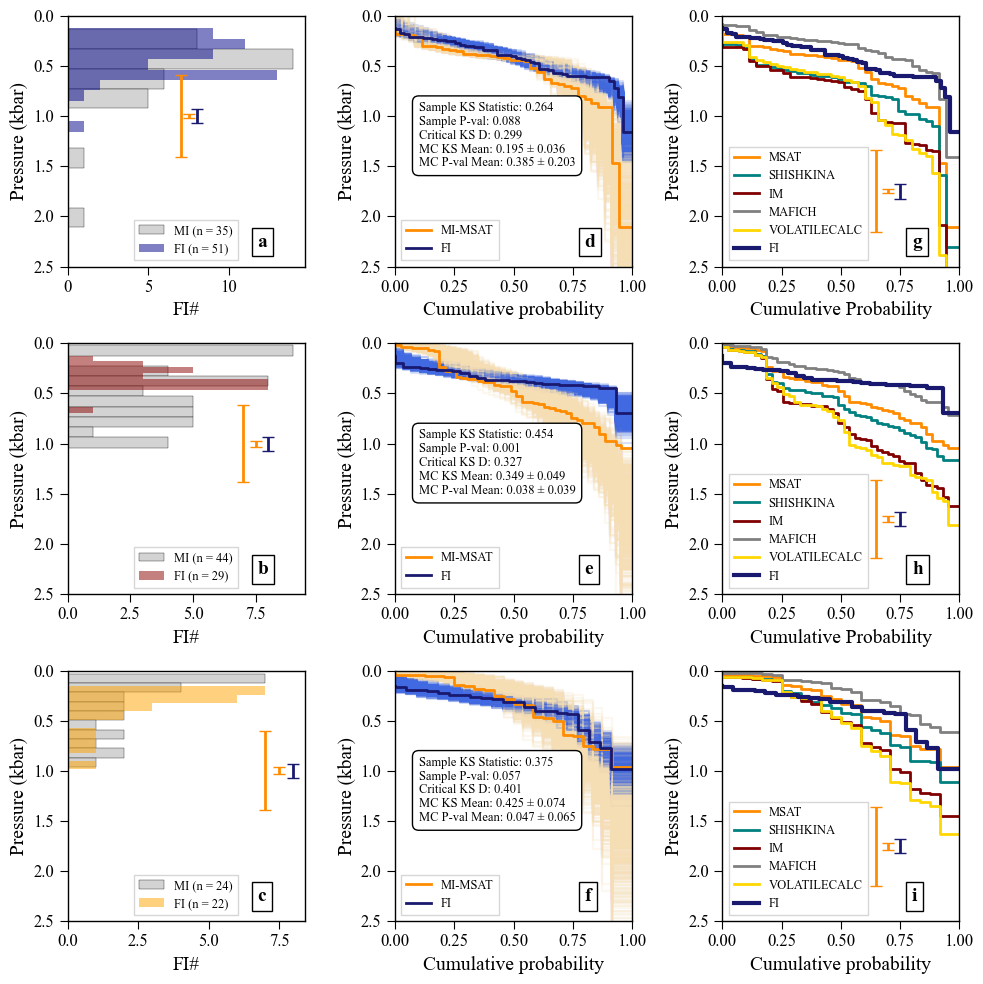

In [30]:

### Here we plot everything together
x_MI_lei='Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)' #'Depth_RL(km)
x_FI='Mean_MC_P_kbar'#'Mean_MC_D_km'


figure_mosaic="""
ADG
BEH
CFI
"""

fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10, 10))
val_lim=[2.5, 0]
val_lim_abc=[0,2.5]
proba_lim=[0,1]

fontsize=9
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')


## Plot MI
groups_mis=mis.groupby('Sample_ID')
orient='horizontal'
axes['A'].hist(mis[mis['Sample_ID'].str.contains('LL4')][x_MI_lei]/1000,bins=10,color='lightgrey',edgecolor='k',linewidth=0.25,label='MI (n = '+str(len(mis[mis['Sample_ID'].str.contains('LL4')]))+')', orientation=orient)
axes['B'].hist(mis[mis['Sample_ID'].str.contains('LL8')][x_MI_lei]/1000,bins=10,color='lightgrey',edgecolor='k',linewidth=0.25,label='MI (n = '+str(len(mis[mis['Sample_ID'].str.contains('LL8')]))+')', orientation=orient)
axes['C'].hist(mis[mis['Sample_ID'].str.contains('LL7')][x_MI_lei]/1000,bins=10,color='lightgrey',edgecolor='k',linewidth=0.25,label='MI (n = '+str(len(mis[mis['Sample_ID'].str.contains('LL7')]))+')', orientation=orient)


## Plot FI
axes['A'].hist(lei_fi_plotting_df[lei_fi_plotting_df['filename_4match'].str.contains('LL4')][x_FI],bins=10,color='darkblue',alpha=0.5, label='FI (n = '+str(len(lei_fi_plotting_df[lei_fi_plotting_df['filename_4match'].str.contains('LL4')]))+')', orientation=orient)
axes['B'].hist(lei_fi_plotting_df[lei_fi_plotting_df['filename_4match'].str.contains('LL8')][x_FI],bins=10,color='darkred',alpha=0.5, label='FI (n = '+str(len(lei_fi_plotting_df[lei_fi_plotting_df['filename_4match'].str.contains('LL8')]))+')', orientation=orient)
axes['C'].hist(lei_fi_plotting_df[lei_fi_plotting_df['filename_4match'].str.contains('LL7')][x_FI],bins=10,color='orange',alpha=0.5, label='FI (n = '+str(len(lei_fi_plotting_df[lei_fi_plotting_df['filename_4match'].str.contains('LL7')]))+')', orientation=orient)

axes['A'].legend(loc='lower center',fontsize=fontsize)
axes['B'].legend(loc='lower center',fontsize=fontsize)
axes['C'].legend(loc='lower center',fontsize=fontsize)

## Set limits
subplots_to_set_lim = ['A', 'B', 'C']  # Add more subplot labels as needed

for subplot_label in subplots_to_set_lim:
    if orient=='horizontal':
        axes[subplot_label].set_ylim(val_lim)
        axes[subplot_label].set_ylabel("Pressure (kbar)")
        axes[subplot_label].set_xlabel("FI#")
    else:
        axes[subplot_label].set_xlim(val_lim_abc)
        axes[subplot_label].set_xlabel("Pressure (kbar)")
        axes[subplot_label].set_ylabel("FI#")



##### PLOT D,E,F (CDF)#################################################################################################3



## LEI ##

# Plot data for ax 'G'
for key, value in data_and_properties.items():
    if key.endswith('_LL4'):  # Plot only sorted_lei_data on ax 'G'
        axes['G'].step(np.arange(value['data'].size + 1) / value['data'].size,
                       np.concatenate([value['data'], value['data'][-1:]]),
                       linewidth=value['properties']['linewidth'],
                       label=value['properties']['label'],
                       color=value['properties']['color'])

        # # Plot error bars (y-direction) for each step
        # axes['G'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
        #                 yerr=value['error_data'], fmt='none', ecolor=value['properties']['color'], alpha=0.5)

        # Plot error bars (y-direction) for each step
        if key.startswith('FI'):
            axes['G'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
                           yerr=0, fmt='none', ecolor='k', alpha=0.3)
            axes['G'].errorbar(0.75,1.75,yerr=np.mean(value['error_data']),capsize=4,fmt='',linestyle='',ecolor='midnightblue',elinewidth=2)
            axes['A'].errorbar(8,1,yerr=np.mean(value['error_data']),capsize=4,fmt='',linestyle='',ecolor='midnightblue',elinewidth=2)
            
        else:
            axes['G'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
                           yerr=0, fmt='none', ecolor='none', alpha=0.3)    
# Other plot settings for ax 'G'
axes['G'].set_xlabel('Cumulative Probability')
axes['G'].set_ylabel('Pressure (kbar)')
axes['G'].set_ylim(val_lim)  # Set y limits for pressure
axes['G'].set_xlim(proba_lim)  # Set xlimits for proba

# Plot data for ax 'H'
for key, value in data_and_properties.items():
    if key.endswith('_LL8'):  # Plot only sorted_lei_data on ax 'H'
        axes['H'].step(np.arange(value['data'].size + 1) / value['data'].size,
                       np.concatenate([value['data'], value['data'][-1:]]),
                       linewidth=value['properties']['linewidth'],
                       label=value['properties']['label'],
                       color=value['properties']['color'])
        if key.startswith('FI'):
            axes['H'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
                           yerr=0, fmt='none', ecolor='k', alpha=0.3)

            axes['H'].errorbar(0.75,1.75,yerr=np.mean(value['error_data']),capsize=4,fmt='',linestyle='',ecolor='midnightblue',elinewidth=2)
            axes['B'].errorbar(8,1,yerr=np.mean(value['error_data']),capsize=4,fmt='',linestyle='',ecolor='midnightblue',elinewidth=2)
        
        else:
            axes['H'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
                           yerr=0, fmt='none', ecolor='none', alpha=0.3) 

# Other plot settings for ax 'H'
axes['H'].set_xlabel('Cumulative Probability')
axes['H'].set_ylabel('Pressure (kbar)')
axes['H'].set_ylim(val_lim)  # Set y limits for pressure
axes['H'].set_xlim(proba_lim)  # Set xlimits for proba
# Plot data for ax 'I'
for key, value in data_and_properties.items():
    if key.endswith('_LL7'):  # Plot only sorted_lei_data on ax 'I'
        axes['I'].step(np.arange(value['data'].size + 1) / value['data'].size,
                       np.concatenate([value['data'], value['data'][-1:]]),
                       linewidth=value['properties']['linewidth'],
                       label=value['properties']['label'],
                       color=value['properties']['color'])

        # # Plotting with all errorbars
        # axes['I'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
        #                    yerr=value['error_data'], fmt='none', ecolor=value['properties']['color'], alpha=0.5)
        ## errorbars only on FI
        if key.startswith('FI'):
            axes['I'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
                           yerr=0, fmt='none', ecolor='k', alpha=0.3)
            axes['I'].errorbar(0.75,1.75,yerr=np.mean(value['error_data']),capsize=4,fmt='',linestyle='',ecolor='midnightblue',elinewidth=2)         
            axes['C'].errorbar(8,1,yerr=np.mean(value['error_data']),capsize=4,fmt='',linestyle='',ecolor='midnightblue',elinewidth=2)         
        else:
            axes['I'].errorbar(np.arange(value['data'].size) / value['data'].size, value['data'],
                           yerr=0, fmt='none', ecolor='none', alpha=0.3) 
# Other plot settings for ax 'I'
axes['I'].set_xlabel('Cumulative probability')
axes['I'].set_ylabel('Pressure (kbar)')
axes['I'].set_ylim(val_lim)  # Set y limits for pressure
axes['I'].set_xlim(proba_lim)  # Set xlimits for proba

axes['G'].legend(loc='best',fontsize=fontsize)
axes['H'].legend(loc='best',fontsize=fontsize)
axes['I'].legend(loc='best',fontsize=fontsize)

#### Plot G to I

xlim=proba_lim
ylim=val_lim
stats_box_pos=(0.1,0.4)#(0.4,0.4)

plot_distribution(axes['D'], results_dict['LL4']['msat'], fontsize=fontsize,legend_title=None,data1label='FI',data2label='MI-MSAT', xlabel='Pressure (kbar)',xlim=xlim,ylim=ylim,
                    flip_axes=True,stats_box_pos=stats_box_pos)
plot_distribution(axes['E'], results_dict['LL8']['msat'],fontsize=fontsize, legend_title=None,data1label='FI',data2label='MI-MSAT', xlabel='Pressure (kbar)',xlim=xlim,ylim=ylim,
                    flip_axes=True,stats_box_pos=stats_box_pos)
plot_distribution(axes['F'], results_dict['LL7']['msat'],fontsize=fontsize, legend_title=None,data1label='FI',data2label='MI-MSAT', xlabel='Pressure (kbar)',xlim=xlim,ylim=ylim,
                    flip_axes=True,stats_box_pos=stats_box_pos)

#### PLOT FLOATING AVERAGE ERROR BARS FOR MI AND FI

MI_wDiad=mis_wMafiCH[~(mis_wMafiCH['CO2 in bubble (ppm)']<0)][['Sample_ID','Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']]
MI_noDiad=mis_wMafiCH[~(mis_wMafiCH['CO2 in bubble (ppm)']>=0)][['Sample_ID','Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']]
MI_wDiad=mis_wMafiCH[(mis_wMafiCH['CO2 in bubble (ppm)']>=0)][['Sample_ID','Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)','Magmasat_err4cdf']]

axes['G'].errorbar(0.65,1.75,yerr=np.mean(MI_wDiad[MI_wDiad['Sample_ID'].str.contains('LL4')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['H'].errorbar(0.65,1.75,yerr=np.mean(MI_wDiad[MI_wDiad['Sample_ID'].str.contains('LL8')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['I'].errorbar(0.65,1.75,yerr=np.mean(MI_wDiad[MI_wDiad['Sample_ID'].str.contains('LL7')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)

axes['G'].errorbar(0.7,1.75,yerr=np.mean(MI_noDiad[MI_noDiad['Sample_ID'].str.contains('LL4')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['H'].errorbar(0.7,1.75,yerr=np.mean(MI_noDiad[MI_noDiad['Sample_ID'].str.contains('LL8')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['I'].errorbar(0.7,1.75,yerr=np.mean(MI_noDiad[MI_noDiad['Sample_ID'].str.contains('LL7')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)

axes['A'].errorbar(7,1,yerr=np.mean(MI_wDiad[MI_wDiad['Sample_ID'].str.contains('LL4')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['B'].errorbar(7,1,yerr=np.mean(MI_wDiad[MI_wDiad['Sample_ID'].str.contains('LL8')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['C'].errorbar(7,1,yerr=np.mean(MI_wDiad[MI_wDiad['Sample_ID'].str.contains('LL7')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)

axes['A'].errorbar(7.5,1,yerr=np.mean(MI_noDiad[MI_noDiad['Sample_ID'].str.contains('LL4')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['B'].errorbar(7.5,1,yerr=np.mean(MI_noDiad[MI_noDiad['Sample_ID'].str.contains('LL8')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)
axes['C'].errorbar(7.5,1,yerr=np.mean(MI_noDiad[MI_noDiad['Sample_ID'].str.contains('LL7')]['Magmasat_err4cdf']/1000),capsize=4,fmt='',linestyle='',ecolor='darkorange',elinewidth=2)


#### PLOT SETTINGS ######################################################
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F','G','H','I']
pos_a2h=(0.8,0.08)
label_positions = [pos_a2h, pos_a2h, pos_a2h, pos_a2h, 
                   pos_a2h, pos_a2h, pos_a2h, pos_a2h, pos_a2h]

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)
### SAVE FIG##############################################################

plt.tight_layout()

fig.savefig(figpath+'/'+"Fig3_hist+cdf+KSMC.png")
fig.savefig(figpath+'/'+"Fig3_hist+cdf+KSMC.pdf")


In [910]:
def calculate_density(Delta):
    # First formula
    density1 = 0.01917 * (Delta - 100)**3 + 0.1984 * (Delta - 100)**2 + 0.2410 * (Delta - 100) + 0.341
    
    # Second formula
    density2 = -0.00111808 * (Delta - 100)**8 + 0.04498451 * (Delta - 100)**7 - 0.7727143 * (Delta - 100)**6 + \
               7.4128146 * (Delta - 100)**5 - 43.468301 * (Delta - 100)**4 + 159.54433 * (Delta - 100)**3 - \
               357.7651 * (Delta - 100)**2 + 448.2404 * (Delta - 100) - 240.461
    
    return density1, density2

# Example usage:
delta_value = 107  # Replace with your desired Delta value
density1, density2 = calculate_density(delta_value)
print(f"Density 1: {density1}")
print(f"Density 2: {density2}")


Density 1: 18.324910000000003
Density 2: 2.3263073499990696


In [911]:
pf.calculate_P_for_rho_T(2.32,20+273.15)['P_kbar']

0    85.390038
Name: P_kbar, dtype: float64

In [912]:
pf.convert_pressure_to_depth(P_kbar=pf.calculate_P_for_rho_T(2.32,20+273.15)['P_kbar'], crust_dens_kgm3=2800)

0    310.87097
Name: P_kbar, dtype: float64

# FIGURE 4 - Fo vs pressure + stretching models

#### First, let's calculate SO2 mol % for the color of the plot 

In [913]:
### This one calculates the σ cross section according to wavelength, you must provide:
### 1) the peak shift of the species, 2) temp and 3) Σ (wavelength-independent relative Raman scattering cross-sections). 

import math

def calculate_sigma(wavelength, vi_dict, T_K):
    c = 2.998 * 10**10  # cm/s light speed
    h = 6.626 * 10**-27  # erg.s Planck constant
    k = 1.381 * 10**-16  # erg/K Boltzmann's constant

    v0 = 1 / (wavelength * 10**-7)
    
    sigma_results = {}
    for name, vi_info in vi_dict.items():
        vi = vi_info["Peak_shift_cm-1"]
        BigSigma = vi_info["Σ"]
        
        result = BigSigma / (((v0 - vi)**-4 / (v0 - 2331)**-4) * (1 - math.exp(-h * c * vi / (k * T_K))))
        sigma_results[name] = round(result, 2)
    
    return sigma_results

# Calculate for our Raman
wavelength = 532.067
T_K = 20 + 273.15

component_dict = {
    "SO2": {"Peak_shift_cm-1": 1151, "Σ": 4.03},
    "CO2_v1": {"Peak_shift_cm-1": 1285, "Σ": 0.80},
    "CO2_2v2": {"Peak_shift_cm-1": 1388, "Σ": 1.23}
}

sigma_results = calculate_sigma(wavelength=wavelength, vi_dict=component_dict, T_K=T_K)

print(sigma_results)

{'SO2': 5.33, 'CO2_v1': 1.03, 'CO2_2v2': 1.54}


In [914]:
def calculate_mole_percent(components):
    def partial_molec_contribution_single(A, sigma, squiggle):
        return A / (sigma * squiggle)

    def partial_molec_contribution_double(A1, sigma1, A2, sigma2, squiggle):
        return (A1 + A2) / ((sigma1 + sigma2) * squiggle)

    total_partials = 0
    partials = []

    for component in components:
        if component['name'] == 'CO2':
            partial = partial_molec_contribution_double(component['peak_area_1'], component['cross_section_1'],
                                                       component['peak_area_2'], component['cross_section_2'],
                                                       component['efficiency'])
        else:
            partial = partial_molec_contribution_single(component['peak_area'], component['cross_section'],
                                                        component['efficiency'])

        partials.append(partial)
        total_partials += partial

    mole_percentages = [round((partial / total_partials) * 100, 1) for partial in partials]
    
    mole_percent_dict = {component['name']: mole_percent for component, mole_percent in zip(components, mole_percentages)}
    mole_percent_dict['Mole_Percent_Sum'] = sum(mole_percentages)
    
    return mole_percent_dict

## This is my data for KIL
components = [
    {'name': 'SO2', 'peak_area': lei_fi_plotting_df['Peak_Area_SO2'], 'cross_section': sigma_results['SO2'], 'efficiency': 1},
    {'name': 'CO2', 'peak_area_1':lei_fi_plotting_df['Diad2_Voigt_Area'], 'cross_section_1': sigma_results['CO2_2v2'], 
    'peak_area_2': lei_fi_plotting_df['Diad1_Voigt_Area'], 'cross_section_2': sigma_results['CO2_v1'], 'efficiency': 0.5}
]

mole_percent_dict = calculate_mole_percent(components)

lei_fi_plotting_df['SO2_mole_percent']=mole_percent_dict['SO2'].copy()


#### Next, let's calculate the stretching models

In [915]:
## These are functions to find the pressure corresponding to a specific depth using a DiadFit models 

from scipy.optimize import newton

def pressure_equation(P_kbar, target_depth, model):
    current_depth = pf.convert_pressure_to_depth(P_kbar=P_kbar, model=model)[0]
    return current_depth - target_depth

def find_P_for_kmdepth(target_depth, model, tolerance=0.1):
    initial_pressure = 0  
    pressure = newton(pressure_equation, initial_pressure, args=(target_depth, model), tol=tolerance)
    return pressure

## Example: find the pressure at 5 km depth

target_depth = 5  
model = 'ryan_lerner'
tolerance = 0.001  # how close you want to be

# run it
pressure = find_P_for_kmdepth(target_depth, model, tolerance)
# print the result
print("Pressure:", pressure)
print("Depth:", pf.convert_pressure_to_depth(P_kbar=pressure, model=model)[0])


Pressure: 1.1834708907085945
Depth: 4.999999838702872


In [916]:
## These are stretching model functions

import DiadFit as pf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
pf.__version__

## Functions that do the work
def ideal_calc_rho_for_r_P_T(*,P_MPa,T,r):
    P=P_MPa*10**6 # convert MPa to Pa
    M=44.01/1000 #kg/mol
    V=4/3*math.pi*r**3 #m3
    R=8.314 #J.mol/K J: kg·m²/s² 
    m=P*V*M/(R*T) #CO2 mass in kg
    rho=(m/V)/1000 # rho in g/cm3
    return rho, m/1000

def ideal_calc_P_for_V_rho_T(*,co2_mass_g,T,r):
    M=44.01/1000 #kg/mol
    m=co2_mass_g*1000
    V=4/3*math.pi*r**3 #m3
    R=8.314 #J.mol/K J: kg·m²/s² 
    P=m*R*T/(M*V) #P in Pa
    P_MPa=P/(10**6) #P in MPa
    rho=(m/V)/1000 #rho in g/cm3
    return rho,P_MPa


def calculate_DPdt(ascent_rate_ms,D_initial=30,D_final=0,D_step=100):
    D = pd.Series(list(np.linspace(D_initial, D_final, D_step)))  # km

    h = D * 10 ** 3  # m
    rho = 3058  # kg/m3
    g = 9.81  # m/s2
    P = rho * g * h * 10 ** -6  # MPa lithostatic pressure
    Pexternal_steps = list(P)  # These are the pressure steps

    # Time steps of the ascent
    ascent_rate = ascent_rate_ms / 1000  # km/s
    D_change = abs(D.diff())
    time_series = D_change / ascent_rate  # calculates the time in between each step based on ascent rate
    dt = time_series.max()  # this sets the time step for the integration part
    
    return D, Pexternal_steps, dt

def calculate_initial_V_CO2rho_mass(*,EOS='SW96',P,T,r):
    ### This function calculates CO2 mass as a function of P,T, and FI radius(Volume), r has to be in cm,
    ### V is output in cm3, rho in g/cm3 and mass in g
    ###
    V=4/3*math.pi*r**3 #cm3, Volume of the FI, assume sphere
    P_kbar=P/100 #Internal pressure of the FI
    CO2_dens=pf.calculate_rho_for_P_T(EOS=EOS,P_kbar=P_kbar,T_K=T)[0] #g/cm3, CO2 density, calc by Span&Wagner(96)
    CO2_mass=CO2_dens*V # this is our CO2 mass in the FI
    return V, CO2_dens, CO2_mass

def calculate_step_P_for_m_r(*,EOS='SW96',m,T,r):
    ### This function internal pressure and volume of the inclusion as a function of T, FI radius and CO2 mass, r has to be in cm,
    ### V is output in cm3, rho in g/cm3 and mass in g.
    ###
    V=4/3*math.pi*r**3 #cm3, Volume of the FI, assume sphere
    CO2_dens=m/V
    try:
        P_new=pf.calculate_P_for_rho_T(EOS=EOS,CO2_dens_gcm3=CO2_dens, T_K=T)['P_MPa'][0] #g/cm3, CO2 density, calc by Span&Wagner(96)
        return V, CO2_dens, P_new
    except ValueError:
        return V,CO2_dens,np.nan


class power_creep_law_constants:
    def __init__(self):
        self.A = 3.9*10**3 #7.0 * 10**4
        self.n = 3.6 #3
        self.Q = 523000 # 520 Activation energy for dislocation motions in J/mol
        self.IgasR= 8.314  # Gas constant in J/(mol*K)

# # Helper function to calculate dR/dt
def calculate_dR_dt(*,R, b, T,  Pinternal, Pexternal):
    pl_Cs = power_creep_law_constants()
    if Pinternal<Pexternal==True:
        S=-1
    else:
        S=1
    try:
        dR_dt = 2 * (S * pl_Cs.A * math.exp(-pl_Cs.Q / (pl_Cs.IgasR * T))) * (((R * b)**3) / (((b**(3 / pl_Cs.n)) - (R**(3 / pl_Cs.n))))**pl_Cs.n) * (((3 * abs(Pinternal - Pexternal)) / (2 * pl_Cs.n))**pl_Cs.n) / R**2
        return dR_dt

    except FloatingPointError:
        return np.nan

# Euler method for iterative numerical solving (range of Pext)
def findR_Pi_rho_4Pestep_euler(*,R0, b, T,D,Pexternal_steps,dt,EOS,plotfig=True,display_df=True,Pinternal=None):
    if Pinternal is None:
        Pinternal = Pexternal_steps[0]
    _,CO2_dens_initial,CO2_mass_initial=calculate_initial_V_CO2rho_mass(EOS=EOS,P=Pinternal,T=T,r=R0*10**2)
    R_values = [R0]  # List to store R values at different time points
    Pinternal_list=[Pinternal]
    CO2_dens_list=[CO2_dens_initial]
    dR_dt_list=[]
    results=pd.DataFrame(columns={'Pexternal(MPa)','Pinternal(MPa)',
                                  'Depth(km)','Fi_radius(\u03BCm)',
                                  'CO2_dens_gcm3','dR/dt(m/s)' })
    for i in range(len(Pexternal_steps)):
        Pexternal = Pexternal_steps[i]
        dR_dt = calculate_dR_dt(R=R_values[-1], b=b,Pinternal=Pinternal, Pexternal=Pexternal, T=T)
        R_new = R_values[-1] + dR_dt * dt
        _,CO2_dens_new,P_new=calculate_step_P_for_m_r(EOS=EOS,m=CO2_mass_initial,T=T,r=R_new*10**2)
        Pinternal=P_new
        dR_dt_list.append(dR_dt)
        R_values.append(R_new)
        Pinternal_list.append(Pinternal)
        CO2_dens_list.append(CO2_dens_new)
    
    results['Pexternal(MPa)']=Pexternal_steps
    results['Pinternal(MPa)']=Pinternal_list[1:]
    results['Depth(km)']=D
    results['Fi_radius(\u03BCm)']=[num * 10**6 for num in R_values][1:]
    results['CO2_dens_gcm3']=CO2_dens_list[1:]
    results['dR/dt(m/s)']=dR_dt_list
    results['\u0394R/R0']=(results['Fi_radius(μm)']-results['Fi_radius(μm)'][0])/results['Fi_radius(μm)'][0]

    if display_df==True:
        display(results.head())
    if plotfig==True:
        fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
        ax0.plot(-results['Depth(km)'],results['ΔR/R0'],marker='s')
        ax0.set_xlabel("Depth")
        ax0.set_ylabel("DeltaR/R0")

        ax1.plot(-results['Depth(km)'],results['CO2_dens_gcm3'],marker='s')
        ax1.set_xlabel("Depth")
        ax1.set_ylabel("CO2_density_gmL")

    return results, fig if 'fig' in locals() else results

def findR_Pi_rho_fixedPe_euler(*,R,b=None,T,EOS_method=None,EOS='SW96',Pinternal,Pexternal,totaltime,steps):

    dt=totaltime/steps

    if b is None:
        b=R*1000
    
    if EOS_method=='ideal':
        CO2_dens_initial,CO2_mass_initial=ideal_calc_rho_for_r_P_T(P_MPa=Pinternal,T=T,r=R*10**2)
    else:
        _,CO2_dens_initial,CO2_mass_initial=calculate_initial_V_CO2rho_mass(EOS=EOS,P=Pinternal,T=T,r=R*10**2)

    results = pd.DataFrame([{'Time(s)': 0,
                             'Step':0,
                             'dt(s)':0,
                            'Pexternal(MPa)': Pexternal,
                            'Pinternal(MPa)': Pinternal,
                            'dR/dt(m/s)': calculate_dR_dt(R=R, b=b, Pinternal=Pinternal, Pexternal=Pexternal, T=T),
                            'Fi_radius(μm)': R*10**6,
                            'b (distance to xtal rim -μm)':b*10**6,
                            '\u0394R/R0 (fractional change in radius)':0,
                            'CO2_dens_gcm3': CO2_dens_initial}], index=range(steps))

    for step in range(1,steps):
        dR_dt = calculate_dR_dt(R=R, b=b,Pinternal=Pinternal, Pexternal=Pexternal, T=T)
        R_new= R + dR_dt*dt
        if EOS_method=='ideal':
            CO2_dens_new,P_new=ideal_calc_P_for_V_rho_T(co2_mass_g=CO2_mass_initial,T=T,r=R_new*10**2)
        else:
            _,CO2_dens_new,P_new=calculate_step_P_for_m_r(EOS=EOS,m=CO2_mass_initial,T=T,r=R_new*10**2)
        R=R_new
        #b=1000*R
        Pinternal=P_new

        results.loc[step,'Time(s)']=step*dt
        results.loc[step,'Step']=step
        results.loc[step,'dt(s)']=dt
        results.loc[step,'Pexternal(MPa)']=Pexternal
        results.loc[step,'Pinternal(MPa)']=Pinternal
        results.loc[step,'dR/dt(m/s)']=dR_dt
        results.loc[step,'Fi_radius(μm)']=R*10**6
        results.loc[step,'\u0394R/R0 (fractional change in radius)']=(R*10**6-results.loc[0,'Fi_radius(μm)'])/results.loc[0,'Fi_radius(μm)']
        results.loc[step,'b (distance to xtal rim -μm)']=b*10**6
        results.loc[step,'CO2_dens_gcm3']=CO2_dens_new
    return results


def findR_Pi_rho_fixedPe(*,R,b=None,T,EOS_method=None,EOS='SW96',Pinternal,Pexternal,totaltime,steps,int_method='Euler'):

    dt=totaltime/steps

    if b is None:
        b=R*1000
    
    if EOS_method=='ideal':
        CO2_dens_initial,CO2_mass_initial=ideal_calc_rho_for_r_P_T(P_MPa=Pinternal,T=T,r=R*10**2)
    else:
        _,CO2_dens_initial,CO2_mass_initial=calculate_initial_V_CO2rho_mass(EOS=EOS,P=Pinternal,T=T,r=R*10**2)

    results = pd.DataFrame([{'Time(s)': 0,
                             'Step':0,
                             'dt(s)':0,
                            'Pexternal(MPa)': Pexternal,
                            'Pinternal(MPa)': Pinternal,
                            'dR/dt(m/s)': calculate_dR_dt(R=R, b=b, Pinternal=Pinternal, Pexternal=Pexternal, T=T),
                            'Fi_radius(μm)': R*10**6,
                            'b (distance to xtal rim -μm)':b*10**6,
                            '\u0394R/R0 (fractional change in radius)':0,
                            'CO2_dens_gcm3': CO2_dens_initial}], index=range(steps))

    if int_method=='Euler':
        for step in range(1,steps):
            dR_dt = calculate_dR_dt(R=R, b=b,Pinternal=Pinternal, Pexternal=Pexternal, T=T)
            R_new= R + dR_dt*dt
            if EOS_method=='ideal':
                CO2_dens_new,P_new=ideal_calc_P_for_V_rho_T(co2_mass_g=CO2_mass_initial,T=T,r=R_new*10**2)
            else:
                _,CO2_dens_new,P_new=calculate_step_P_for_m_r(EOS=EOS,m=CO2_mass_initial,T=T,r=R_new*10**2)
            R=R_new
            b=1000*R
            Pinternal=P_new
            
            results.loc[step,'Time(s)']=step*dt
            results.loc[step,'Step']=step
            results.loc[step,'dt(s)']=dt
            results.loc[step,'Pexternal(MPa)']=Pexternal
            results.loc[step,'Pinternal(MPa)']=Pinternal
            results.loc[step,'dR/dt(m/s)']=dR_dt
            results.loc[step,'Fi_radius(μm)']=R*10**6
            results.loc[step,'\u0394R/R0 (fractional change in radius)']=(R*10**6-results.loc[0,'Fi_radius(μm)'])/results.loc[0,'Fi_radius(μm)']
            results.loc[step,'b (distance to xtal rim -μm)']=b*10**6
            results.loc[step,'CO2_dens_gcm3']=CO2_dens_new

    if int_method=='RK4':

        for step in range(1, steps):
            # Calculate k1
            dR_dt = calculate_dR_dt(R=R, b=b, Pinternal=Pinternal, Pexternal=Pexternal, T=T)
            k1 = dR_dt * dt

            # Calculate k2
            R_temp = R + 0.5 * k1
            if EOS_method == 'ideal':
                CO2_dens_temp, P_temp = ideal_calc_P_for_V_rho_T(co2_mass_g=CO2_mass_initial, T=T, r=R_temp * 10**2)
            else:
                _, CO2_dens_temp, P_temp = calculate_step_P_for_m_r(EOS=EOS, m=CO2_mass_initial, T=T, r=R_temp * 10**2)
            k2 = (P_temp - Pinternal) * dt

            # Calculate k3
            R_temp = R + 0.5 * k2
            if EOS_method == 'ideal':
                CO2_dens_temp, P_temp = ideal_calc_P_for_V_rho_T(co2_mass_g=CO2_mass_initial, T=T, r=R_temp * 10**2)
            else:
                _, CO2_dens_temp, P_temp = calculate_step_P_for_m_r(EOS=EOS, m=CO2_mass_initial, T=T, r=R_temp * 10**2)
            k3 = (P_temp - Pinternal) * dt

            # Calculate k4
            R_temp = R + k3
            if EOS_method == 'ideal':
                CO2_dens_temp, P_temp = ideal_calc_P_for_V_rho_T(co2_mass_g=CO2_mass_initial, T=T, r=R_temp * 10**2)
            else:
                _, CO2_dens_temp, P_temp = calculate_step_P_for_m_r(EOS=EOS, m=CO2_mass_initial, T=T, r=R_temp * 10**2)
            k4 = (P_temp - Pinternal) * dt

            # Update R and Pinternal using the weighted average of the four k values
            R += (k1 + 2 * k2 + 2 * k3 + k4) / 6
            Pinternal = P_temp
            b=1000*R
            results.loc[step,'Time(s)']=step*dt
            results.loc[step,'Step']=step
            results.loc[step,'dt(s)']=dt
            results.loc[step,'Pexternal(MPa)']=Pexternal
            results.loc[step,'Pinternal(MPa)']=Pinternal
            results.loc[step,'dR/dt(m/s)']=dR_dt
            results.loc[step,'Fi_radius(μm)']=R*10**6
            results.loc[step,'\u0394R/R0 (fractional change in radius)']=(R*10**6-results.loc[0,'Fi_radius(μm)'])/results.loc[0,'Fi_radius(μm)']
            results.loc[step,'b (distance to xtal rim -μm)']=b*10**6
            results.loc[step,'CO2_dens_gcm3']=CO2_dens_temp

    return results

def solve_runge_kutta(*, R, b=None, T, Pinternal, Pexternal, totaltime, steps=1000, EOS_method='ideal', order=4):
    dt = totaltime / steps

    if b is None:
        b = R * 1000

    if EOS_method == 'ideal':
        CO2_dens_initial, CO2_mass_initial = ideal_calc_rho_for_r_P_T(P_MPa=Pinternal, T=T, r=R * 10 ** 2)
    else:
        _, CO2_dens_initial, CO2_mass_initial = calculate_initial_V_CO2rho_mass(EOS=EOS, P=Pinternal, T=T, r=R * 10 ** 2)

    results = pd.DataFrame(columns=['Time(s)', 'Step', 'dt(s)', 'Pexternal(MPa)', 'Pinternal(MPa)', 'dR/dt(m/s)',
                                    'Fi_radius(μm)', 'b (distance to xtal rim -μm)',
                                    'ΔR/R0 (fractional change in radius)', 'CO2_dens_gcm3'])

    results.loc[0] = [0, 0, 0, Pexternal, Pinternal, calculate_dR_dt(R=R, b=b, Pinternal=Pinternal, Pexternal=Pexternal, T=T),
                      R * 10 ** 6, b * 10 ** 6, 0, CO2_dens_initial]

    for step in range(steps):
        if order == 2:
            k1 = dt * calculate_dR_dt(R=R, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal)
            k2 = dt * calculate_dR_dt(R=R + 0.5 * k1, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal)

            dR_dt = ((k1 + k2) / 2) / dt
            R += (k1 + k2) / 2
        elif order == 4:
            k1 = dt * calculate_dR_dt(R=R, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal)
            k2 = dt * calculate_dR_dt(R=R + 0.5 * k1, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal)
            k3 = dt * calculate_dR_dt(R=R + 0.5 * k2, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal)
            k4 = dt * calculate_dR_dt(R=R + k3, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal)

            dR_dt = ((k1 + 2 * k2 + 2 * k3 + k4) / 6) / dt
            R += (k1 + 2 * k2 + 2 * k3 + k4) / 6

        if EOS_method == 'ideal':
            CO2_dens_temp, P_temp = ideal_calc_P_for_V_rho_T(co2_mass_g=CO2_mass_initial, T=T, r=R * 10 ** 2)
        else:
            _, CO2_dens_temp, P_temp = calculate_step_P_for_m_r(EOS=EOS, m=CO2_mass_initial, T=T, r=R * 10 ** 2)

        Pinternal = P_temp
        b = R * 1000
        results.loc[step] = [step * dt, step, dt, Pexternal, Pinternal, dR_dt, R * 10 ** 6,
                             (R * 10 ** 6 - results.loc[0, 'Fi_radius(μm)']) / results.loc[0, 'Fi_radius(μm)'],
                             b * 10 ** 6, CO2_dens_temp]
    return results


In [932]:
###### Let's model an FI (5 um) coming from South Caldera reservoir(4km @ 1300 C) and stalling at Halemaumau reservoir (1km @ 1150 C) ##############

####### Establish reservoir PTX conditions

## SC reservoir conditions
SC_depth = 4 # depth in km
melt_MgO=13 #melt MgO in wt%
SC_temp=round(21.2*melt_MgO+1017,-1)  # T in C
# find pressure @ SC
model = 'ryan_lerner'
tolerance = 0.001
SC_pressure = find_P_for_kmdepth(SC_depth, model, tolerance)

## HM reservoir conditions
HM_depth = 1 # depth in km
melt_MgO=6.5 #melt MgO in wt%
HM_temp=round(21.2*melt_MgO+1017,-1)  # T in C
# find pressure @ HM
model = 'ryan_lerner'
tolerance = 0.001
HM_pressure = find_P_for_kmdepth(HM_depth, model, tolerance)


####### Let's start our model

### First let's calculate the CO2 density of our 5um FI trapped at SC
fi_rho_initial_gcm3=pf.calculate_rho_for_P_T(EOS='SW96',P_kbar=SC_pressure,T_K=SC_temp+273.15)[0]

## Now we move the FI to HM reservoir (1km), Pinternal will change bc T=1150, we calculate Pinternal
fi_Pi_HM_initial_MPa=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=fi_rho_initial_gcm3,T_K=HM_temp+273.15)['P_MPa'][0]

## Now let's leave it at HM for 2 years.
# set initial parameters 
years=2
days=years * 365.25

T = HM_temp + 273.15
R0 = 1 * 10 ** -6 # FI radius in m
R0_2=20 * 10 ** -6


def calc_multiplier(R0, dist2defect_um):
    multiplier = (dist2defect_um) / (R0 * 10**6)
    return multiplier

dist2defect_list=[50,100,250,500]

b_list_R0=[calc_multiplier(R0, dist)*R0 for dist in dist2defect_list]
b_list_R0_2=[calc_multiplier(R0_2, dist)*R0_2 for dist in dist2defect_list]

b0=b_list_R0[0]
b1 = b_list_R0[1]
b2=b_list_R0[2]
b3=b_list_R0[3]

b4=b_list_R0[0]
b5 = b_list_R0[1]
b6=b_list_R0[2]
b7=b_list_R0[3]

Pinternal=fi_Pi_HM_initial_MPa
Pexternal=HM_pressure*100 ##Pressure in MPa for this model

steps=1000 #number of steps

EOS='SW96'
day_in_sec=(24*60*60)
totaltime_in_s=days*day_in_sec


def calculate_results(R_values, b_values, T, EOS, Pinternal, Pexternal, totaltime_in_s, steps, T4endcalc_PD):
    results_dict = {}

    for R in R_values:
        R_name = [name for name, value in globals().items() if value is R][0]
        R_key = f'{R_name}'
        results_dict[R_key] = {}

        for idx_b, b in enumerate(b_values):
            b_key = f'b{idx_b}'
            results = findR_Pi_rho_fixedPe_euler(R=R, b=b, T=T, EOS=EOS, Pinternal=Pinternal, Pexternal=Pexternal, totaltime=totaltime_in_s, steps=steps)
            
            results['Calculated depths (km)_HMT'] = pf.convert_pressure_to_depth(P_kbar=results['Pinternal(MPa)'] / 100, model='ryan_lerner')
            results['Calculated P from rho_SCTemp (MPa)'] = pf.calculate_P_for_rho_T(EOS='SW96', CO2_dens_gcm3=results['CO2_dens_gcm3'], T_K=T4endcalc_PD + 273.15)['P_MPa']
            results['Calculated depths (km)'] = pf.convert_pressure_to_depth(P_kbar=results['Calculated P from rho_SCTemp (MPa)'] / 100, model='ryan_lerner')
            
            results_dict[R_key][b_key] = results

    return results_dict


# Call the function with appropriate arguments
R_values = [R0, R0_2]  # Define R values
b_values = [b0, b1, b2, b3, b4, b5, b6, b7]

b_list= [b0, b1, b2, b3, b4, b5, b6, b7]

results_dict = calculate_results(R_values, b_values, T, EOS, Pinternal, Pexternal, totaltime_in_s, steps, SC_temp)


In [933]:
results_dict['R0']['b0'].head()

Time(s)  Step    dt(s)  Pexternal(MPa)  Pinternal(MPa)    dR/dt(m/s)  \
0       0.0     0      0.0       21.914288       83.801243  6.880931e-17   
1   63115.2     1  63115.2       21.914288       83.799901  6.880931e-17   
2  126230.4     2  63115.2       21.914288       83.798559  6.880427e-17   
3  189345.6     3  63115.2       21.914288       83.797217  6.879924e-17   
4  252460.8     4  63115.2       21.914288       83.795875  6.879420e-17   

   Fi_radius(μm)  b (distance to xtal rim -μm)  \
0       1.000000                          50.0   
1       1.000004                          50.0   
2       1.000009                          50.0   
3       1.000013                          50.0   
4       1.000017                          50.0   

   ΔR/R0 (fractional change in radius)  CO2_dens_gcm3  \
0                             0.000000       0.257382   
1                             0.000004       0.257379   
2                             0.000009       0.257375   
3                             0.000013       0.257372   
4                             0.000017       0.257369   

   Calculated depths (km)_HMT  Calculated P from rho_SCTemp (MPa)  \
0                    3.633866                           92.895886   
1                    3.633811                           92.894391   
2                    3.633757                           92.892896   
3                    3.633702                           92.891401   
4                    3.633648                           92.889906   

   Calculated depths (km)  
0                4.000000  
1                3.999940  
2                3.999880  
3                3.999821  
4                3.999761

In [934]:
###### Let's model an FI (5 um) coming from South Caldera reservoir(4km @ 1300 C) and erupting to surface (0km @ 1150 C) ##############

####### Establish reservoir PTX conditions

## SC reservoir conditions
SC_depth = 4 # depth in km
melt_MgO=13 #melt MgO in wt%
SC_temp=round(21.2*melt_MgO+1017,-1)  # T in C
# find pressure @ SC
model = 'ryan_lerner'
tolerance = 0.001
SC_pressure = find_P_for_kmdepth(SC_depth, model, tolerance)

## surface conditions
HM_depth = 0 # depth in km
melt_MgO=6.5 #melt MgO in wt%
HM_temp=round(21.2*melt_MgO+1017,-1)  # T in C
# find pressure @ HM
model = 'ryan_lerner'
tolerance = 0.001
HM_pressure = find_P_for_kmdepth(HM_depth, model, tolerance)


####### Let's start our model

### First let's calculate the CO2 density of our 5um FI trapped at SC
fi_rho_initial_gcm3=pf.calculate_rho_for_P_T(EOS='SW96',P_kbar=SC_pressure,T_K=SC_temp+273.15)[0]

## Now we move the FI to HM reservoir (1km), Pinternal will change bc T=1150, we calculate Pinternal
fi_Pi_HM_initial_MPa=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=fi_rho_initial_gcm3,T_K=HM_temp+273.15)['P_MPa'][0]

## Now let's leave it on the surface for 7 days
# set initial parameters 

days=7

T = HM_temp + 273.15
R0 = 1 * 10 ** -6 # FI radius in m
R0_2=20 * 10 ** -6


def calc_multiplier(R0, dist2defect_um):
    multiplier = (dist2defect_um) / (R0 * 10**6)
    return multiplier

dist2defect_list=[50,100,250,500]

b_list_R0=[calc_multiplier(R0, dist)*R0 for dist in dist2defect_list]
b_list_R0_2=[calc_multiplier(R0_2, dist)*R0_2 for dist in dist2defect_list]

b0=b_list_R0[0]
b1 = b_list_R0[1]
b2=b_list_R0[2]
b3=b_list_R0[3]

b4=b_list_R0[0]
b5 = b_list_R0[1]
b6=b_list_R0[2]
b7=b_list_R0[3]

Pinternal=fi_Pi_HM_initial_MPa
Pexternal=HM_pressure*100 ##Pressure in MPa for this model

steps=1000 #number of steps

EOS='SW96'
day_in_sec=(24*60*60)
totaltime_in_s=days*day_in_sec

# Call the function with appropriate arguments
R_values = [R0, R0_2]  # Define R values
b_values = [b0, b1, b2, b3, b4, b5, b6, b7]

b_list= [b0, b1, b2, b3, b4, b5, b6, b7]

results_dict_surface = calculate_results(R_values, b_values, T, EOS, Pinternal, Pexternal, totaltime_in_s, steps, SC_temp)

### NOW LETS PLOT FIG 4!!

In [935]:
### Things needed for A, B and C subplots

## This is function to create color scaling from input column
def norm_colors(color_values,series4max,series4min):
    norm = (color_values - np.nanmin(series4min)) / (np.nanmax(series4max) - np.nanmin(series4min))
    return norm

Fo_var='Fo content (molar)'
plotting_df = lei_fi_plotting_df.drop(lei_fi_plotting_df[Fo_var][lei_fi_plotting_df[Fo_var].isna()].index)

fi_data_col='Mean_MC_P_kbar'
fi_err_col='std_dev_MC_P_kbar'
mi_data_col='Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'
mi_err_col='Magmasat_err4cdf'
Fo_var='Fo content (molar)'
xso2co2_col='SO2_mole_percent'


sample_dict = {
    'LL4': {'MI': mis_wMafiCH[(mis_wMafiCH['Sample_ID'].str.contains('LL4'))&~(mis_wMafiCH[mi_data_col]>1.4*1000)], 'FI': plotting_df[plotting_df['Sample_ID'].str.contains('LL4')]},
    'LL7': {'MI': mis_wMafiCH[mis_wMafiCH['Sample_ID'].str.contains('LL7')], 'FI': plotting_df[plotting_df['Sample_ID'].str.contains('LL7')]},
    'LL8': {'MI': mis_wMafiCH[mis_wMafiCH['Sample_ID'].str.contains('LL8')], 'FI': plotting_df[plotting_df['Sample_ID'].str.contains('LL8')]}
}

C:\Users\charl\AppData\Local\Temp\ipykernel_17344\286677284.py:244: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


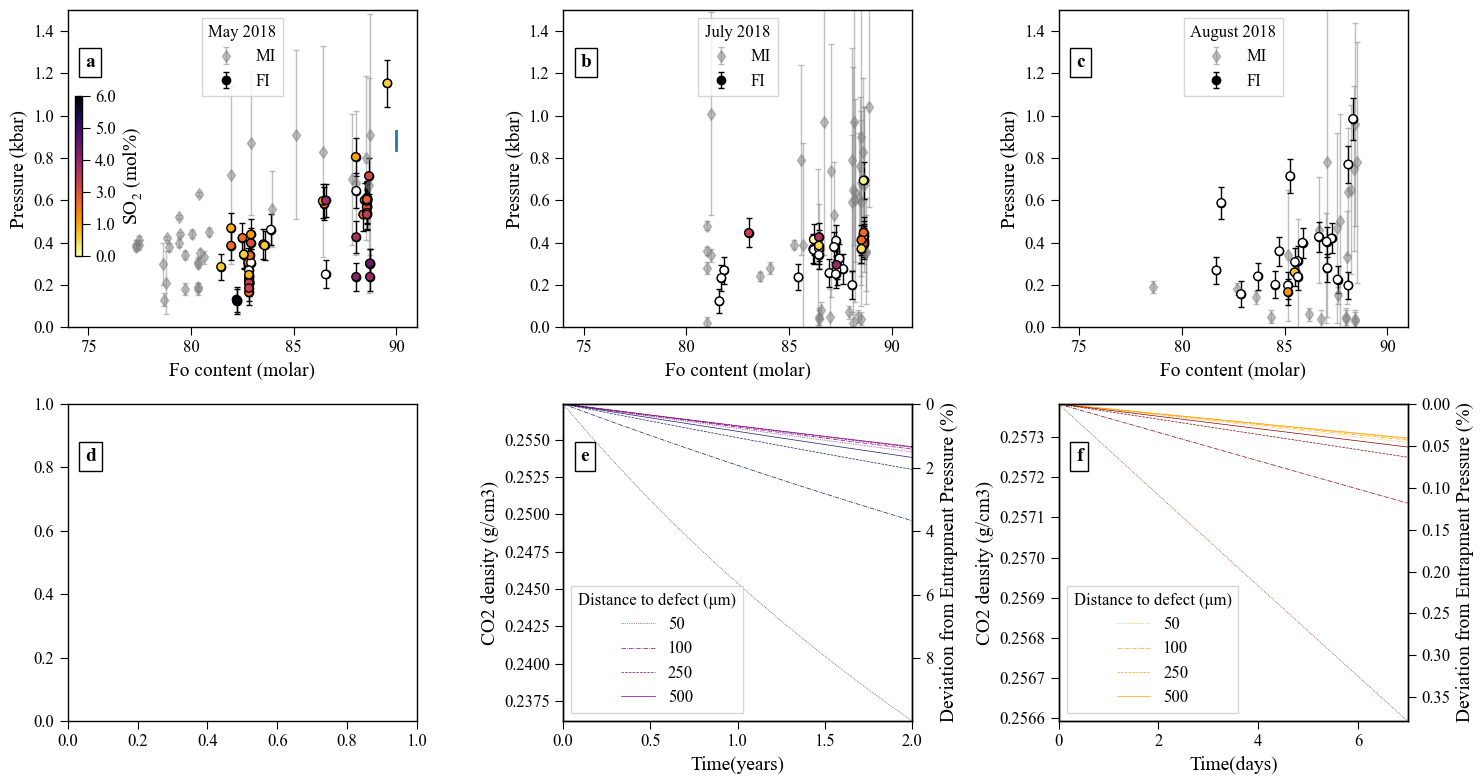

In [962]:
#### Now plot ###


figure_mosaic="""
ABC
DEF
"""
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(15, 8))
xlim=[74,91]
ylim=[0,1.5]


axes['A'].errorbar( sample_dict['LL4']['MI'][Fo_var]* 100, sample_dict['LL4']['MI'][mi_data_col] / 1000, yerr=sample_dict['LL4']['MI'][mi_err_col]/ 1000, 
                   color='grey', label='MI', alpha=0.5,markerfacecolor='grey', marker='d', ls='none', 
                   barsabove=False, elinewidth=1, capsize=2,zorder=-2)
axes['B'].errorbar( sample_dict['LL8']['MI'][Fo_var]* 100, sample_dict['LL8']['MI'][mi_data_col] / 1000, yerr=sample_dict['LL8']['MI'][mi_err_col]/ 1000, 
                   color='grey', label='MI', alpha=0.5,markerfacecolor='grey', marker='d', ls='none', 
                   barsabove=False, elinewidth=1, capsize=2,zorder=-2)
axes['C'].errorbar( sample_dict['LL7']['MI'][Fo_var]* 100, sample_dict['LL7']['MI'][mi_data_col] / 1000, yerr=sample_dict['LL7']['MI'][mi_err_col]/ 1000, 
                   color='grey', label='MI', alpha=0.5,markerfacecolor='grey', marker='d', ls='none', 
                   barsabove=False, elinewidth=1, capsize=2,zorder=-2)


axes['A'].errorbar( sample_dict['LL4']['FI'][Fo_var], sample_dict['LL4']['FI'][fi_data_col], yerr=sample_dict['LL4']['FI'][fi_err_col], 
                   color='k', label='FI', markerfacecolor='k', marker='o', ls='none', 
                   barsabove=False, elinewidth=1, capsize=2,zorder=-2)
axes['B'].errorbar( sample_dict['LL8']['FI'][Fo_var], sample_dict['LL8']['FI'][fi_data_col], yerr=sample_dict['LL8']['FI'][fi_err_col], 
                   color='k', label='FI', markerfacecolor='k', marker='o', ls='none', 
                   barsabove=False, elinewidth=1, capsize=2,zorder=-2)
axes['C'].errorbar( sample_dict['LL7']['FI'][Fo_var], sample_dict['LL7']['FI'][fi_data_col], yerr=sample_dict['LL7']['FI'][fi_err_col], 
                   color='k', label='FI', markerfacecolor='k', marker='o', ls='none', 
                   barsabove=False, elinewidth=1, capsize=2,zorder=-2)


norm_LL4=norm_colors(sample_dict['LL4']['FI'][xso2co2_col],series4max=sample_dict['LL4']['FI'][xso2co2_col],series4min=sample_dict['LL8']['FI'][xso2co2_col])
norm_LL8=norm_colors(sample_dict['LL8']['FI'][xso2co2_col],series4max=sample_dict['LL4']['FI'][xso2co2_col],series4min=sample_dict['LL8']['FI'][xso2co2_col])
norm_LL7=norm_colors(sample_dict['LL7']['FI'][xso2co2_col],series4max=sample_dict['LL4']['FI'][xso2co2_col],series4min=sample_dict['LL8']['FI'][xso2co2_col])

cmap=cm.inferno_r
cmap.set_bad('white')

## This actually plots data
axes['A'].scatter(sample_dict['LL4']['FI'][Fo_var], sample_dict['LL4']['FI'][fi_data_col],
            marker='o', edgecolor='k',color=cmap(norm_LL4))

axes['B'].scatter(sample_dict['LL8']['FI'][Fo_var], sample_dict['LL8']['FI'][fi_data_col],
            marker='o', edgecolor='k',color=cmap(norm_LL8))

axes['C'].scatter(sample_dict['LL7']['FI'][Fo_var], sample_dict['LL7']['FI'][fi_data_col],
            marker='o', edgecolor='k',color=cmap(norm_LL7))

## this is the colorbar

cbar_ax = fig.add_axes([0.055, 0.67, 0.005, 0.2])  # Adjust the position and size as needed

sca = cbar_ax.scatter([0] * 100, np.linspace(0, 1, 100), c=np.linspace(0, 1, 100), cmap=cmap)
cbar = plt.colorbar(sca, cax=cbar_ax)

cbar.set_label('SO$_2$ (mol%)') 
cbar.set_ticks([0,0.2,0.4,0.6,0.8,1.0])
cbar.set_ticklabels([str(value) for value in np.round(np.linspace(0.1, 6.5, 6), 0)])


for axis_key in ['A', 'B', 'C']:
    axes[axis_key].set_xlim(xlim)
    axes[axis_key].set_ylim(ylim)
    axes[axis_key].set_xlabel(Fo_var)
    axes[axis_key].set_ylabel("Pressure (kbar)")
    if axis_key=='A':
        axes[axis_key].legend(loc='upper center',title='May 2018')
    if axis_key=='B':
        axes[axis_key].legend(loc='upper center',title='July 2018')
    if axis_key=='C':
        axes[axis_key].legend(loc='upper center',title='August 2018')



############################ NOW the stretching model subplots ###############################



#### PLOT RESULTS OF STRETCHING #####


seconds_in_e_year = 365.25 * 24 * 60 * 60


y_col='CO2_dens_gcm3'
x_col='Time(s)'
twin_col='Calculated depths (km)'

xlabel4plot='Time(years)'
ylabel4plot='CO2 density (g/cm3)'
twinlabel4plot='Calculated depth (km)'

linecolor='midnightblue'
linecolor2='purple'
linewidth=0.5


axes['E'].plot(results_dict['R0']['b0'][x_col]/seconds_in_e_year,results_dict['R0']['b0'][y_col],color=linecolor2,linestyle=':',linewidth=linewidth,label=str(round(b0*10**6)))
axes['E'].plot(results_dict['R0']['b1'][x_col]/seconds_in_e_year,results_dict['R0']['b1'][y_col],color=linecolor2,linestyle='-.',linewidth=linewidth,label=str(round(b1*10**6)))
axes['E'].plot(results_dict['R0']['b2'][x_col]/seconds_in_e_year,results_dict['R0']['b2'][y_col],color=linecolor2,linestyle='--', linewidth=linewidth,label=str(round(b2*10**6)))
axes['E'].plot(results_dict['R0']['b3'][x_col]/seconds_in_e_year,results_dict['R0']['b3'][y_col],color=linecolor2,linestyle='-',linewidth=linewidth, label=str(round(b3*10**6)))

axes['E'].plot(results_dict['R0_2']['b4'][x_col]/seconds_in_e_year,results_dict['R0_2']['b4'][y_col],color=linecolor,linestyle=':',linewidth=linewidth)
axes['E'].plot(results_dict['R0_2']['b5'][x_col]/seconds_in_e_year,results_dict['R0_2']['b5'][y_col],color=linecolor,linestyle='-.',linewidth=linewidth)
axes['E'].plot(results_dict['R0_2']['b6'][x_col]/seconds_in_e_year,results_dict['R0_2']['b6'][y_col],color=linecolor,linestyle='--', linewidth=linewidth)
axes['E'].plot(results_dict['R0_2']['b7'][x_col]/seconds_in_e_year,results_dict['R0_2']['b7'][y_col],color=linecolor,linestyle='-',linewidth=linewidth)


twinax_E=axes['E'].twinx()

# ### FIll between lines
# cmap = plt.get_cmap('Blues_r')  # You can choose any colormap you prefer
# num_segments = 100  # You can adjust this to control the smoothness of the gradient

# for i in range(1, 4):
#     color = cmap(i / 4.0)  # Get a color from the colormap
#     label = str(R0_2 * 10**6)+' \u03BCm radius FI' if i == 1 else None
#     axes['E'].fill_between(results_dict['R0_2']['b%d' % i][x_col] / seconds_in_e_year,
#                          results_dict['R0_2']['b%d' % (i - 1)][y_col],
#                          results_dict['R0_2']['b%d' % i][y_col],
#                          color=color,alpha=0.5,zorder=-1,edgecolor='none')

# cmap = plt.get_cmap('Purples_r')  # You can choose any colormap you prefer
# num_segments = 100  # You can adjust this to control the smoothness of the gradient

# for i in range(1, 4):
#     color = cmap(i / 4.0)  # Get a color from the colormap
#     label = str(R0 * 10**6)+' \u03BCm radius FI' if i == 1 else None
#     axes['E'].fill_between(results_dict['R0']['b%d' % i][x_col] / seconds_in_e_year,
#                          results_dict['R0']['b%d' % (i - 1)][y_col],
#                          results_dict['R0']['b%d' % i][y_col],
#                          color=color,alpha=0.5,zorder=-1,edgecolor='none')

#### plot 'F'

linecolor='darkred'
linecolor2='orange'

axes['F'].plot(results_dict_surface['R0']['b0'][x_col]/day_in_sec,results_dict_surface['R0']['b0'][y_col],color=linecolor2,linestyle=':',linewidth=linewidth,label=str(round(b0*10**6)))
axes['F'].plot(results_dict_surface['R0']['b1'][x_col]/day_in_sec,results_dict_surface['R0']['b1'][y_col],color=linecolor2,linestyle='-.',linewidth=linewidth,label=str(round(b1*10**6)))
axes['F'].plot(results_dict_surface['R0']['b2'][x_col]/day_in_sec,results_dict_surface['R0']['b2'][y_col],color=linecolor2,linestyle='--', linewidth=linewidth,label=str(round(b2*10**6)))
axes['F'].plot(results_dict_surface['R0']['b3'][x_col]/day_in_sec,results_dict_surface['R0']['b3'][y_col],color=linecolor2,linestyle='-',linewidth=linewidth, label=str(round(b3*10**6)))

axes['F'].plot(results_dict_surface['R0_2']['b4'][x_col]/day_in_sec,results_dict_surface['R0_2']['b4'][y_col],color=linecolor,linestyle=':',linewidth=linewidth)
axes['F'].plot(results_dict_surface['R0_2']['b5'][x_col]/day_in_sec,results_dict_surface['R0_2']['b5'][y_col],color=linecolor,linestyle='-.',linewidth=linewidth)
axes['F'].plot(results_dict_surface['R0_2']['b6'][x_col]/day_in_sec,results_dict_surface['R0_2']['b6'][y_col],color=linecolor,linestyle='--', linewidth=linewidth)
axes['F'].plot(results_dict_surface['R0_2']['b7'][x_col]/day_in_sec,results_dict_surface['R0_2']['b7'][y_col],color=linecolor,linestyle='-',linewidth=linewidth)

twinax_F=axes['F'].twinx()

# ### FIll between lines
# cmap = plt.get_cmap('Reds_r')  # You can choose any colormap you prefer
# num_segments = 100  # You can adjust this to control the smoothness of the gradient

# for i in range(1, 4):
#     color = cmap(i / 4.0)  # Get a color from the colormap
#     label = str(R0_2 * 10**6)+' \u03BCm radius FI' if i == 1 else None
#     axes['F'].fill_between(results_dict_surface['R0_2']['b%d' % i][x_col] / day_in_sec,
#                          results_dict_surface['R0_2']['b%d' % (i - 1)][y_col],
#                          results_dict_surface['R0_2']['b%d' % i][y_col],
#                          color=color,alpha=0.5,zorder=-1,edgecolor='none')

# cmap = plt.get_cmap('Oranges_r')  # You can choose any colormap you prefer
# num_segments = 100  # You can adjust this to control the smoothness of the gradient

# for i in range(1, 4):
#     color = cmap(i / 4.0)  # Get a color from the colormap
#     label = str(R0 * 10**6)+' \u03BCm radius FI' if i == 1 else None
#     axes['F'].fill_between(results_dict_surface['R0']['b%d' % i][x_col] / day_in_sec,
#                          results_dict_surface['R0']['b%d' % (i - 1)][y_col],
#                          results_dict_surface['R0']['b%d' % i][y_col],
#                          color=color,alpha=0.5,zorder=-1,edgecolor='none')


##### Set the plot parameters 


ymin=np.nanmin([np.nanmin(results_dict['R0']['b0'][y_col]),np.nanmin(results_dict['R0_2']['b0'][y_col])])

ylim=[ymin,fi_rho_initial_gcm3]
xlim=([round(min(results_dict['R0']['b0'][x_col]/seconds_in_e_year)),round(max(results_dict['R0']['b0'][x_col]/seconds_in_e_year))])

ylim_P_E=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim),T_K=SC_temp+273.15)['P_MPa']

ylim_D_E=pf.convert_pressure_to_depth(P_kbar=ylim_P_E/100,
                model='ryan_lerner')


axes['E'].set_xlim(xlim)
axes['E'].set_ylim(ylim)


xlim_F=([round(min(results_dict_surface['R0']['b0'][x_col]/day_in_sec)),round(max(results_dict_surface['R0']['b0'][x_col]/day_in_sec))])
ymin_F=np.nanmin([np.nanmin(results_dict_surface['R0']['b0'][y_col]),np.nanmin(results_dict_surface['R0_2']['b0'][y_col])])

ylim_F=[ymin_F,fi_rho_initial_gcm3]
ylim_P_F=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim_F),T_K=SC_temp+273.15)['P_MPa']

ylim_D_F=pf.convert_pressure_to_depth(P_kbar=ylim_P_F/100,
                model='ryan_lerner')

axes['F'].set_xlim(xlim_F)
axes['F'].set_ylim(ylim_F)


def percent_drop(ylim, original_value):
    return 100-ylim*100/original_value

twinax_E.set_ylim(percent_drop(ylim_P_E,original_value=SC_pressure*100))
twinax_F.set_ylim(percent_drop(ylim_P_F,original_value=SC_pressure*100))

axes['E'].set_xlabel(xlabel4plot)
axes['F'].set_xlabel('Time(days)')

axes['E'].set_ylabel(ylabel4plot)
axes['F'].set_ylabel(ylabel4plot)

twinax_E.set_ylabel('Deviation from Entrapment Pressure (%)')
twinax_F.set_ylabel('Deviation from Entrapment Pressure (%)')

axes['E'].legend(title='Distance to defect (\u03BCm)')
axes['F'].legend(title='Distance to defect (\u03BCm)')

subplot_labels = ['A', 'B', 'C','D','E', 'F']
pos_e2h=(0.05,0.82)
label_positions = [pos_e2h, pos_e2h, pos_e2h, pos_e2h, pos_e2h, pos_e2h]

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)


############################### other plot params################################################

error_arrow_stalling=[90,max(ylim_P_E)/100,np.diff(ylim_P_E/100)[0]]
error_arrow_quenching=[90.5,max(ylim_P_F)/100,np.diff(ylim_P_F/100)[0]]

axes['A'].plot([error_arrow_stalling[0],error_arrow_stalling[0]],[error_arrow_stalling[1],error_arrow_stalling[1]-error_arrow_stalling[2]],linewidth=2)
axes['A'].plot([error_arrow_quenching[0],error_arrow_quenching[0]],[error_arrow_quenching[1],error_arrow_quenching[1]-error_arrow_quenching[2]],linewidth=2,color='red')

fig.tight_layout()

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
fig.savefig(figpath+'/'+"Fig4_FoP_stretching.pdf")

In [959]:
pf.convert_pressure_to_depth(P_kbar=0.035,model='ryan_lerner')
find_P_for_kmdepth(1, model, tolerance)


0.219142880363336

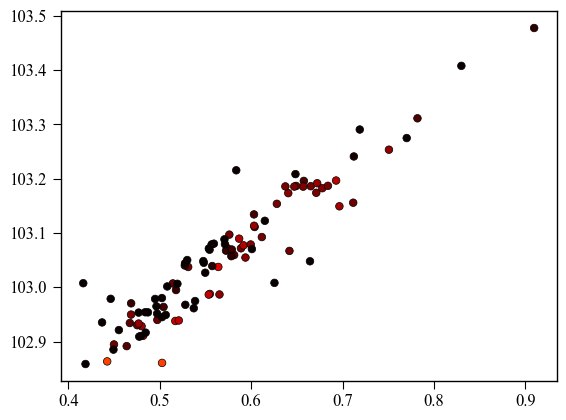

In [856]:
plt.scatter(lei_fi_plotting_df['Diad1_Voigt_Sigma'], lei_fi_plotting_df['Corrected_Splitting'],
marker='o', s=30, edgecolors='k', linewidths=0.5,
c=lei_fi_plotting_df['SO2_mole_percent'].fillna(0), cmap='hot',
vmin = 0, vmax = 14)


In [759]:
error_arrow_eruption[1]

0.928958862210179

In [761]:
error_arrow_stalling[1]

0.928958862210179

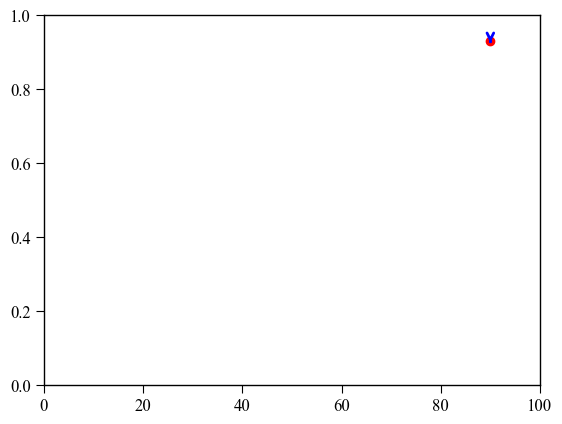

In [739]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
x = 90
y = 0.928963320994764
length = 0.003519774146607535

# Create a figure and axis
fig, ax = plt.subplots()

# Define the arrow properties
arrow_props = dict(arrowstyle='->', linewidth=2, color='blue')

# Plot a point at (x, y)
ax.plot(x, y, 'ro')  # 'ro' means red circle for the point

# Create the arrow starting from (x, y) and pointing downward
ax.annotate('', xy=(x, y - length), xytext=(x, y),
            arrowprops=arrow_props)

# Set axis limits
ax.set_xlim(0, 100)  # Adjust these limits according to your data
ax.set_ylim(0, 1)    # Adjust these limits according to your data

# Show the plot
plt.show()

In [702]:
#### PLOT RESULTS OF STRETCHING #####


seconds_in_e_year = 365.25 * 24 * 60 * 60


figure_mosaic="""
EF

"""
y_col='CO2_dens_gcm3'
x_col='Time(s)'
twin_col='Calculated depths (km)'

xlabel4plot='Time(years)'
ylabel4plot='CO2 density (g/cm3)'
twinlabel4plot='Calculated depth (km)'

linecolor='k'
linewidth=1

fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 5))


axes['E'].plot(results_dict['R0']['b0'][x_col]/seconds_in_e_year,results_dict['R0']['b0'][y_col],color=linecolor,linestyle=':',linewidth=linewidth,label=str(round(b0*10**6)))
axes['E'].plot(results_dict['R0']['b1'][x_col]/seconds_in_e_year,results_dict['R0']['b1'][y_col],color=linecolor,linestyle='-.',linewidth=linewidth,label=str(round(b1*10**6)))
axes['E'].plot(results_dict['R0']['b2'][x_col]/seconds_in_e_year,results_dict['R0']['b2'][y_col],color=linecolor,linestyle='--', linewidth=linewidth,label=str(round(b2*10**6)))
axes['E'].plot(results_dict['R0']['b3'][x_col]/seconds_in_e_year,results_dict['R0']['b3'][y_col],color=linecolor,linestyle='-',linewidth=linewidth, label=str(round(b3*10**6)))


twinax_E=axes['E'].twinx()

### FIll between lines
cmap = plt.get_cmap('Greens_r')  # You can choose any colormap you prefer
num_segments = 100  # You can adjust this to control the smoothness of the gradient

for i in range(1, 4):
    color = cmap(i / 4.0)  # Get a color from the colormap
    label = str(R0_2 * 10**6)+' \u03BCm radius FI' if i == 1 else None
    axes['E'].fill_between(results_dict['R0_2']['b%d' % i][x_col] / seconds_in_e_year,
                         results_dict['R0_2']['b%d' % (i - 1)][y_col],
                         results_dict['R0_2']['b%d' % i][y_col],
                         color=color,alpha=1,label=label,zorder=-1)

#### plot 'F'
axes['F'].plot(results_dict_surface['R0']['b0'][x_col]/day_in_sec,results_dict_surface['R0']['b0'][y_col],color=linecolor,linestyle=':',linewidth=linewidth,label=str(round(b0*10**6)))
axes['F'].plot(results_dict_surface['R0']['b1'][x_col]/day_in_sec,results_dict_surface['R0']['b1'][y_col],color=linecolor,linestyle='-.',linewidth=linewidth,label=str(round(b1*10**6)))
axes['F'].plot(results_dict_surface['R0']['b2'][x_col]/day_in_sec,results_dict_surface['R0']['b2'][y_col],color=linecolor,linestyle='--', linewidth=linewidth,label=str(round(b2*10**6)))
axes['F'].plot(results_dict_surface['R0']['b3'][x_col]/day_in_sec,results_dict_surface['R0']['b3'][y_col],color=linecolor,linestyle='-',linewidth=linewidth, label=str(round(b3*10**6)))

twinax_F=axes['F'].twinx()

### FIll between lines
cmap = plt.get_cmap('Greens_r')  # You can choose any colormap you prefer
num_segments = 100  # You can adjust this to control the smoothness of the gradient

for i in range(1, 4):
    color = cmap(i / 4.0)  # Get a color from the colormap
    label = str(R0_2 * 10**6)+' \u03BCm radius FI' if i == 1 else None
    axes['F'].fill_between(results_dict_surface['R0_2']['b%d' % i][x_col] / day_in_sec,
                         results_dict_surface['R0_2']['b%d' % (i - 1)][y_col],
                         results_dict_surface['R0_2']['b%d' % i][y_col],
                         color=color,alpha=1,label=label,zorder=-1)


##### Set the plot parameters 


ymin=np.nanmin([np.nanmin(results_dict['R0']['b0'][y_col]),np.nanmin(results_dict['R0_2']['b0'][y_col])])

ylim=[ymin,fi_rho_initial_gcm3+0.00001]
xlim=([round(min(results_dict['R0']['b0'][x_col]/seconds_in_e_year)),round(max(results_dict['R0']['b0'][x_col]/seconds_in_e_year))])

ylim_P_E=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim),T_K=SC_temp+273.15)['P_MPa']

ylim_D_E=pf.convert_pressure_to_depth(P_kbar=ylim_P_E/100,
                model='ryan_lerner')


axes['E'].set_xlim(xlim)
axes['E'].set_ylim(ylim)


xlim_F=([round(min(results_dict_surface['R0']['b0'][x_col]/day_in_sec)),round(max(results_dict_surface['R0']['b0'][x_col]/day_in_sec))])
ymin_F=np.nanmin([np.nanmin(results_dict_surface['R0']['b0'][y_col]),np.nanmin(results_dict_surface['R0_2']['b0'][y_col])])

ylim_F=[ymin_F,fi_rho_initial_gcm3+0.000001]
ylim_P_F=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim_F),T_K=SC_temp+273.15)['P_MPa']

ylim_D_F=pf.convert_pressure_to_depth(P_kbar=ylim_P_F/100,
                model='ryan_lerner')

axes['F'].set_xlim(xlim_F)
axes['F'].set_ylim(ylim_F)


def percent_drop(ylim, original_value):
    return 100-ylim*100/original_value

twinax_E.set_ylim(percent_drop(ylim_P_E,original_value=SC_pressure*100))
twinax_F.set_ylim(percent_drop(ylim_P_F,original_value=SC_pressure*100))

axes['E'].set_xlabel(xlabel4plot)
axes['F'].set_xlabel('Time(days)')

axes['E'].set_ylabel(ylabel4plot)
axes['F'].set_ylabel(ylabel4plot)

twinax_E.set_ylabel('Deviation from Entrapment Pressure (%)')
twinax_F.set_ylabel('Deviation from Entrapment Pressure (%)')

axes['E'].legend(title='Distance to defect (\u03BCm) \n for '+ str(R0*10**6)+' \u03BCm radius FI')
axes['F'].legend(title='Distance to defect (\u03BCm)')

subplot_labels = ['E', 'F']
pos_e2h=(0.05,0.82)
label_positions = [pos_e2h, pos_e2h]

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)


fig.tight_layout()

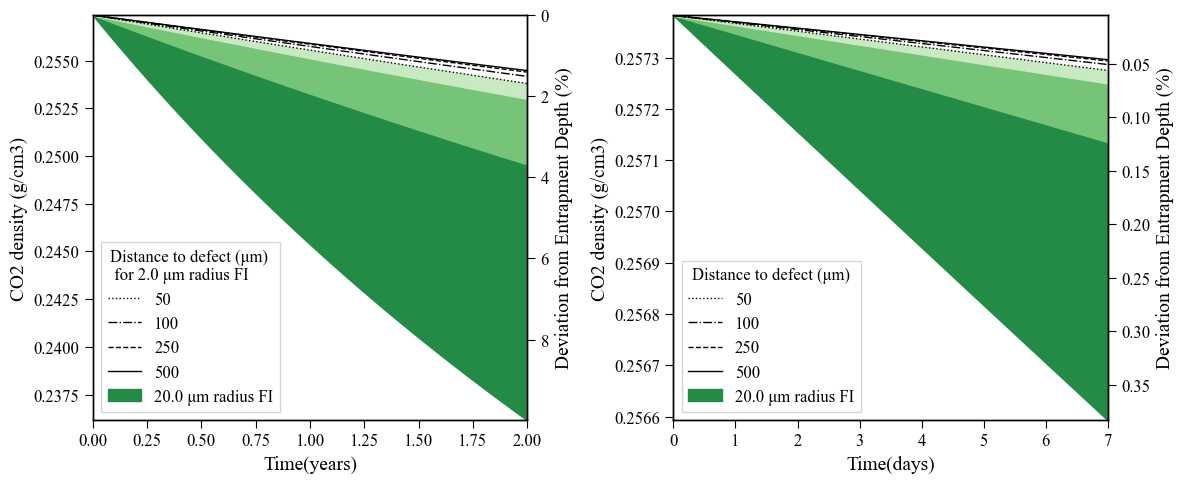

In [678]:
#### PLOT RESULTS OF STRETCHING #####


seconds_in_a_year = 365.25 * 24 * 60 * 60


figure_mosaic="""
AB

"""
y_col='CO2_dens_gcm3'
x_col='Time(s)'
twin_col='Pinternal(MPa)'

xlabel4plot='Time(years)'
ylabel4plot='CO2 density (g/cm3)'
twinlabel4plot='Pinternal(MPa)'

linecolor='k'
linewidth=1

fig,ax=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 5))


ax['A'].plot(results_dict['R0']['b0'][x_col]/seconds_in_a_year,results_dict['R0']['b0'][y_col],color=linecolor,linestyle=':',linewidth=linewidth,label=str(round(b0*10**6)))
ax['A'].plot(results_dict['R0']['b1'][x_col]/seconds_in_a_year,results_dict['R0']['b1'][y_col],color=linecolor,linestyle='-.',linewidth=linewidth,label=str(round(b1*10**6)))
ax['A'].plot(results_dict['R0']['b2'][x_col]/seconds_in_a_year,results_dict['R0']['b2'][y_col],color=linecolor,linestyle='--', linewidth=linewidth,label=str(round(b2*10**6)))
ax['A'].plot(results_dict['R0']['b3'][x_col]/seconds_in_a_year,results_dict['R0']['b3'][y_col],color=linecolor,linestyle='-',linewidth=linewidth, label=str(round(b3*10**6)))


twinax_A=ax['A'].twinx()


twinax_A.plot(results_dict['R0']['b0'][x_col]/seconds_in_a_year,results_dict['R0']['b0'][twin_col],linestyle='')
twinax_A.plot(results_dict['R0']['b1'][x_col]/seconds_in_a_year,results_dict['R0']['b1'][twin_col],linestyle='')
twinax_A.plot(results_dict['R0']['b2'][x_col]/seconds_in_a_year,results_dict['R0']['b2'][twin_col],linestyle='')
twinax_A.plot(results_dict['R0']['b3'][x_col]/seconds_in_a_year,results_dict['R0']['b3'][twin_col],linestyle='')

### FIll between lines
cmap = plt.get_cmap('Greens_r')  # You can choose any colormap you prefer
num_segments = 100  # You can adjust this to control the smoothness of the gradient

for i in range(1, 4):
    color = cmap(i / 4.0)  # Get a color from the colormap
    label = str(R0_2 * 10**6)+' \u03BCm radius FI' if i == 1 else None
    ax['A'].fill_between(results_dict['R0_2']['b%d' % i][x_col] / seconds_in_a_year,
                         results_dict['R0_2']['b%d' % (i - 1)][y_col],
                         results_dict['R0_2']['b%d' % i][y_col],
                         color=color,alpha=1,label=label,zorder=-1)

#### plot 'B'
ax['B'].plot(results_dict_surface['R0']['b0'][x_col]/day_in_sec,results_dict_surface['R0']['b0'][y_col],color=linecolor,linestyle=':',linewidth=linewidth,label=str(round(b0*10**6)))
ax['B'].plot(results_dict_surface['R0']['b1'][x_col]/day_in_sec,results_dict_surface['R0']['b1'][y_col],color=linecolor,linestyle='-.',linewidth=linewidth,label=str(round(b1*10**6)))
ax['B'].plot(results_dict_surface['R0']['b2'][x_col]/day_in_sec,results_dict_surface['R0']['b2'][y_col],color=linecolor,linestyle='--', linewidth=linewidth,label=str(round(b2*10**6)))
ax['B'].plot(results_dict_surface['R0']['b3'][x_col]/day_in_sec,results_dict_surface['R0']['b3'][y_col],color=linecolor,linestyle='-',linewidth=linewidth, label=str(round(b3*10**6)))

# ax['B'].plot(results_dict_surface['R0_2']['b4'][x_col]/day_in_sec,results_dict_surface['R0_2']['b4'][y_col],color=linecolor,linestyle=':',linewidth=linewidth)
# ax['B'].plot(results_dict_surface['R0_2']['b5'][x_col]/day_in_sec,results_dict_surface['R0_2']['b5'][y_col],color=linecolor,linestyle='-.',linewidth=linewidth)
# ax['B'].plot(results_dict_surface['R0_2']['b6'][x_col]/day_in_sec,results_dict_surface['R0_2']['b6'][y_col],color=linecolor,linestyle='--',linewidth=linewidth)
# ax['B'].plot(results_dict_surface['R0_2']['b7'][x_col]/day_in_sec,results_dict_surface['R0_2']['b7'][y_col],color=linecolor,linestyle='-',linewidth=linewidth)

twinax_B=ax['B'].twinx()
twinax_B.plot(results_dict_surface['R0_2']['b4'][x_col]/day_in_sec,results_dict_surface['R0_2']['b4'][twin_col],linestyle='')
twinax_B.plot(results_dict_surface['R0_2']['b5'][x_col]/day_in_sec,results_dict_surface['R0_2']['b5'][twin_col],linestyle='')
twinax_B.plot(results_dict_surface['R0_2']['b6'][x_col]/day_in_sec,results_dict_surface['R0_2']['b6'][twin_col],linestyle='')
twinax_B.plot(results_dict_surface['R0_2']['b7'][x_col]/day_in_sec,results_dict_surface['R0_2']['b7'][twin_col],linestyle='')

### FIll between lines
cmap = plt.get_cmap('Greens_r')  # You can choose any colormap you prefer
num_segments = 100  # You can adjust this to control the smoothness of the gradient

for i in range(1, 4):
    color = cmap(i / 4.0)  # Get a color from the colormap
    label = str(R0_2 * 10**6)+' \u03BCm radius FI' if i == 1 else None
    ax['B'].fill_between(results_dict_surface['R0_2']['b%d' % i][x_col] / day_in_sec,
                         results_dict_surface['R0_2']['b%d' % (i - 1)][y_col],
                         results_dict_surface['R0_2']['b%d' % i][y_col],
                         color=color,alpha=1,label=label,zorder=-1)


##### Set the plot parameters 


ymin=np.nanmin([np.nanmin(results_dict['R0']['b0'][y_col]),np.nanmin(results_dict['R0_2']['b0'][y_col])])

ylim=[ymin,fi_rho_initial_gcm3+0.00001]
xlim=([round(min(results_dict['R0']['b0'][x_col]/seconds_in_a_year)),round(max(results_dict['R0']['b0'][x_col]/seconds_in_a_year))])

ylim_P_A=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim),T_K=SC_temp+273.15)['P_MPa']

ylim_D_A=pf.convert_pressure_to_depth(P_kbar=ylim_P_A/100,
                model='ryan_lerner')


ax['A'].set_xlim(xlim)
ax['A'].set_ylim(ylim)


xlim_B=([round(min(results_dict_surface['R0']['b0'][x_col]/day_in_sec)),round(max(results_dict_surface['R0']['b0'][x_col]/day_in_sec))])
ymin_B=np.nanmin([np.nanmin(results_dict_surface['R0']['b0'][y_col]),np.nanmin(results_dict_surface['R0_2']['b0'][y_col])])

ylim_B=[ymin_B,fi_rho_initial_gcm3+0.000001]
ylim_P_B=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim_B),T_K=SC_temp+273.15)['P_MPa']

ylim_D_B=pf.convert_pressure_to_depth(P_kbar=ylim_P_B/100,
                model='ryan_lerner')

ax['B'].set_xlim(xlim_B)
ax['B'].set_ylim(ylim_B)


def percent_drop(ylim, original_value):
    return 100-ylim*100/original_value

twinax_A.set_ylim(percent_drop(ylim_P_A, original_value=92.900345))
twinax_B.set_ylim(percent_drop(ylim_P_B, original_value=92.900345)

ax['A'].set_xlabel(xlabel4plot)
ax['B'].set_xlabel('Time(days)')

ax['A'].set_ylabel(ylabel4plot)
ax['B'].set_ylabel(ylabel4plot)

twinax_A.set_ylabel('Deviation from Entrapment Depth (%)')
twinax_B.set_ylabel('Deviation from Entrapment Depth (%)')

ax['A'].legend(title='Distance to defect (\u03BCm) \n for '+ str(R0*10**6)+' \u03BCm radius FI')
ax['B'].legend(title='Distance to defect (\u03BCm)')


fig.tight_layout()

In [676]:
max(ylim_P_A)

92.90034504427096

In [605]:
###### Let's model an FI (5 um) coming from South Caldera reservoir(4km @ 1300 C) and erupting to surface (0km @ 1150 C) ##############

####### Establish reservoir PTX conditions

## SC reservoir conditions
SC_depth = 4 # depth in km
melt_MgO=13 #melt MgO in wt%
SC_temp=round(21.2*melt_MgO+1017,-1)  # T in C
# find pressure @ SC
model = 'ryan_lerner'
tolerance = 0.001
SC_pressure = find_P_for_kmdepth(SC_depth, model, tolerance)

## surface conditions
HM_depth = 0 # depth in km
melt_MgO=6.5 #melt MgO in wt%
HM_temp=round(21.2*melt_MgO+1017,-1)  # T in C
# find pressure @ HM
model = 'ryan_lerner'
tolerance = 0.001
HM_pressure = find_P_for_kmdepth(HM_depth, model, tolerance)


####### Let's start our model

### First let's calculate the CO2 density of our 5um FI trapped at SC
fi_rho_initial_gcm3=pf.calculate_rho_for_P_T(EOS='SW96',P_kbar=SC_pressure,T_K=SC_temp+273.15)[0]

## Now we move the FI to HM reservoir (1km), Pinternal will change bc T=1150, we calculate Pinternal
fi_Pi_HM_initial_MPa=pf.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=fi_rho_initial_gcm3,T_K=HM_temp+273.15)['P_MPa'][0]

## Now let's leave it on the surface for 7 days
# set initial parameters 

days=7

T = HM_temp + 273.15
R0 = 2 * 10 ** -6 # FI radius in m
R0_2=10 * 10 ** -6


def calc_multiplier(R0, dist2defect_um):
    multiplier = (dist2defect_um) / (R0 * 10**6)
    return multiplier

dist2defect_list=[25,50,100,500]

b_list_R0=[calc_multiplier(R0, dist)*R0 for dist in dist2defect_list]
b_list_R0_2=[calc_multiplier(R0_2, dist)*R0_2 for dist in dist2defect_list]

b0=b_list_R0[0]
b1 = b_list_R0[1]
b2=b_list_R0[2]
b3=b_list_R0[3]

b4=b_list_R0[0]
b5 = b_list_R0[1]
b6=b_list_R0[2]
b7=b_list_R0[3]

Pinternal=fi_Pi_HM_initial_MPa
Pexternal=HM_pressure*100 ##Pressure in MPa for this model

steps=1000 #number of steps

EOS='SW96'
day_in_sec=(24*60*60)
totaltime_in_s=days*day_in_sec

# Call the function with appropriate arguments
R_values = [R0, R0_2]  # Define R values
b_values = [b0, b1, b2, b3, b4, b5, b6, b7]

b_list= [b0, b1, b2, b3, b4, b5, b6, b7]

results_dict_surface = calculate_results(R_values, b_values, T, EOS, Pinternal, Pexternal, totaltime_in_s, steps, SC_temp)

In [351]:
plt.rcParams["pdf.fonttype"]=42


days=10

T = 1150 + 273.15
R0 = 5 * 10 ** -6

b=3*R0
b1 = 5*R0
b2=10*R0
b3=100*R0

Depth=pf.convert_pressure_to_depth(P_kbar=2,
                model='ryan_lerner')
Depth
CO2_dens=pf.calculate_rho_for_P_T(EOS=EOS,P_kbar=P_kbar,T_K=T)[0]

EOS='SW96'
Pinternal=115
Pexternal=0.1
steps=1000 #number of steps
# totaltime=10**6 #total time at this stage (s)

day_in_sec=(24*60*60)
totaltime_in_s=days*day_in_sec

results=findR_Pi_rho_fixedPe_euler(R=R0,b=b,T=T,EOS=EOS,Pinternal=Pinternal,Pexternal=Pexternal,totaltime=totaltime_in_s,steps=steps)
results['Calculated depths (km)']=pf.convert_pressure_to_depth(P_kbar=results['Pinternal(MPa)']/100,
                model='ryan_lerner')
results1=findR_Pi_rho_fixedPe_euler(R=R0,b=b1,T=T,EOS=EOS,Pinternal=Pinternal,Pexternal=Pexternal,totaltime=totaltime_in_s,steps=steps)
results1['Calculated depths (km)']=pf.convert_pressure_to_depth(P_kbar=results1['Pinternal(MPa)']/100,
                model='ryan_lerner')
results2=findR_Pi_rho_fixedPe_euler(R=R0,b=b2,T=T,EOS=EOS,Pinternal=Pinternal,Pexternal=Pexternal,totaltime=totaltime_in_s,steps=steps)
results2['Calculated depths (km)']=pf.convert_pressure_to_depth(P_kbar=results2['Pinternal(MPa)']/100,
                model='ryan_lerner')
results3=findR_Pi_rho_fixedPe_euler(R=R0,b=b3,T=T,EOS=EOS,Pinternal=Pinternal,Pexternal=Pexternal,totaltime=totaltime_in_s,steps=steps)
results3['Calculated depths (km)']=pf.convert_pressure_to_depth(P_kbar=results3['Pinternal(MPa)']/100,
                model='ryan_lerner')


fig,ax=plt.subplots(1, 2, figsize=(12, 3))
#
ax0_y='ΔR/R0 (fractional change in radius)'#'Fi_radius(\u03BCm)' #'ΔR/R0 (fractional change in radius)'
ax0_y_multiplier=100

ax[0].plot(results['Time(s)']/day_in_sec,results[ax0_y]*ax0_y_multiplier,color='k',linestyle='-',label=str(round(b*10**6)))
ax[0].plot(results1['Time(s)']/day_in_sec,results1[ax0_y]*ax0_y_multiplier,color='k',linestyle='--',label=str(round(b1*10**6)))
ax[0].plot(results2['Time(s)']/day_in_sec,results2[ax0_y]*ax0_y_multiplier,color='k',linestyle='-.',label=str(round(b2*10**6)))
ax[0].plot(results3['Time(s)']/day_in_sec,results3[ax0_y]*ax0_y_multiplier,color='k',linestyle=':',label=str(round(b3*10**6)))

ax[1].plot(results['Time(s)']/day_in_sec,results['CO2_dens_gcm3'],color='k',linestyle='-',label=str(round(b*10**6)))
ax[1].plot(results1['Time(s)']/day_in_sec,results1['CO2_dens_gcm3'],color='k',linestyle='--',label=str(round(b1*10**6)))
ax[1].plot(results2['Time(s)']/day_in_sec,results2['CO2_dens_gcm3'],color='k',linestyle='-.', label=str(round(b2*10**6)))
ax[1].plot(results3['Time(s)']/day_in_sec,results3['CO2_dens_gcm3'],color='k',linestyle=':', label=str(round(b3*10**6)))
twinax1=ax[1].twinx()

twinax1.plot(results['Time(s)']/day_in_sec,results['Calculated depths (km)'],linestyle='')
twinax1.plot(results1['Time(s)']/day_in_sec,results1['Calculated depths (km)'],linestyle='')
twinax1.plot(results2['Time(s)']/day_in_sec,results2['Calculated depths (km)'],linestyle='')
twinax1.plot(results3['Time(s)']/day_in_sec,results3['Calculated depths (km)'],linestyle='')

ax[0].set_xlabel('Time(days)')
ax[1].set_xlabel('Time(days)')

ax[0].set_ylabel('% change in the FI radius')
ax[1].set_ylabel('CO2_dens_gcm3')
twinax1.set_ylabel('Calculated depths (km)')
ax[0].legend(title='Distance to defect (\u03BCm)')
ax[1].legend(title='Distance to defect (\u03BCm)')

fig.suptitle ("Stretching of a "+str(round(R0*10**6)) +" \u03BCm radius FI at 1200 C")
fig.savefig("stretch_FI_1200C.pdf")
#display(results.head())
# display(results1.head())
# display(results2.head())


meta NOT subset; don't know how to subset; dropped


# FIG S3 for supplement + simple version with Magmasat only

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


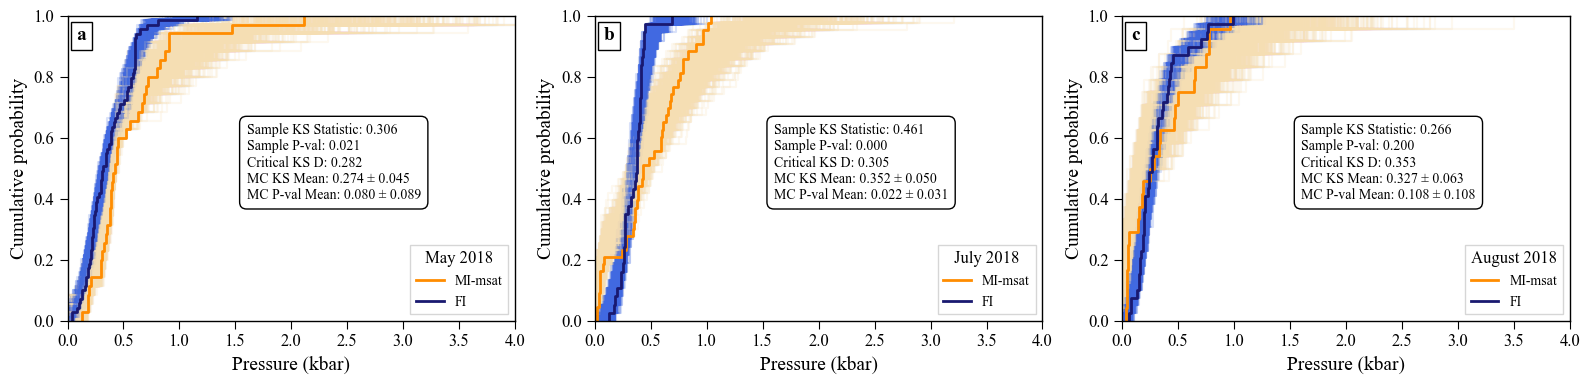

In [ ]:
# Define the number of iterations
iterations = 1000

# Create a dictionary to store the results
results_dict = {
    'LL4': {},
    'LL7': {},
    'LL8': {}
}

# Iterate through the cases (LL4, LL7, LL8)
for case in data_dict.keys():
    fi_data = data_dict[case]['fi_data']
    fi_data_err = data_dict[case]['fi_data_err']
    
    # Iterate through the calculations (msat, sh, im, mch, vc)
    for calculation in ['msat', 'sh', 'im', 'mch', 'vc','avg']:
        mi_data = data_dict[case]['mi_data_' + calculation]
        mi_data_err = data_dict[case]['mi_data_' + calculation + '_errors']
        
        # Calculate the results using the calculate_bootstrap_ks function
        results = calculate_bootstrap_ks(fi_data, mi_data, fi_data_err, mi_data_err,
                                          iterations=iterations, plot=False, plot_method='step',
                                          xlabel="Pressure (kbar)")
        
        # Store the results in the results_dict
        results_dict[case][calculation] = results

xlim=[0,4]
ylim=[0,1]
stats_box_pos=(0.4,0.4)#(0.4,0.4)
subset='msat'

## Now plot ##
figure_mosaic="""
ABC
"""

fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(16, 4))

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
plot_distribution(axes['A'], results_dict['LL4'][subset], legend_title='May 2018', data1label='FI',data2label='MI-'+subset, xlabel='Pressure (kbar)',xlim=xlim,ylim=ylim,
                    flip_axes=False,stats_box_pos=stats_box_pos)
plot_distribution(axes['B'], results_dict['LL8'][subset], legend_title='July 2018', data1label='FI',data2label='MI-'+subset, xlabel='Pressure (kbar)',xlim=xlim,ylim=ylim,
                    flip_axes=False,stats_box_pos=stats_box_pos)
plot_distribution(axes['C'], results_dict['LL7'][subset], legend_title='August 2018', data1label='FI',data2label='MI-'+subset, xlabel='Pressure (kbar)',xlim=xlim,ylim=ylim,
                    flip_axes=False,stats_box_pos=stats_box_pos)

pos_a2h=(0.02,0.92)
label_positions = [pos_a2h, pos_a2h, pos_a2h]

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)

fig.tight_layout()
fig.savefig(figpath+'/'+'Fig_KSMC_'+subset+'.png')
fig.savefig(figpath+'/'+'Fig_KSMC_'+subset+'.pdf')

## Insane FIGS2 for supplement, all sol models KS MC

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


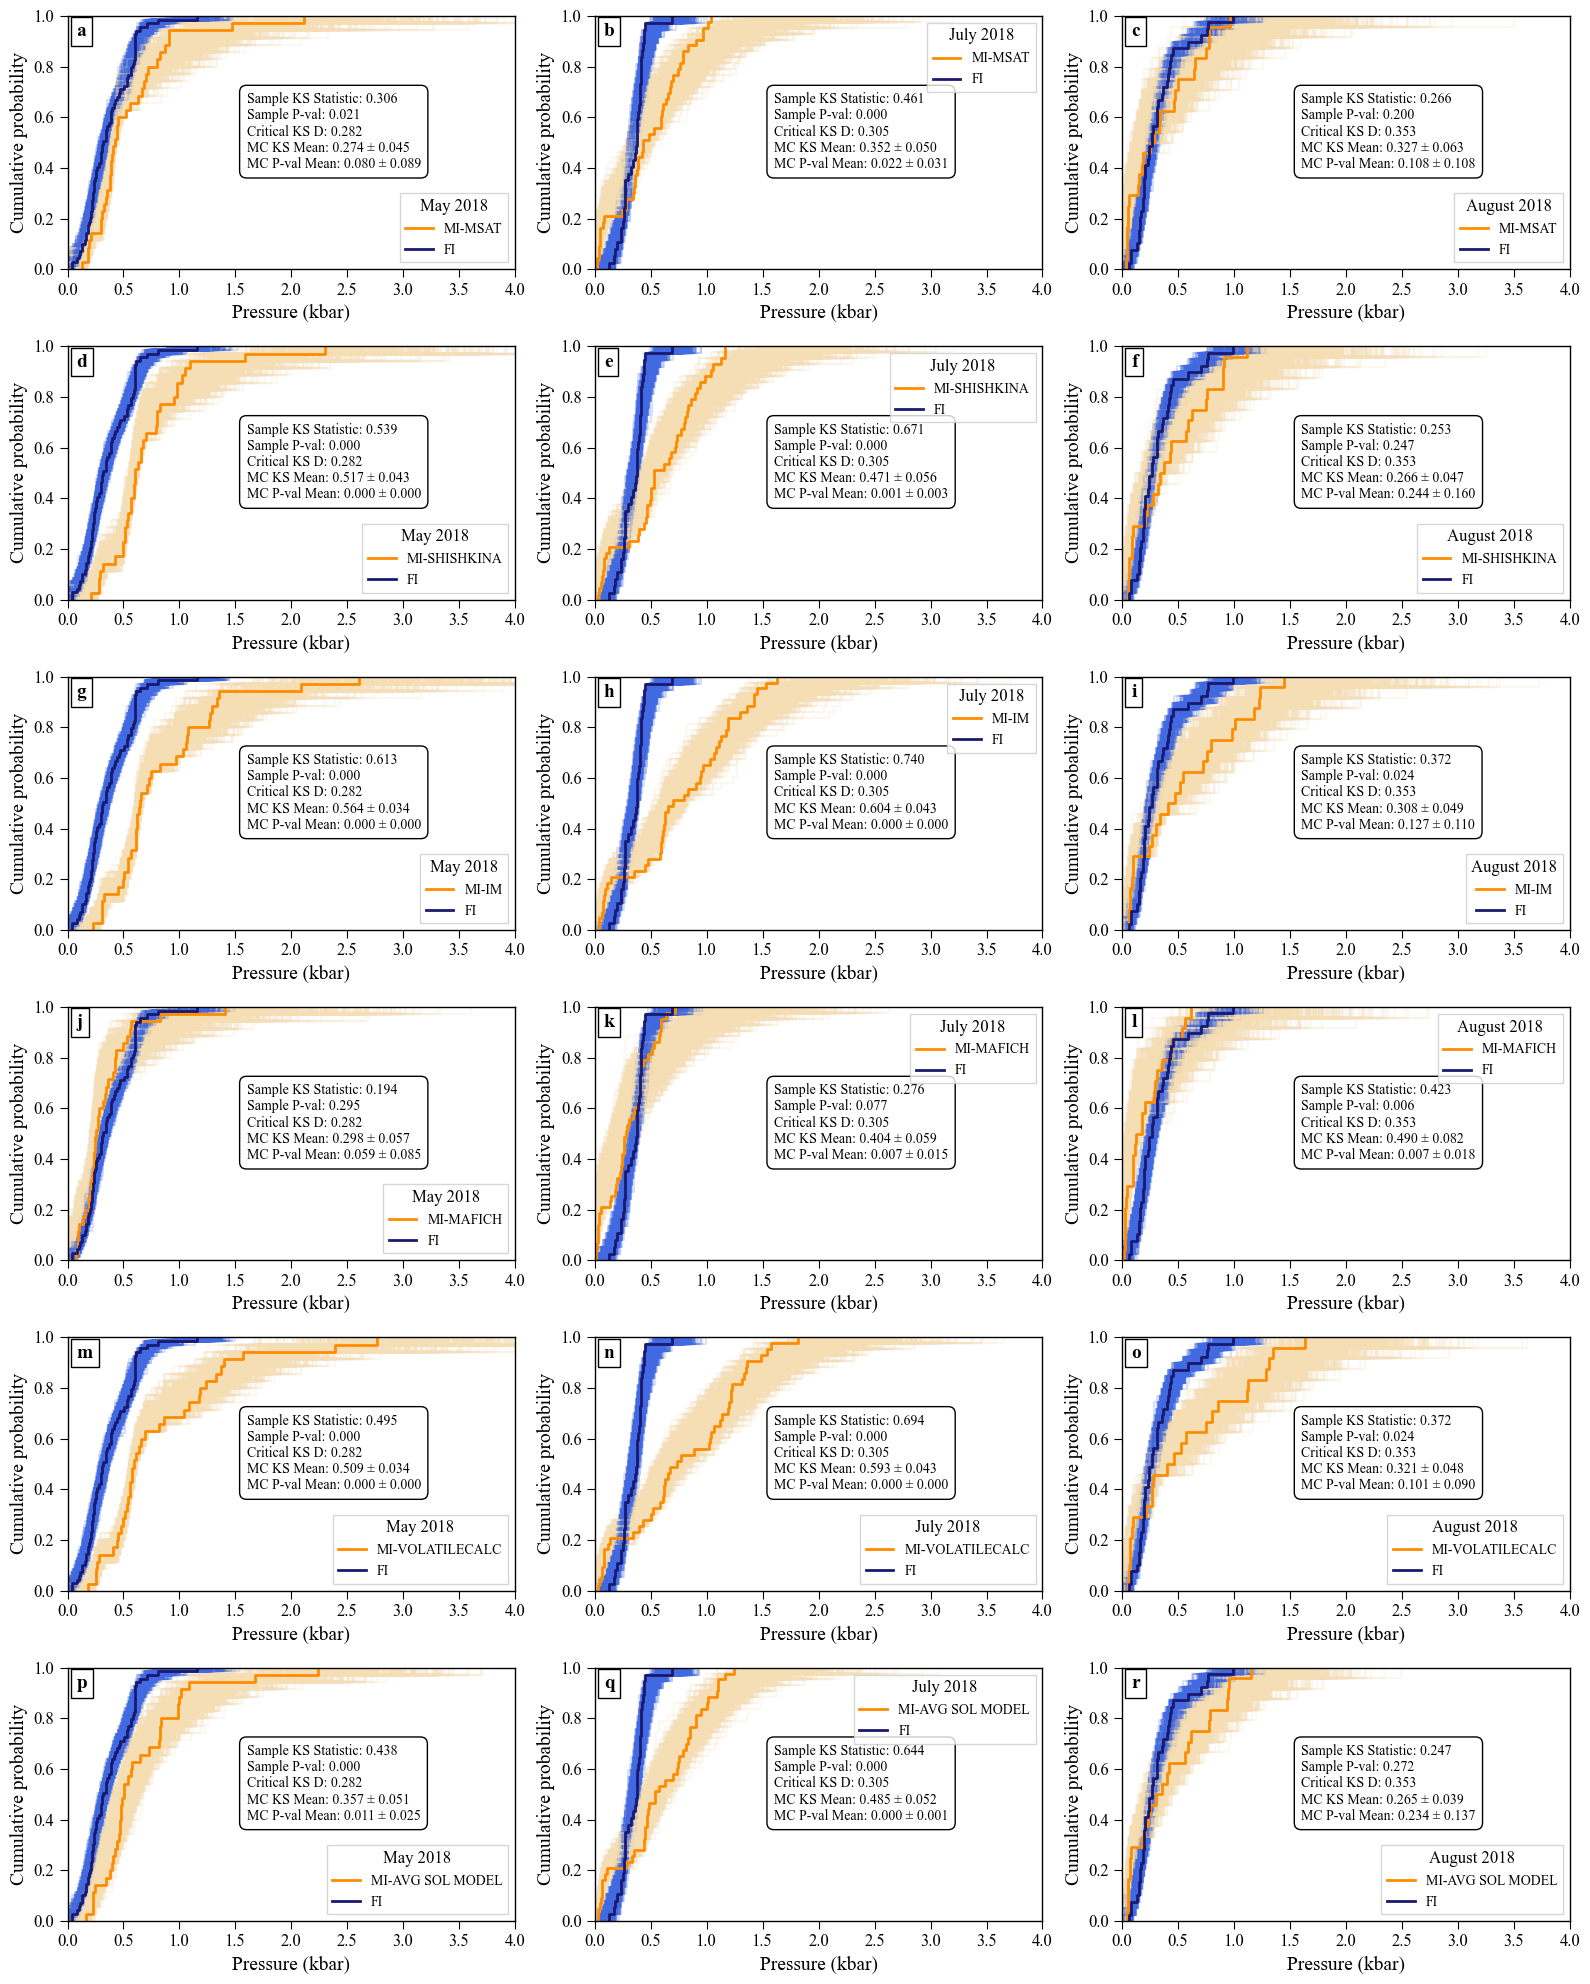

In [ ]:
## Now plot ##
figure_mosaic="""
ABC
DEF
GHI
JKL
MNO
PQR
"""

fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(16, 4*5))

bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')
plot_distribution(axes['A'], results_dict['LL4']['msat'], legend_title='May 2018', data1label='FI',data2label='MI-MSAT', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['B'], results_dict['LL8']['msat'], legend_title='July 2018', data1label='FI',data2label='MI-MSAT', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['C'], results_dict['LL7']['msat'], legend_title='August 2018', data1label='FI',data2label='MI-MSAT', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])

plot_distribution(axes['D'], results_dict['LL4']['sh'], legend_title='May 2018', data1label='FI',data2label='MI-SHISHKINA', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['E'], results_dict['LL8']['sh'], legend_title='July 2018', data1label='FI',data2label='MI-SHISHKINA', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['F'], results_dict['LL7']['sh'], legend_title='August 2018', data1label='FI',data2label='MI-SHISHKINA', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])

plot_distribution(axes['G'], results_dict['LL4']['im'], legend_title='May 2018', data1label='FI',data2label='MI-IM', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['H'], results_dict['LL8']['im'], legend_title='July 2018', data1label='FI',data2label='MI-IM', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['I'], results_dict['LL7']['im'], legend_title='August 2018', data1label='FI',data2label='MI-IM', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])

plot_distribution(axes['J'], results_dict['LL4']['mch'], legend_title='May 2018', data1label='FI',data2label='MI-MAFICH', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['K'], results_dict['LL8']['mch'], legend_title='July 2018', data1label='FI',data2label='MI-MAFICH', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['L'], results_dict['LL7']['mch'], legend_title='August 2018', data1label='FI',data2label='MI-MAFICH', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])

plot_distribution(axes['M'], results_dict['LL4']['vc'], legend_title='May 2018', data1label='FI',data2label='MI-VOLATILECALC', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['N'], results_dict['LL8']['vc'], legend_title='July 2018', data1label='FI',data2label='MI-VOLATILECALC', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['O'], results_dict['LL7']['vc'], legend_title='August 2018', data1label='FI',data2label='MI-VOLATILECALC', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])

plot_distribution(axes['P'], results_dict['LL4']['avg'], legend_title='May 2018', data1label='FI',data2label='MI-AVG SOL MODEL', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['Q'], results_dict['LL8']['avg'], legend_title='July 2018', data1label='FI',data2label='MI-AVG SOL MODEL', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])
plot_distribution(axes['R'], results_dict['LL7']['avg'], legend_title='August 2018', data1label='FI',data2label='MI-AVG SOL MODEL', xlabel='Pressure (kbar)',xlim=[0, 4],ylim=[0, 1])

pos_a2h=(0.02,0.92)
label_positions = [pos_a2h, pos_a2h, pos_a2h,pos_a2h, pos_a2h, pos_a2h,pos_a2h, pos_a2h, pos_a2h,pos_a2h, pos_a2h, pos_a2h,pos_a2h, pos_a2h, pos_a2h,pos_a2h, pos_a2h, pos_a2h]

subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O','P','Q','R']

for ax_key, pos in zip(subplot_labels, label_positions):
    ax = axes[ax_key]
    ax.text(pos[0], pos[1], ax_key.lower(), transform=ax.transAxes, fontsize=14, fontweight='bold', bbox=bbox)

fig.tight_layout()
fig.savefig(figpath+'/'+'FigS2_KSMC.png')
fig.savefig(figpath+'/'+'FigS2_KSMC.pdf')


## Single FI plots for supplement

In [82]:
# path to folder to store figs
singleplots_folder = figpath + '/single_xtal_plots'  # where to save single crystal plots

if not os.path.exists(singleplots_folder):
    os.mkdir(singleplots_folder)

# set variables to plot
MI_P_var = 'Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'
MI_P_err_var = 'Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)'


#subframe with only matching pairs
mifi_only = lei_df[~lei_df[MI_P_var].isna()].copy()

mifi_only.loc[:, 'Sat_P_MI_kbar'] = mifi_only[MI_P_var] / 1000
mifi_only.loc[:, 'Sat_P_MI_kbar_err'] = (mifi_only[MI_P_err_var] / 1000) - mifi_only[MI_P_var] / 1000

# mifi_only=pd.merge(mifi_only.copy(),mifi_xtal_names,on='filename_4match')
mifi_only.head()

Unnamed: 0 FI_name_reps  Fo content (molar)    Xtal Sample_ID_y  \
56          56  LL4_10-MI#1           87.826470  LL4_10         LL4   
57          57  LL4_12-FI#1           88.702677  LL4_12         LL4   
58          58  LL4_12-FI#2           88.702677  LL4_12         LL4   
59          59  LL4_12-MI#2           88.702677  LL4_12         LL4   
60          60   LL4_2-FI#1           81.948523   LL4_2         LL4   

    Corrected_Splitting  Corr_Split+1σ  Corr_Split-1σ  Corr_Split_1σ_val  \
56           103.040496     103.046503     103.034490           0.006007   
57           102.986690     102.991207     102.982173           0.004517   
58           102.987661     102.991893     102.983429           0.004232   
59           102.938845     102.945084     102.932606           0.006239   
60           103.071739     103.078153     103.065326           0.006413   

     Splitting  ...  Position in Xtal_y  Growth zone, PS, S?_y        Shape_y  \
56  103.040496  ...                edge               Isolated      ellipsoid   
57  102.986690  ...              center                     GZ      ellipsoid   
58  102.987661  ...              center                     GZ      ellipsoid   
59  102.938845  ...              center                     GZ      ellipsoid   
60  103.071739  ...              center                     PS  capsule-short   

    Decrepit  Example for Work/DontWork                       Comment  \
56         y                         DW  maybe related to decrep ring   
57         n                         DW                  In a subxtal   
58         n                         DW                  In a subxtal   
59         n                         DW                  In a subxtal   
60         n                          W        PS, close in genesis.    

    Sample_ID  CO2_dens_gcm3_std  Sat_P_MI_kbar  Sat_P_MI_kbar_err  
56        LL4                NaN           0.70               0.31  
57        LL4                NaN           0.91               0.57  
58        LL4                NaN           0.91               0.57  
59        LL4                NaN           0.91               0.57  
60        LL4                NaN           0.72               0.42  

[5 rows x 274 columns]

c:\Users\charl\anaconda3\envs\DiadFit_env\lib\site-packages\labellines\core.py:151: UserWarning: Tried to label line Line2D(_nolegend_), but could not find a label for it.
  warnings.warn(
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dro

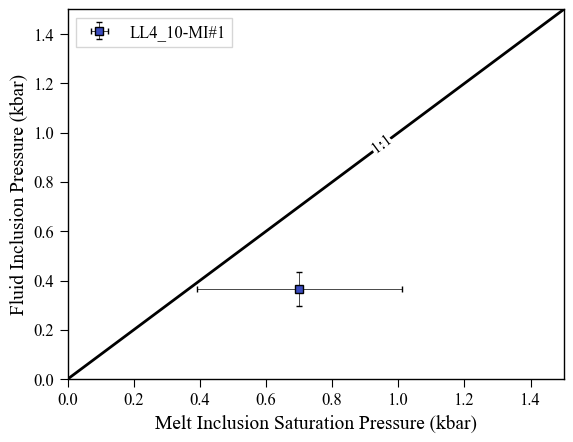

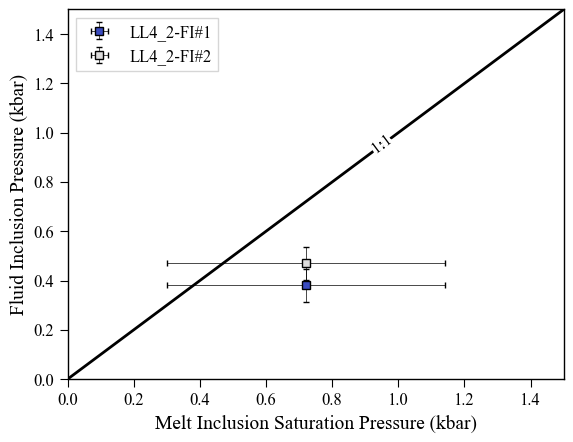

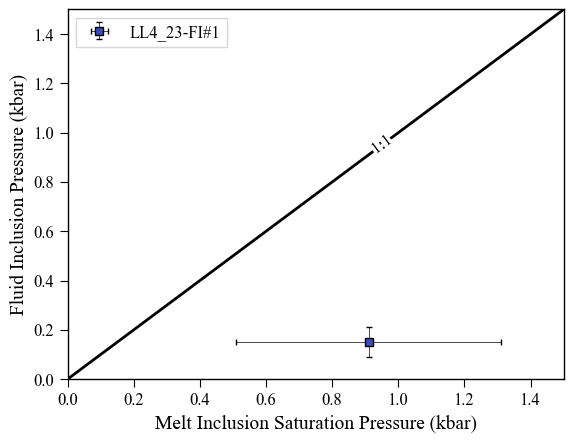

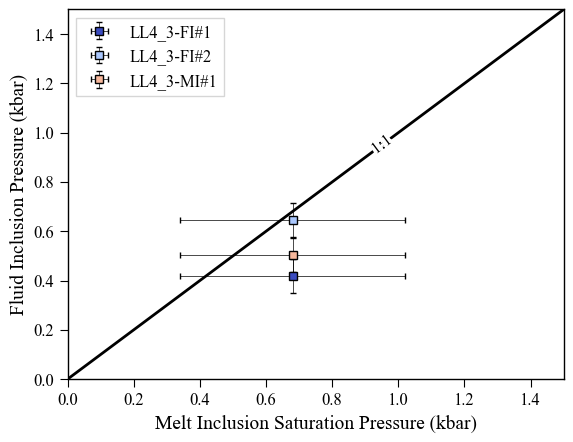

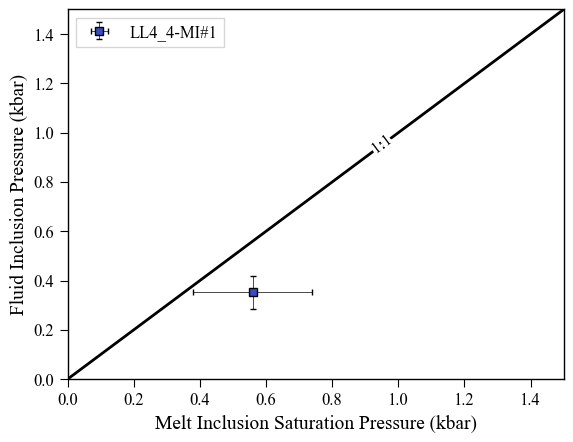

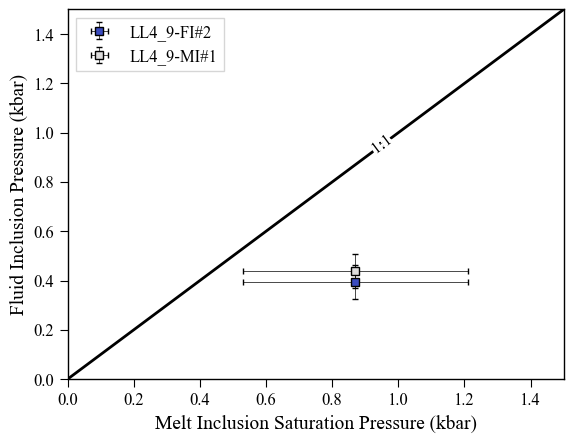

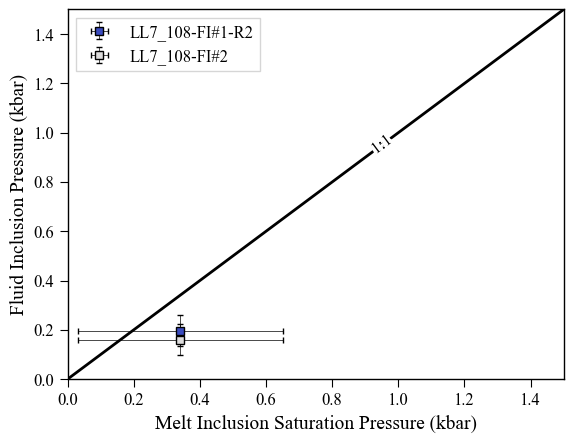

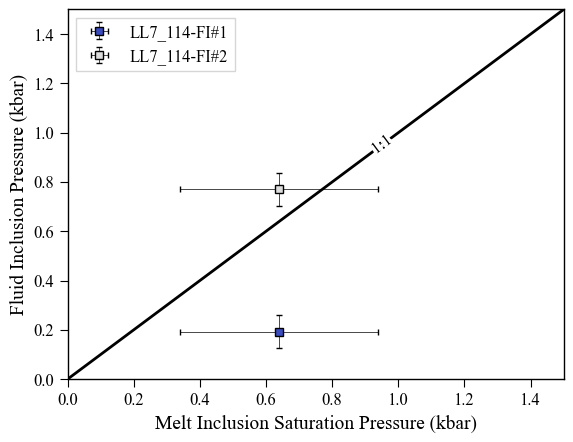

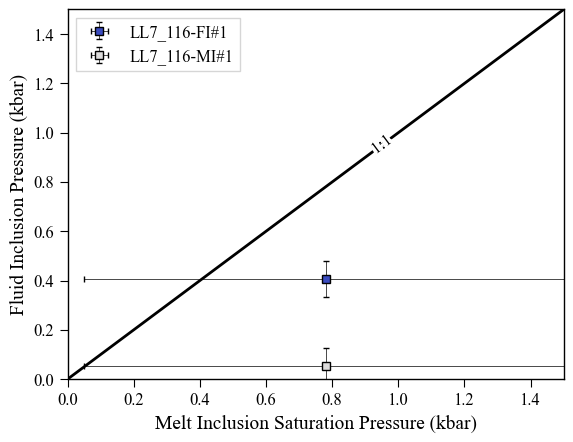

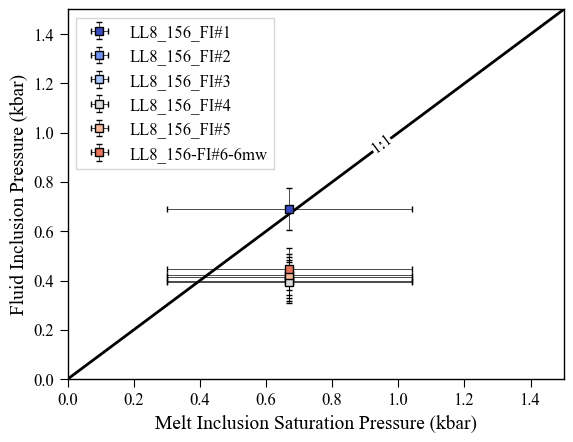

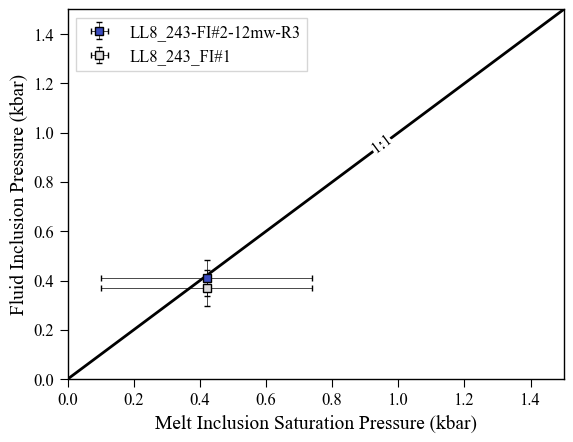

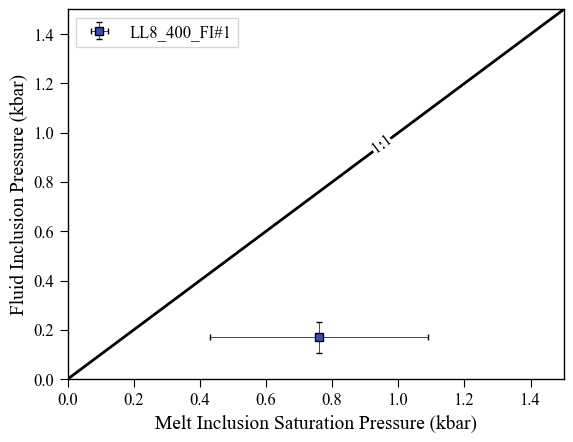

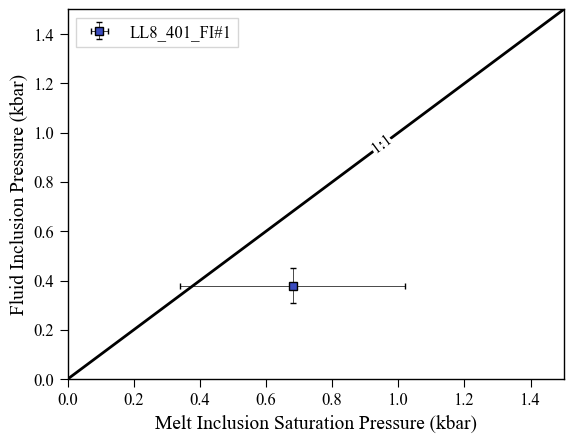

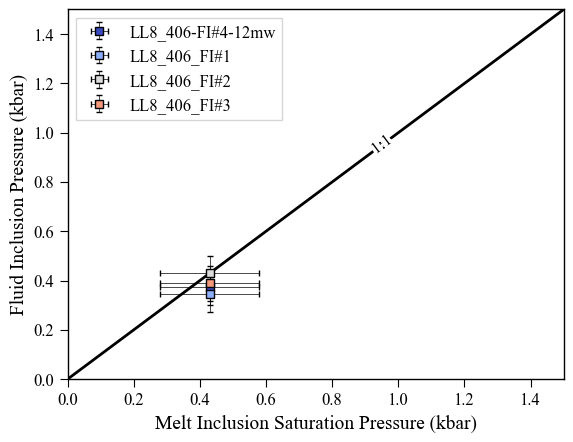

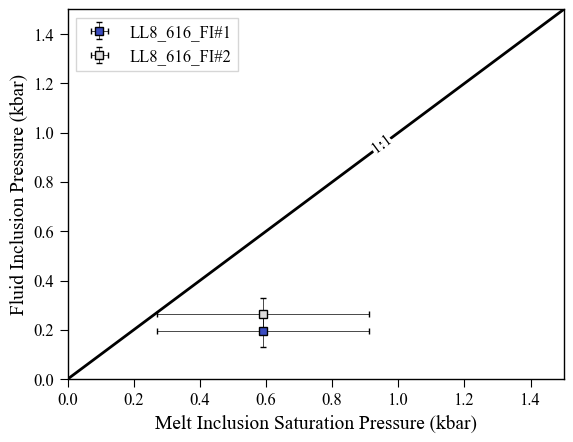

In [83]:
singleplots_folder = figpath + '/single_xtal_plots'  # where to save single crystal plots

if not os.path.exists(singleplots_folder):
    os.mkdir(singleplots_folder)

MI_P_var = 'Magmasat Saturation Pressure (bar) (Total, PEC-corr CO2, Measured H2O)'
MI_P_err_var = 'Magmasat Saturation Pressure Max CO2 (glass+bubble, PEC corr,+1 sigma splitting +1 sigmabubble vol)'
plot_var = 'MI THAT MATCHES FI'
name_var = 'Filename'
color_column='SO2_Diad_Ratio'

mifi_only = lei_df[~lei_df['Sample_ID_x'].isna()]
mifi_only = mifi_only.copy()
mifi_only.loc[:, 'Sat_P_MI_kbar'] = mifi_only[MI_P_var] / 1000
mifi_only.loc[:, 'Sat_P_MI_kbar_err'] = (mifi_only[MI_P_err_var] / 1000) - mifi_only[MI_P_var] / 1000

for sample in mifi_only[plot_var].unique():
    select_sample = sample
    mask = mifi_only[plot_var] == select_sample

    xlim = [0, 1.5]
    ylim = [0, 1.5]

    xerr = 'Sat_P_MI_kbar_err'
    yerr = 'std_dev_MC_P_kbar'

    # set up the plot
    fig, ax = plt.subplots()

    for idx, name in enumerate(mifi_only[mask][name_var].unique()):
        select_name = name
        name_mask = mifi_only[mask][name_var] == name
        x_coord = mifi_only[mask].loc[name_mask, 'Sat_P_MI_kbar'].iloc[0]
        y_coord = mifi_only[mask].loc[name_mask, 'Med_MC_P_kbar'].iloc[0]

        # Generate a unique color for each data point
        # Generate a color using the "viridis" colormap
        color = plt.cm.coolwarm(idx / len(mifi_only[mask][name_var].unique()))

        ax.errorbar(x_coord, y_coord, xerr=mifi_only[xerr][mask].iloc[0], yerr=mifi_only[yerr][mask].iloc[0],
                    fmt='s', linestyle='none', label=name, ecolor='k', elinewidth=0.5, capsize=2,
                    zorder=-2, color=color,mec='k')


    # add axis labels and limits
    ax.set_xlabel('Melt Inclusion Saturation Pressure (kbar)')
    ax.set_ylabel('Fluid Inclusion Pressure (kbar)')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(loc='upper left')

    ax.plot([xlim[0], xlim[1]], [xlim[0], xlim[1]],'k',zorder=-3,linewidth=2,label="1:1")
    # ax.plot([xlim[0],xlim[1]],[xlim[0]+0.1*xlim[0],xlim[1]+0.1*xlim[1]],'grey',linestyle='-.',label="10%")
    # ax.plot([xlim[0],xlim[1]],[xlim[0]-0.1*xlim[0],xlim[1]-0.1*xlim[1]],'grey',linestyle='-.',label="10%")
    # ax.plot([xlim[0],xlim[1]],[xlim[0]+0.05*xlim[0],xlim[1]+0.05*xlim[1]],'grey',linestyle=':',label="5%")
    # ax.plot([xlim[0],xlim[1]],[xlim[0]-0.05*xlim[0],xlim[1]-0.05*xlim[1]],'grey',linestyle=':',label="5%")
    xvals=[0.95]#[0.9,0.75,0.8,0.8,0.83]
    labelLines(ax.get_lines(), zorder=2.5,xvals=xvals,fontsize=12)

    fig.savefig(singleplots_folder + '/' + 'MIFIplot_' + select_sample + '.pdf',transparent=True)
    fig.savefig(singleplots_folder + '/' + 'MIFIplot_' + select_sample + '.png',transparent=True)
